In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels

In [2]:
np.__version__

'1.18.4'

In [3]:
pd.__version__

'1.0.3'

In [4]:
sklearn.__version__

'0.23.2'

In [5]:
statsmodels.__version__

'0.11.1'

In [6]:
df1 = pd.read_csv('Sparkling.csv')
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [7]:
df1.shape

(187, 2)

In [8]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [9]:
df1['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df1.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [10]:
df1['Time_Stamp'] = pd.to_datetime(df1['Time_Stamp'])

In [11]:
df = df1.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [12]:
df.shape

(187, 1)

# EDA

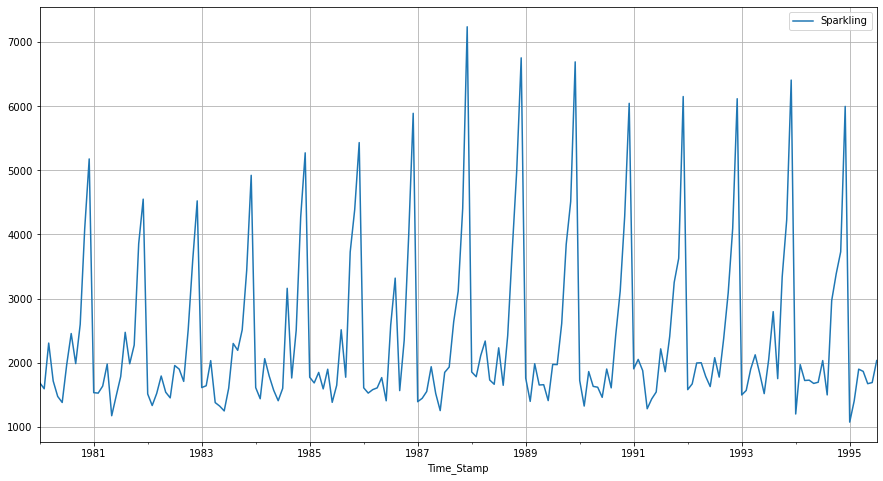

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.plot();
plt.grid()
plt.savefig('ts1.png')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [14]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [15]:
df.isnull().sum()

Sparkling    0
dtype: int64

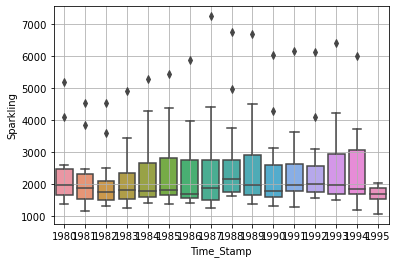

In [16]:
# Yearly Boxplot
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

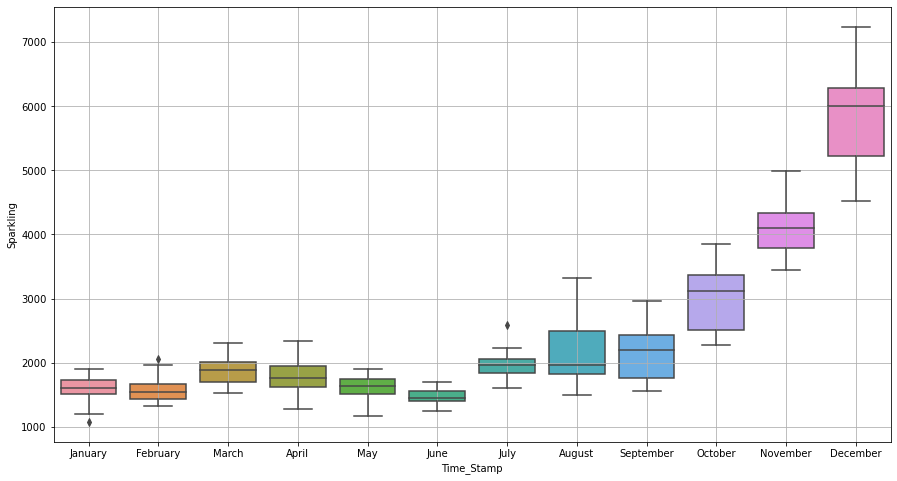

In [17]:
#Monthly Boxplot
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

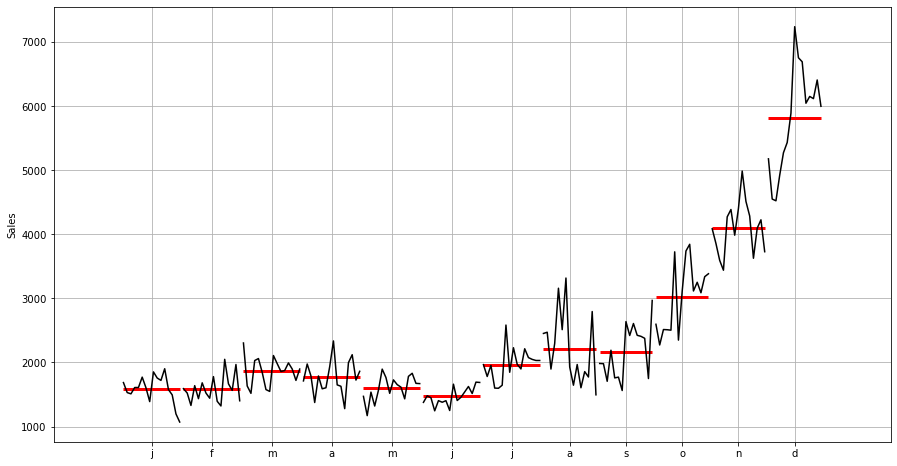

In [18]:
## Plot a time series monthplot to understand the spread of Sales 
# across different years and within different months 
#across years.
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

In [19]:
# Plot a time series monthplot to understand the spread of Sales across
# different years and within different months across years
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

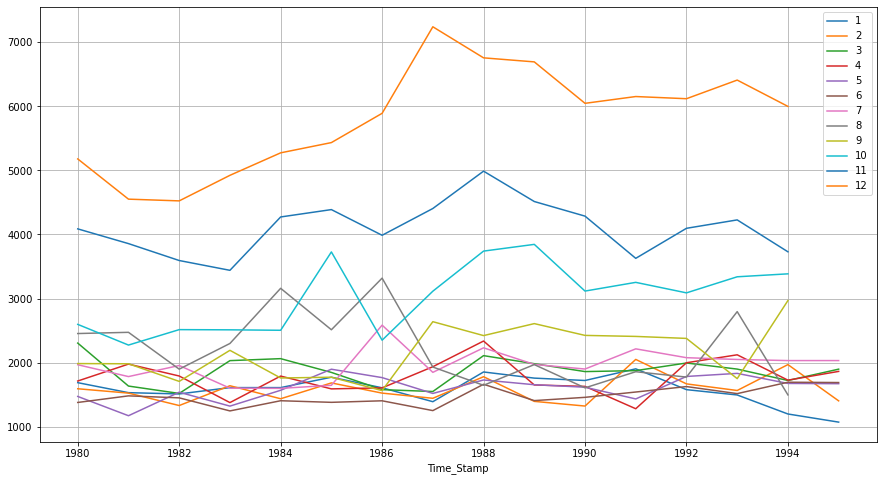

In [20]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

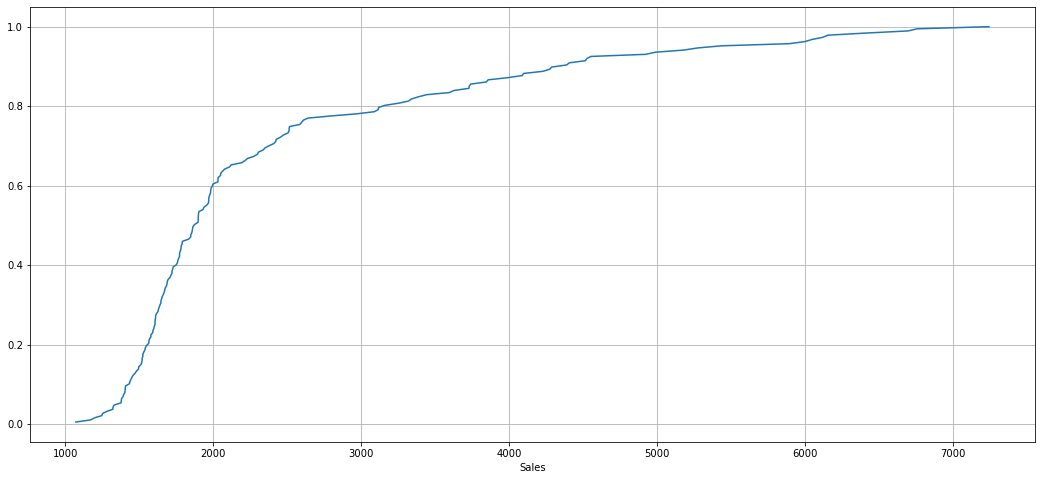

In [21]:
#Empirical Cummulative Distribution Curve
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [12]:
df['Sparkling'].min()

1070

In [14]:
df['Sparkling'].max()

7242

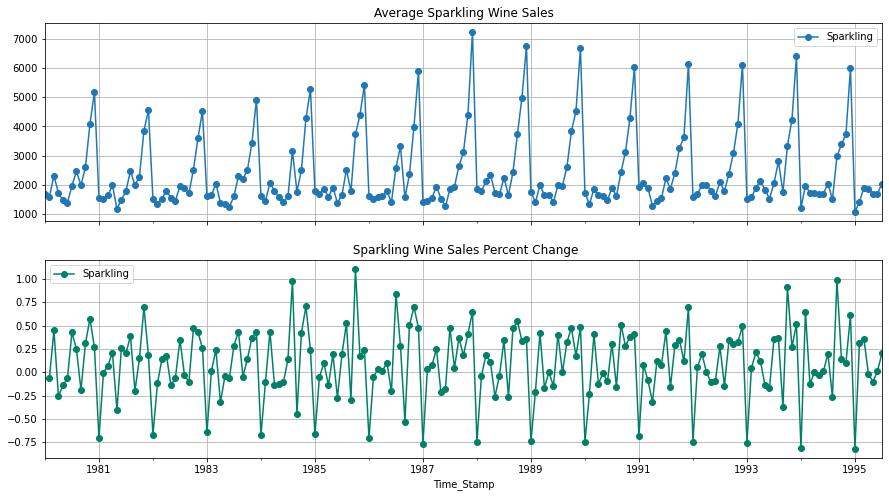

In [22]:
# Plot the average RetailSales per month and the month on month percentage change of RetailSales
# group by date and get average Sales, and precent change

average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title=" Sparkling Wine Sales Percent Change",grid=True)

In [13]:
# Decomposing The Time Series
from    statsmodels.tsa.seasonal import   seasonal_decompose

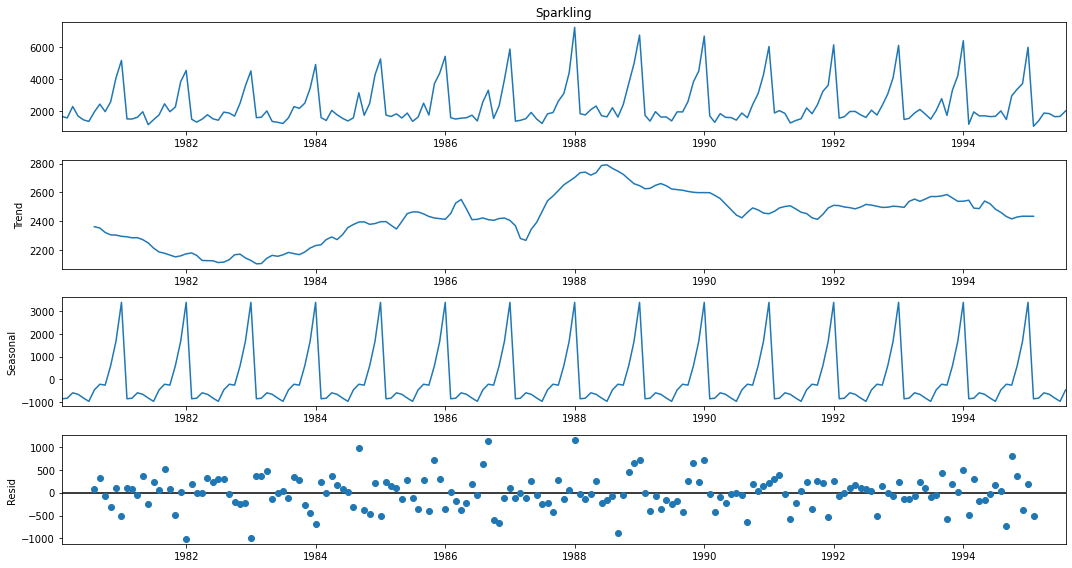

In [18]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

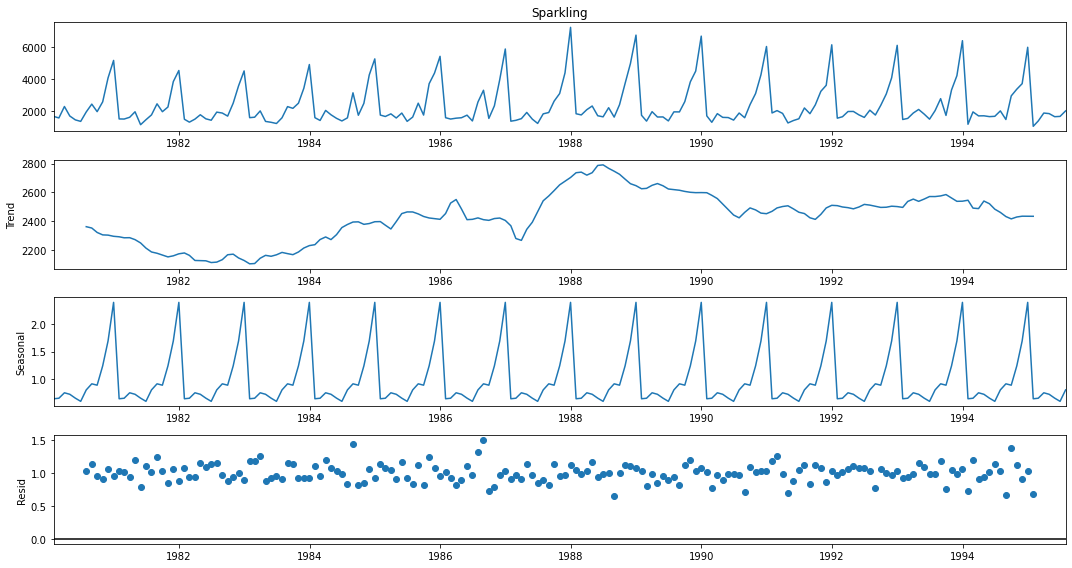

In [19]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [19]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

# Stationarity Test 

In [17]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=6).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=6).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

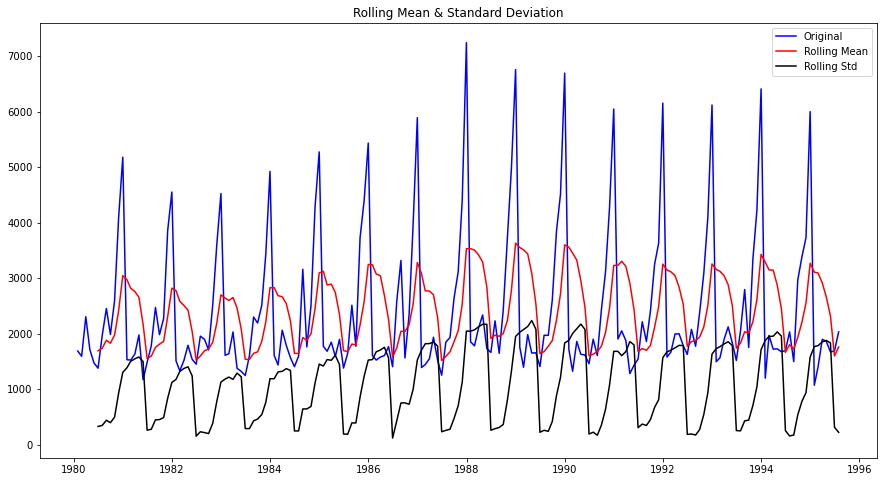

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [29]:
test_stationarity(df['Sparkling'])

In [30]:
# the null hypothesis  for ADF test (H0) is that the time series is non-stationary 
# the alternate hypothesis for ADF test (H1) is that time series is stationary

# since the p-value of the ADF test is greater than the critical value at 5%, we cannot reject the null hypothesis 
# thus the given time given series is non stationary

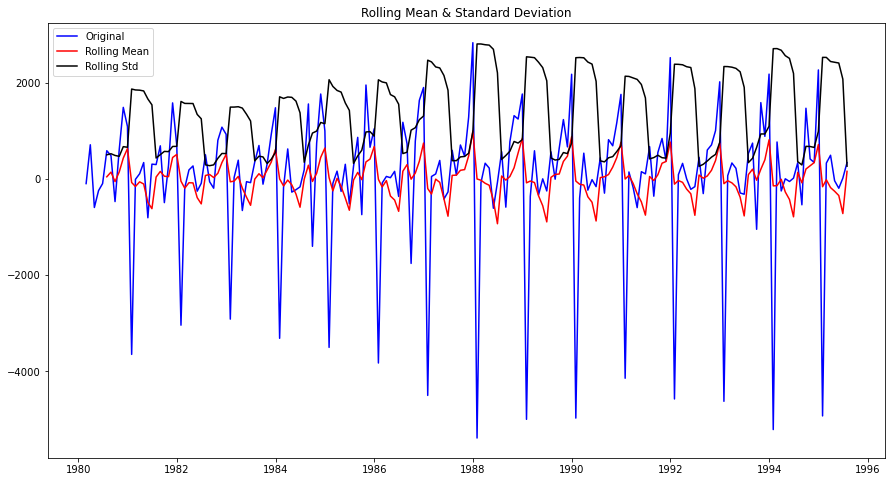

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [31]:
test_stationarity(df['Sparkling'].diff().dropna())

In [32]:
# after taking the difference of order 1, we can see that the p-value is now less the critical value, so the time series has
# become stationary

# AutoCorrelation Plot

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

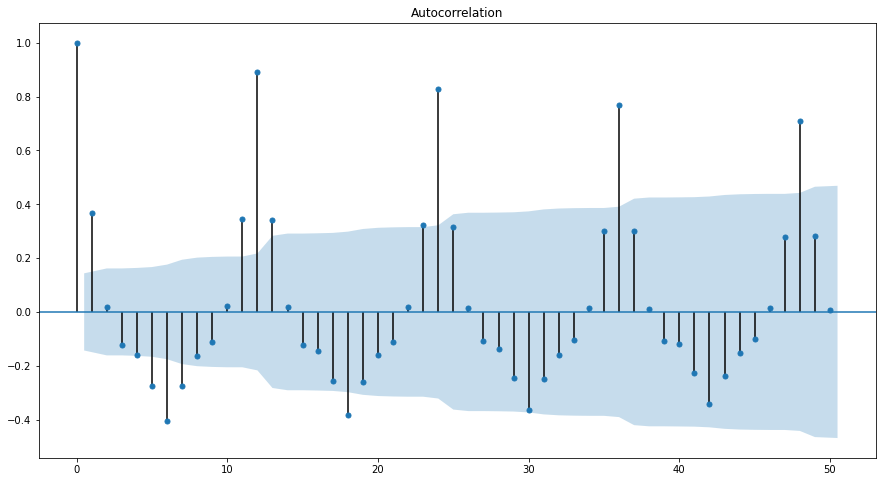

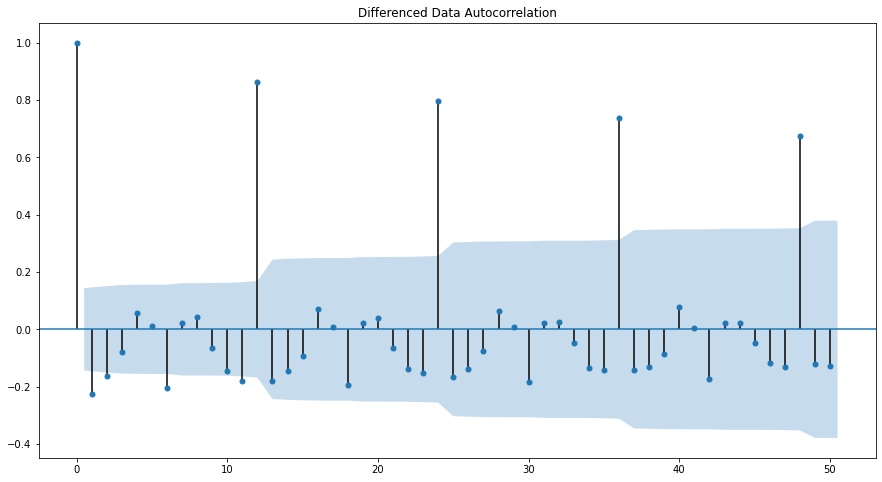

In [34]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

# Partial AutoCorrelation Function

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


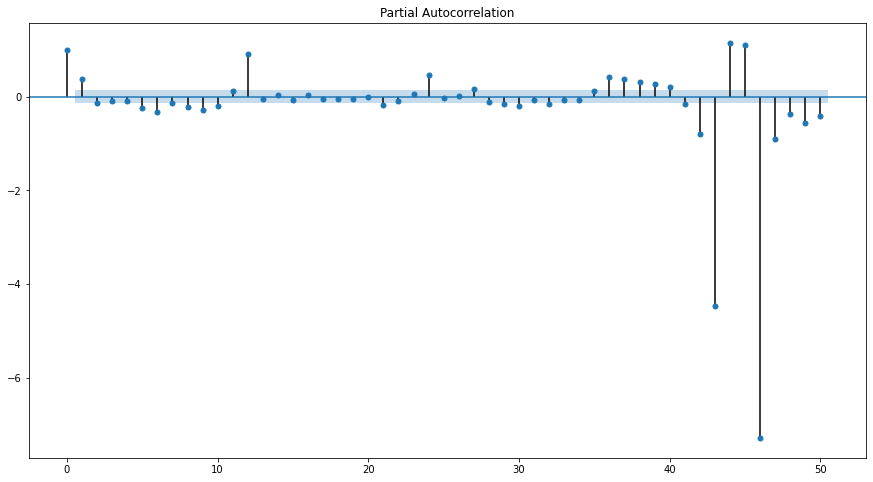

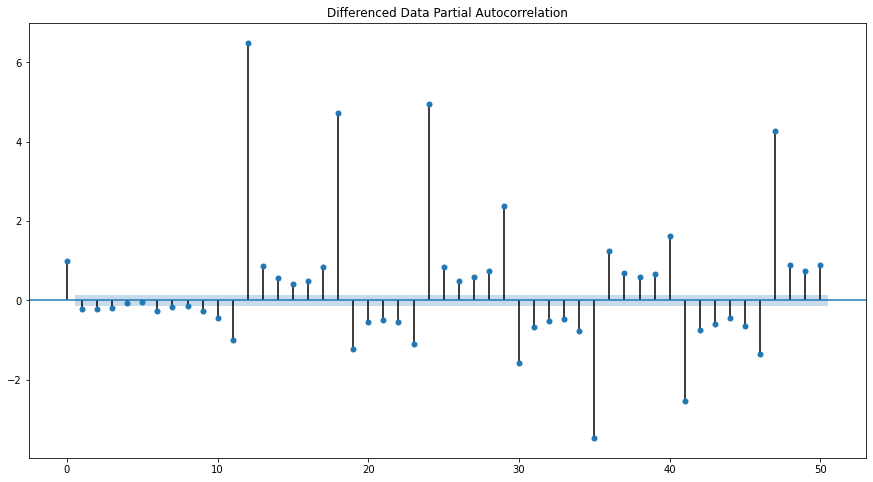

In [35]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff(1).dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

# Train-Test Split

In [18]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [19]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [38]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



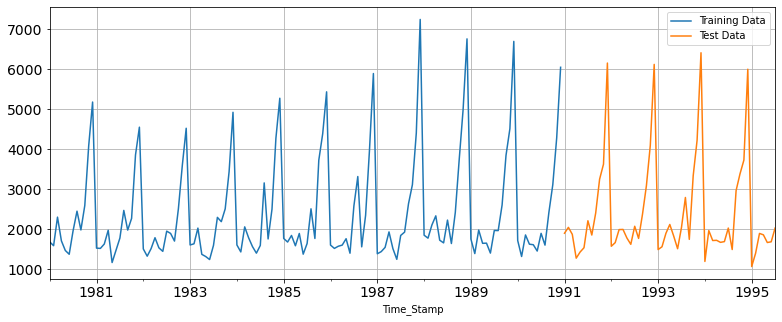

In [39]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 1.Regression Model

In [40]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [41]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [42]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [46]:
#predictions on train data
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

#predictions on test data
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

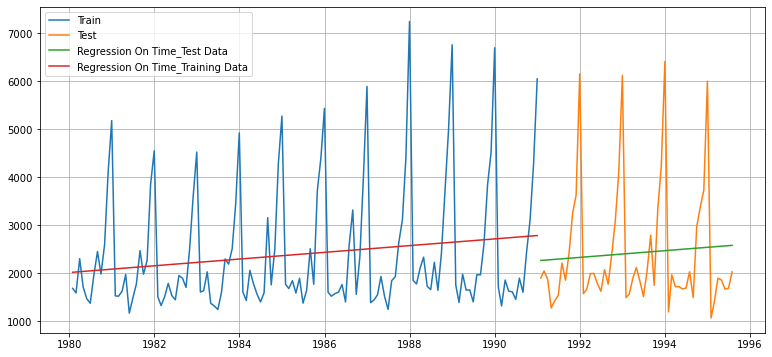

In [47]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [20]:
from sklearn import metrics

In [21]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [50]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)
print("For Regression On Time forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For Regression On Time forecast on the Training Data,  RMSE is 1279.322 MAPE is 40.05


In [51]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For Regression On Time forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For Regression On Time forecast on the Test Data,  RMSE is 1275.867 MAPE is 39.16


In [52]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1275.867052      39.16

# 2.Naive Approach Model

In [57]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [58]:
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [59]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

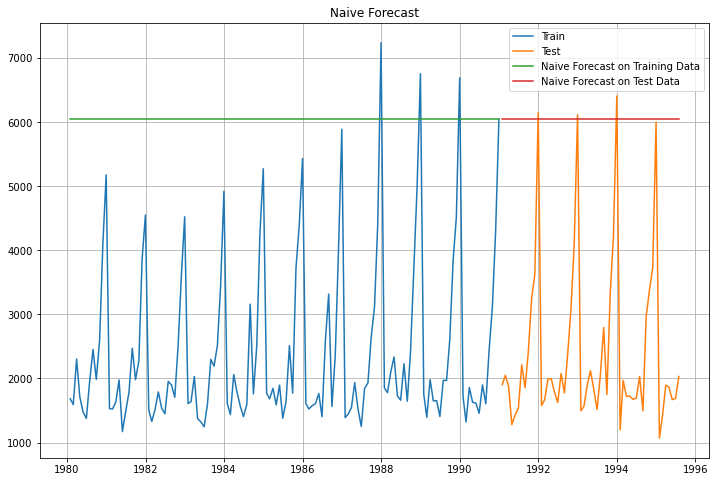

In [60]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [61]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 3867.701 MAPE is 153.17


In [62]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For Naive Model forecast on the Test Data,  RMSE is 3864.279 MAPE is 152.87


In [63]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1275.867052      39.16
NaiveModel        3864.279352     152.87

# 3.Simple Average Model

In [64]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [65]:
SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

Sparkling  mean_forecast
Time_Stamp                          
1980-01-31       1686    2403.780303
1980-02-29       1591    2403.780303
1980-03-31       2304    2403.780303
1980-04-30       1712    2403.780303
1980-05-31       1471    2403.780303

In [66]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

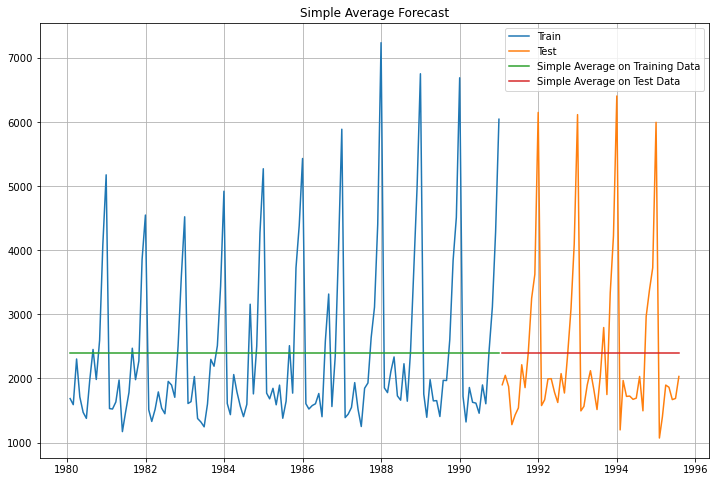

In [67]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [68]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [69]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [70]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    1275.867052      39.16
NaiveModel          3864.279352     152.87
SimpleAverageModel  1275.081804      38.90

# 4.Moving Average Model

In [26]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [27]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

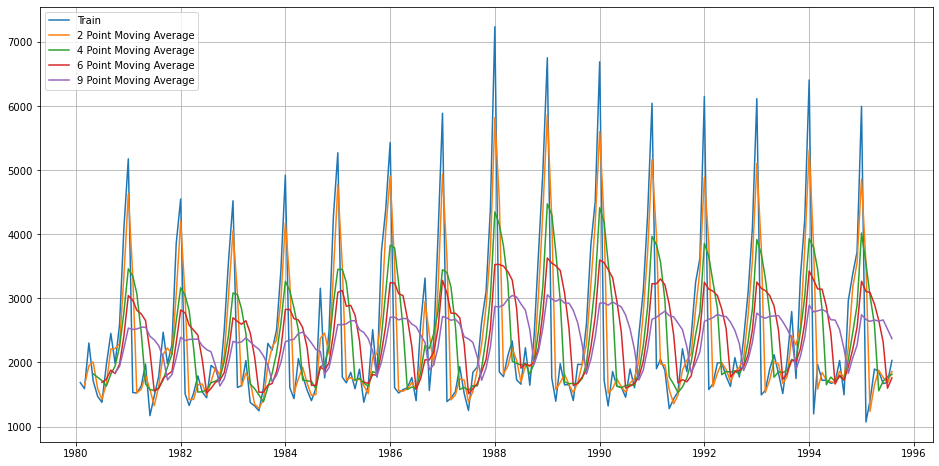

In [28]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [29]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

In [30]:
trailing_MovingAverage_train.tail()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Stamp                                                             
1990-08-31       1605      1752.0     1644.00  1677.166667  2199.777778
1990-09-30       2424      2014.5     1846.25  1771.333333  1725.333333
1990-10-31       3116      2770.0     2261.00  2019.333333  1880.444444
1990-11-30       4286      3701.0     2857.75  2464.500000  2209.888889
1990-12-31       6047      5166.5     3968.25  3229.500000  2675.222222

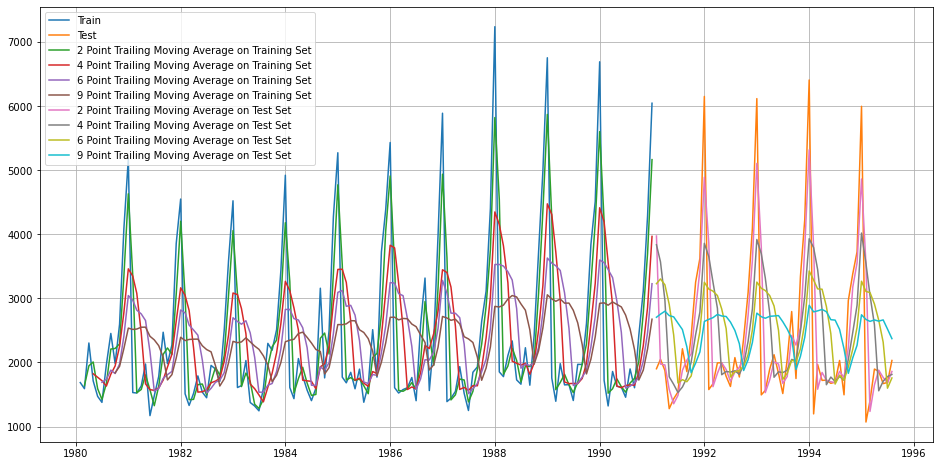

In [31]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [32]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 813.401 MAPE is 19.70
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 1156.590 MAPE is 35.96
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 1283.927 MAPE is 43.86
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 1346.278 MAPE is 46.86


In [78]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             1275.867052      39.16
NaiveModel                   3864.279352     152.87
SimpleAverageModel           1275.081804      38.90
2pointTrailingMovingAverage   813.400684      19.70
4pointTrailingMovingAverage  1156.589694      35.96
6pointTrailingMovingAverage  1283.927428      43.86
9pointTrailingMovingAverage  1346.278315      46.86

# 5.Simple Exponential Smoothing (automated)

In [35]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [80]:
SES_train = train.copy()
SES_test = test.copy()

In [81]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [82]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [83]:
print(model_SES_autofit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  132
Model:             SimpleExpSmoothing   SSE                      222559884.633
Optimized:                       True   AIC                           1896.603
Trend:                           None   BIC                           1902.369
Seasonal:                        None   AICC                          1896.918
Seasonal Periods:                None   Date:                 Tue, 08 Sep 2020
Box-Cox:                        False   Time:                         05:10:03
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level             0.000000                alpha                 True
initial_level              2403.7856                

In [84]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling      predict
Time_Stamp                        
1980-01-31       1686  2403.785622
1980-02-29       1591  2403.785622
1980-03-31       2304  2403.785622
1980-04-30       1712  2403.785622
1980-05-31       1471  2403.785622

In [86]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2403.785622
1991-02-28       2049  2403.785622
1991-03-31       1874  2403.785622
1991-04-30       1279  2403.785622
1991-05-31       1432  2403.785622

Text(0.5, 1.0, 'Alpha =0 Predictions')

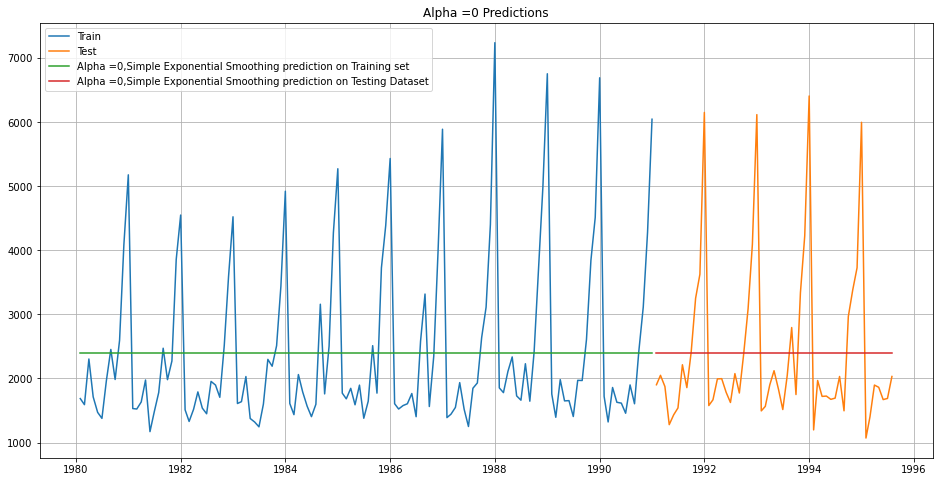

In [87]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0,Simple Exponential Smoothing prediction on Training set')
plt.plot(SES_test['predict'], label='Alpha =0,Simple Exponential Smoothing prediction on Testing Dataset')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0 Predictions')

In [88]:
## Training Data

rmse_model5_train = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict'],squared=False)
mape_model5_train = MAPE(SES_train['Sparkling'],SES_train['predict'])
print("For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train, mape_model5_train))

For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [89]:
## Test Data

rmse_model5_test = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
mape_model5_test = MAPE(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test, mape_model5_test))


For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1275.082 MAPE is 38.90


In [90]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test],'Test MAPE': [mape_model5_test]}
                           ,index=['Alpha=0,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                    1275.867052      39.16
NaiveModel                          3864.279352     152.87
SimpleAverageModel                  1275.081804      38.90
2pointTrailingMovingAverage          813.400684      19.70
4pointTrailingMovingAverage         1156.589694      35.96
6pointTrailingMovingAverage         1283.927428      43.86
9pointTrailingMovingAverage         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing  1275.081823      38.90

# 6. Simple Exponential Model with alpha in range of 0.01 to 0.1

In [91]:
resultsDf_6_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_6_model

Empty DataFrame
Columns: [Alpha Values, Test RMSE, Test MAPE]
Index: []

In [92]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model6_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    mape_model6_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    rmse_model6_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model6_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_6_model = resultsDf_6_model.append({'Alpha Values':i,'Train RMSE':rmse_model6_train_i 
                                      ,'Train MAPE': mape_model6_train_i,'Test RMSE':rmse_model6_test_i
                                      ,'Test MAPE':mape_model6_test_i}, ignore_index=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: Run

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: Run

In [93]:
 resultsDf_6_model

Alpha Values    Test RMSE  Test MAPE  Train MAPE   Train RMSE
0           0.01  1276.252528      39.92       39.52  1302.063356
1           0.02  1283.553513      41.81       39.35  1303.192007
2           0.03  1294.721795      43.40       39.66  1305.212814
3           0.04  1305.943201      44.58       40.08  1308.368577
4           0.05  1316.543242      45.51       40.50  1312.159247
..           ...          ...        ...         ...          ...
94          0.95  3778.432623     149.55       36.33  1363.586031
95          0.96  3796.048620     150.22       36.23  1365.349774
96          0.97  3813.437370     150.88       36.12  1367.179925
97          0.98  3830.602869     151.54       36.01  1369.077800
98          0.99  3847.548965     152.21       35.90  1371.044831

[99 rows x 5 columns]

In [94]:
 resultsDf_6_model.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values    Test RMSE  Test MAPE  Train MAPE   Train RMSE
0           0.01  1276.252528      39.92       39.52  1302.063356
1           0.02  1283.553513      41.81       39.35  1303.192007
2           0.03  1294.721795      43.40       39.66  1305.212814
3           0.04  1305.943201      44.58       40.08  1308.368577
4           0.05  1316.543242      45.51       40.50  1312.159247
..           ...          ...        ...         ...          ...
94          0.95  3778.432623     149.55       36.33  1363.586031
95          0.96  3796.048620     150.22       36.23  1365.349774
96          0.97  3813.437370     150.88       36.12  1367.179925
97          0.98  3830.602869     151.54       36.01  1369.077800
98          0.99  3847.548965     152.21       35.90  1371.044831

[99 rows x 5 columns]

In [95]:
model_SES_2 = SimpleExpSmoothing(SES_train['Sparkling'])
model_SES_2_autofit = model_SES.fit(smoothing_level=0.01, optimized=True,use_brute=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [96]:
print(model_SES_2_autofit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  132
Model:             SimpleExpSmoothing   SSE                      223788705.861
Optimized:                       True   AIC                           1897.330
Trend:                           None   BIC                           1903.096
Seasonal:                        None   AICC                          1897.645
Seasonal Periods:                None   Date:                 Tue, 08 Sep 2020
Box-Cox:                        False   Time:                         05:10:12
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0100000                alpha                False
initial_level              2357.7864                

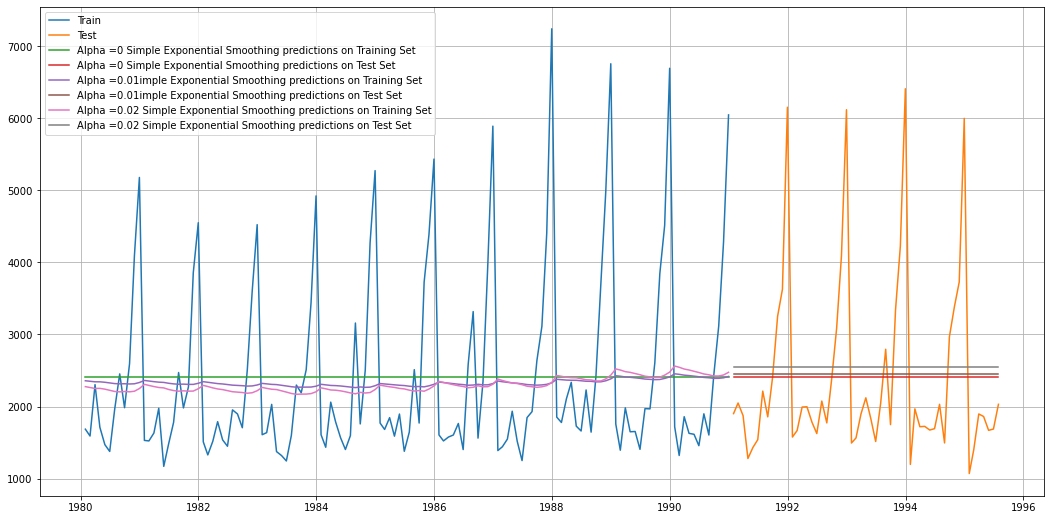

In [97]:
## Plotting on both the Training and Test data for top values of alpha

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.01], label='Alpha =0.01imple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.01], label='Alpha =0.01imple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [98]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [resultsDf_6_model['Test RMSE'][0]],'Test MAPE':[resultsDf_6_model['Test MAPE'][0]]}
                           ,index=['Alpha=0.01,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1275.867052      39.16
NaiveModel                             3864.279352     152.87
SimpleAverageModel                     1275.081804      38.90
2pointTrailingMovingAverage             813.400684      19.70
4pointTrailingMovingAverage            1156.589694      35.96
6pointTrailingMovingAverage            1283.927428      43.86
9pointTrailingMovingAverage            1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing     1275.081823      38.90
Alpha=0.01,SimpleExponentialSmoothing  1276.252528      39.92

# 7. Double Exponential Smoothing (automated)

In [33]:
DES_train = train.copy()
DES_test = test.copy()

In [37]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [101]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [102]:
print(model_DES_autofit.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                  132
Model:                           Holt   SSE                      236130070.694
Optimized:                       True   AIC                           1908.416
Trend:                       Additive   BIC                           1919.947
Seasonal:                        None   AICC                          1909.088
Seasonal Periods:                None   Date:                 Tue, 08 Sep 2020
Box-Cox:                        False   Time:                         05:10:16
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.6477924                alpha                 True
smoothing_slope             0.000000                

In [103]:
model_DES_autofit.params_formatted

name        param  optimized
smoothing_level  alpha     0.647792       True
smoothing_slope   beta     0.000000       True
initial_level      l.0  1686.083777       True
initial_slope      b.0    27.059653       True

In [104]:
# predictions on training data
DES_train['predict',0.64,0.0] = model_DES_autofit.fittedvalues
DES_train.head()

Sparkling  (predict, 0.64, 0.0)
Time_Stamp                                 
1980-01-31       1686           1713.143430
1980-02-29       1591           1722.619775
1980-03-31       2304           1664.417138
1980-04-30       1712           2105.793709
1980-05-31       1471           1877.756790

In [105]:
DES_test['predict',0.64,0.0] = model_DES_autofit.forecast(steps=len(DES_test))
DES_test.head()

Sparkling  (predict, 0.64, 0.0)
Time_Stamp                                 
1991-01-31       1902           5281.439591
1991-02-28       2049           5308.499244
1991-03-31       1874           5335.558897
1991-04-30       1279           5362.618550
1991-05-31       1432           5389.678203

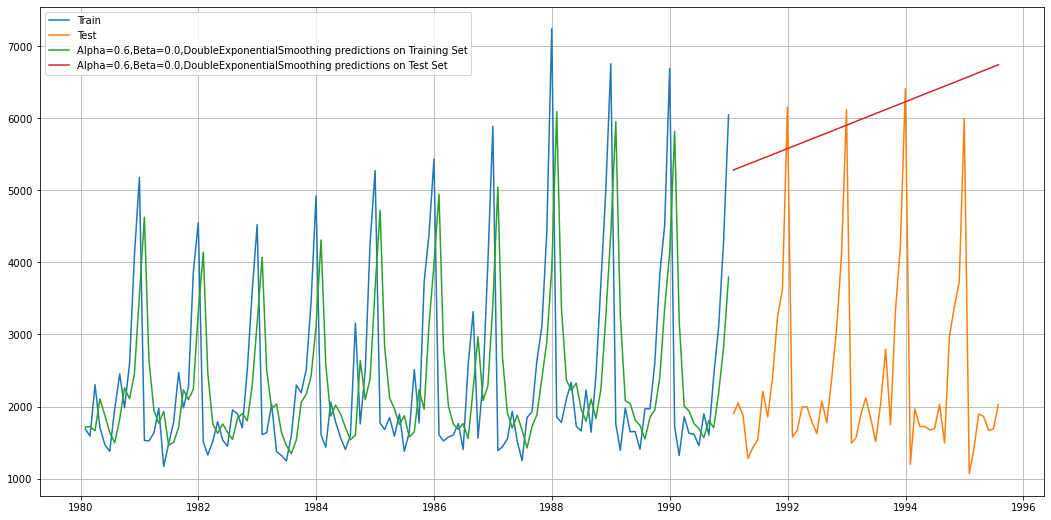

In [106]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.64, 0.0], label='Alpha=0.6,Beta=0.0,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.64, 0.0], label='Alpha=0.6,Beta=0.0,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [107]:
## Training Data

rmse_model7_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',0.64,0.0],squared=False)
mape_model7_train = MAPE(DES_train['Sparkling'],DES_train['predict',0.64,0.0])
print("For Alpha=0.64 and Beta=0 Double Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_train, mape_model7_train))

For Alpha=0.64 and Beta=0 Double Exponential Smoothing Model forecast on the Training Data,  RMSE is 1337.484 MAPE is 39.11


In [108]:
## Test Data

rmse_model7_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',0.64,0.0],squared=False)
mape_model7_test = MAPE(DES_test['Sparkling'],DES_test['predict',0.64,0.0])
print("For Alpha=0.64 and Beta=0 Double Exponential Smoothing Model forecast on the Testing Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_test, mape_model7_test))


For Alpha=0.64 and Beta=0 Double Exponential Smoothing Model forecast on the Testing Data,  RMSE is 3850.990 MAPE is 152.06


In [109]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test],'Test MAPE': [mape_model7_test]}
                           ,index=['Alpha=0.64 and Beta=0,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                  1275.867052      39.16
NaiveModel                                        3864.279352     152.87
SimpleAverageModel                                1275.081804      38.90
2pointTrailingMovingAverage                        813.400684      19.70
4pointTrailingMovingAverage                       1156.589694      35.96
6pointTrailingMovingAverage                       1283.927428      43.86
9pointTrailingMovingAverage                       1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                1275.081823      38.90
Alpha=0.01,SimpleExponentialSmoothing             1276.252528      39.92
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing  3850.989796     152.06

# 8. Double Exponential Smoothing Model in range 0.01 to 1

In [110]:
DES_train = train.copy()
DES_test = test.copy()

In [111]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [112]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [113]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_beta_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_beta_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_beta_j.forecast(steps=len(DES_test))
        
        rmse_model8_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        mape_model8_train = MAPE(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model8_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        mape_model8_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: Run

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: Run

In [114]:
resultsDf_8

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.3          0.3  1590.151688       53.80  18259.110704   
1            0.3          0.4  1681.706138       57.15  26069.841401   
2            0.3          0.5  1771.290968       59.94  34401.512440   
3            0.3          0.6  1848.583857       62.10  42162.748095   
4            0.3          0.7  1900.315419       62.91  47832.397419   
..           ...          ...          ...         ...           ...   
59           1.0          0.6  1753.362276       45.74  49327.087977   
60           1.0          0.7  1825.157067       47.96  52655.765663   
61           1.0          0.8  1901.992952       50.09  55442.273880   
62           1.0          0.9  1985.351411       52.00  57823.177011   
63           1.0          1.0  2077.647495       53.78  59877.076519   

    Test MAPE  
0      675.28  
1      960.18  
2     1264.55  
3     1548.94  
4     1757.91  
..        ...  
59    1824.42  
60    1945.23  
61    2046.36  
62    2132.75  
63    2207.28  

[64 rows x 6 columns]

In [115]:
resultsDf_8.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.3          0.3  1590.151688       53.80  18259.110704   
8            0.4          0.3  1568.527728       50.15  23878.496940   
1            0.3          0.4  1681.706138       57.15  26069.841401   
16           0.5          0.3  1530.223987       45.98  27095.532414   
24           0.6          0.3  1506.223120       42.82  29070.722592   
..           ...          ...          ...         ...           ...   
39           0.7          1.0  1816.954860       47.07  57297.154185   
62           1.0          0.9  1985.351411       52.00  57823.177011   
47           0.8          1.0  1872.674084       49.74  57990.117908   
55           0.9          1.0  1948.013119       52.19  59008.254331   
63           1.0          1.0  2077.647495       53.78  59877.076519   

    Test MAPE  
0      675.28  
8      886.00  
1      960.18  
16    1007.39  
24    1082.18  
..        ...  
39    2111.47  
62    2132.75  
47    2137.46  
55    2175.12  
63    2207.28  

[64 rows x 6 columns]

In [116]:
model_DES = Holt(DES_train['Sparkling'])
Holt_model_results = model_DES.fit(smoothing_level=0.3,smoothing_slope=0.3,optimized=True,use_brute=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [117]:
print(Holt_model_results.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                  132
Model:                           Holt   SSE                      333772875.409
Optimized:                       True   AIC                           1954.098
Trend:                       Additive   BIC                           1965.630
Seasonal:                        None   AICC                          1954.770
Seasonal Periods:                None   Date:                 Tue, 08 Sep 2020
Box-Cox:                        False   Time:                         05:10:29
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
smoothing_slope            0.3000000                

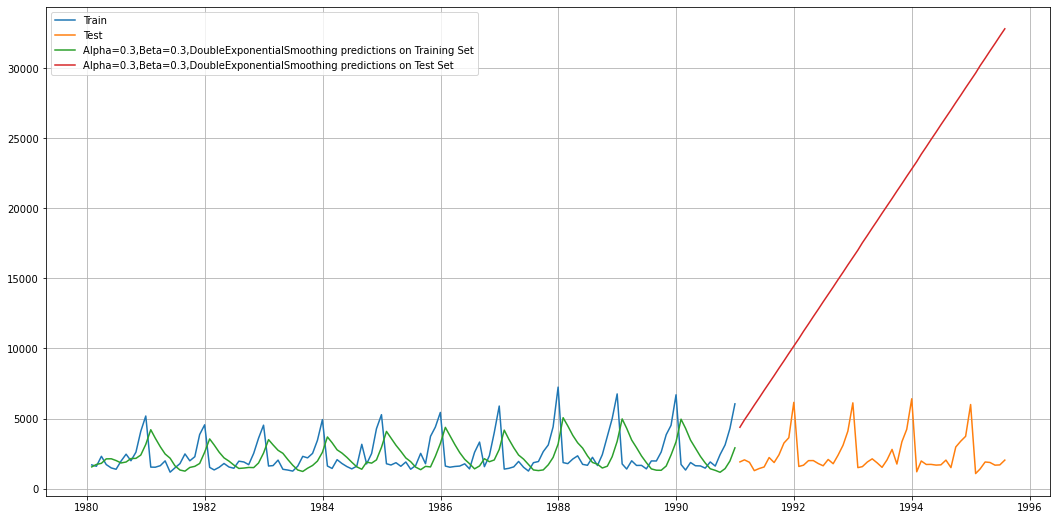

In [118]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [119]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [resultsDf_8['Test RMSE'][0]],'Test MAPE':[resultsDf_8['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                   1275.867052      39.16
NaiveModel                                         3864.279352     152.87
SimpleAverageModel                                 1275.081804      38.90
2pointTrailingMovingAverage                         813.400684      19.70
4pointTrailingMovingAverage                        1156.589694      35.96
6pointTrailingMovingAverage                        1283.927428      43.86
9pointTrailingMovingAverage                        1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                 1275.081823      38.90
Alpha=0.01,SimpleExponentialSmoothing              1276.252528      39.92
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing   3850.989796     152.06
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing     18259.110704     675.28

# 9. Triple Exponential Smoothing (automated)

In [120]:
TES_train = train.copy()
TES_test = test.copy()

In [121]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'], freq='M', trend='additive',seasonal='additive')

In [122]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [123]:
model_TES_autofit.params

{'smoothing_level': 0.08621976457712728,
 'smoothing_slope': 1.3722820308989836e-08,
 'smoothing_seasonal': 0.4763668704627969,
 'damping_slope': nan,
 'initial_level': 1684.7567371537205,
 'initial_slope': 0.00663980720702693,
 'initial_seasons': array([  39.19865194,  -37.26225944,  465.11612145,  205.83244815,
        -140.69775927, -156.92133674,  338.06682948,  856.76977123,
         403.45669741,  971.24810067, 2401.69439277, 3426.88784686]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [124]:
print(model_TES_autofit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                       18194520.891
Optimized:                         True   AIC                           1594.065
Trend:                         Additive   BIC                           1640.190
Seasonal:                      Additive   AICC                          1600.119
Seasonal Periods:                    12   Date:                 Tue, 08 Sep 2020
Box-Cox:                          False   Time:                         05:10:40
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0862198                alpha                 True
smoothing_slope          

In [125]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sparkling  auto_predict
Time_Stamp                         
1980-01-31       1686   1723.962029
1980-02-29       1591   1644.234680
1980-03-31       2304   2142.029819
1980-04-30       1712   1896.717817
1980-05-31       1471   1534.267922

In [126]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1532.422201
1991-02-28       2049   1241.380627
1991-03-31       1874   1726.781065
1991-04-30       1279   1584.320418
1991-05-31       1432   1494.023217

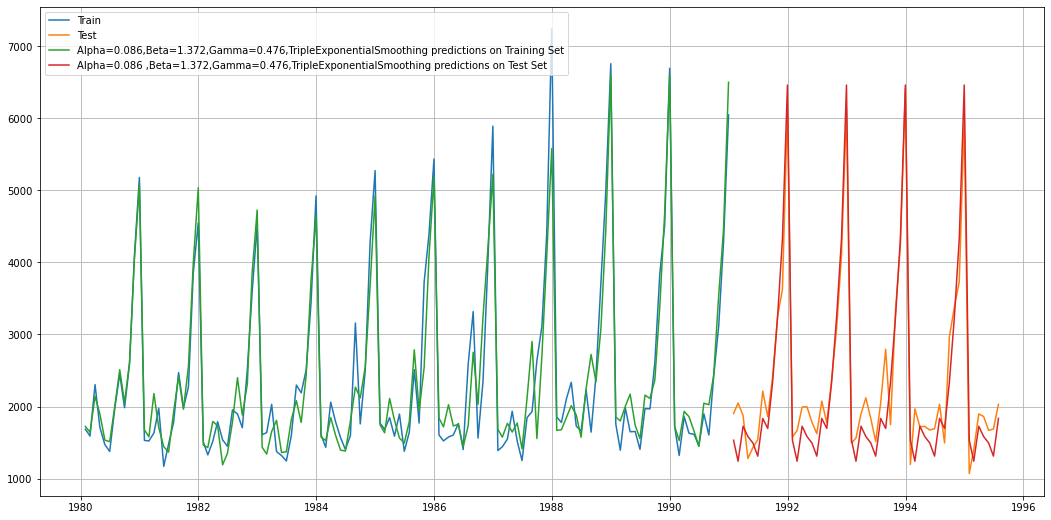

In [127]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.086,Beta=1.372,Gamma=0.476,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.086 ,Beta=1.372,Gamma=0.476,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [128]:
## Training Data

rmse_model9_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model9_train = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print("For Alpha: 0.0862,Beta: 1.3722 and Gamma: 0.4763, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model9_train, mape_model9_train))

For Alpha: 0.0862,Beta: 1.3722 and Gamma: 0.4763, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 371.264 MAPE is 10.90


In [129]:
## Test Data

rmse_model9_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model9_test = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha: 0.082, Beta: 1.3722 and Gamma: 0.4763, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model9_test, mape_model9_test))

For Alpha: 0.082, Beta: 1.3722 and Gamma: 0.4763, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 362.733 MAPE is 12.08


In [130]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_model9_test],'Test MAPE':[mape_model9_test]}
                           ,index=['Alpha=0.082, Beta=1.3722 ,Gamma=0.4763,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1275.867052      39.16
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                   1275.081823      38.90
Alpha=0.01,SimpleExponentialSmoothing                1276.252528      39.92
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     3850.989796     152.06
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.082, Beta=1.3722 ,Gamma=0.4763,TripleEx...    362.732615      12.08

# 10.Triple Exponential Smoothing in range 0.3 to 1.1

In [131]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_10 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_10

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [132]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_beta_j_gamma_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_beta_j_gamma_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_beta_j_gamma_k.forecast(steps=len(TES_test))
        
            rmse_model10_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            mape_model10_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
        
            rmse_model10_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model10_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_10 = resultsDf_10.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model10_train
                                      ,'Train MAPE': mape_model10_train,'Test RMSE':rmse_model10_test
                                      ,'Test MAPE':mape_model10_test}, ignore_index=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWa

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

In [133]:
resultsDf_10

Alpha Values  Beta Values  Gamma Values    Train RMSE  Train MAPE  \
0             0.3          0.3           0.3  4.383216e+02       13.41   
1             0.3          0.3           0.4  4.319542e+02       12.89   
2             0.3          0.3           0.5  4.316733e+02       12.64   
3             0.3          0.3           0.6  4.363484e+02       12.66   
4             0.3          0.3           0.7  4.496078e+02       12.99   
..            ...          ...           ...           ...         ...   
507           1.0          1.0           0.6  1.123268e+04      273.65   
508           1.0          1.0           0.7  4.740051e+04      943.76   
509           1.0          1.0           0.8  1.845466e+05     3269.94   
510           1.0          1.0           0.9  6.244359e+05    10667.45   
511           1.0          1.0           1.0  1.854340e+06    30582.74   

        Test RMSE   Test MAPE  
0    2.158641e+03       81.42  
1    3.428185e+03      128.87  
2    4.147770e+03      155.39  
3    4.325616e+03      161.62  
4    4.284482e+03      159.47  
..            ...         ...  
507  9.057370e+05    33002.93  
508  2.505182e+06    91053.17  
509  6.264480e+06   227189.69  
510  2.138777e+07   776066.18  
511  8.629172e+07  3137079.58  

[512 rows x 7 columns]

In [134]:
resultsDf_10.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Beta Values  Gamma Values    Train RMSE  Train MAPE  \
72            0.4          0.4           0.3  4.592230e+02       14.02   
128           0.5          0.3           0.3  4.540258e+02       13.69   
145           0.5          0.5           0.4  4.757610e+02       14.15   
137           0.5          0.4           0.4  4.638001e+02       13.79   
456           1.0          0.4           0.3  6.269249e+02       18.80   
..            ...          ...           ...           ...         ...   
495           1.0          0.8           1.0  2.453770e+05     4546.11   
509           1.0          1.0           0.8  1.845466e+05     3269.94   
510           1.0          1.0           0.9  6.244359e+05    10667.45   
503           1.0          0.9           1.0  6.581202e+05    11489.44   
511           1.0          1.0           1.0  1.854340e+06    30582.74   

        Test RMSE   Test MAPE  
72   4.626650e+02       14.73  
128  4.698645e+02       15.52  
145  4.772966e+02       15.32  
137  6.445217e+02       22.65  
456  6.614818e+02       23.19  
..            ...         ...  
495  4.997368e+06   182084.45  
509  6.264480e+06   227189.69  
510  2.138777e+07   776066.18  
503  2.239824e+07   814554.17  
511  8.629172e+07  3137079.58  

[512 rows x 7 columns]

In [135]:
model_TES_2 = ExponentialSmoothing(TES_train['Sparkling'], freq='M', trend='additive',seasonal='additive')
model_TES_2_autofit = model_TES.fit(smoothing_level=0.4,smoothing_slope=0.4,smoothing_seasonal=0.3,optimized=True,use_brute=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [136]:
print(model_TES_2_autofit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                       27836920.016
Optimized:                         True   AIC                           1650.197
Trend:                         Additive   BIC                           1696.322
Seasonal:                      Additive   AICC                          1656.251
Seasonal Periods:                    12   Date:                 Tue, 08 Sep 2020
Box-Cox:                          False   Time:                         05:11:26
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4000000                alpha                False
smoothing_slope          

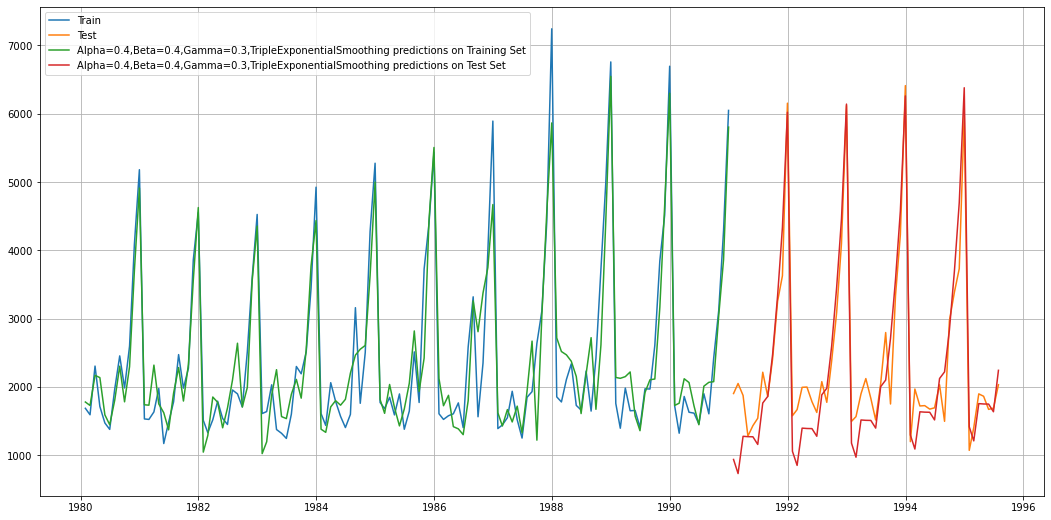

In [137]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['predict', 0.4, 0.4, 0.3], label='Alpha=0.4,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.4, 0.4, 0.3], label='Alpha=0.4,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [138]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [resultsDf_10['Test RMSE'][72]],'Test MAPE':[resultsDf_10['Test MAPE'][72]]}
                           ,index=['Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1275.867052      39.16
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                   1275.081823      38.90
Alpha=0.01,SimpleExponentialSmoothing                1276.252528      39.92
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     3850.989796     152.06
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.082, Beta=1.3722 ,Gamma=0.4763,TripleEx...    362.732615      12.08
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.664967      14.73

# 11.Automated ARIMA based on AIC criteria

In [139]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [140]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [141]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591681
ARIMA(0, 1, 2) - AIC:2234.4083231284767
ARIMA(0, 1, 3) - AIC:2233.9948577528558
ARIMA(1, 1, 0) - AIC:2266.608539319009
ARIMA(1, 1, 1) - AIC:2235.7550946774113
ARIMA(1, 1, 2) - AIC:2234.5272004519866


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 3) - AIC:2235.607808080934
ARIMA(2, 1, 0) - AIC:2260.365743968102
ARIMA(2, 1, 1) - AIC:2233.777626292722
ARIMA(2, 1, 2) - AIC:2213.5092123928453


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3) - AIC:2232.8538588486417
ARIMA(3, 1, 0) - AIC:2257.723378997941
ARIMA(3, 1, 1) - AIC:2235.4990462653477


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2) - AIC:2230.772085240767
ARIMA(3, 1, 3) - AIC:2221.464178018094


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [142]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.464178
14  (3, 1, 2)  2230.772085
11  (2, 1, 3)  2232.853859
9   (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
6   (1, 1, 2)  2234.527200
13  (3, 1, 1)  2235.499046
7   (1, 1, 3)  2235.607808
5   (1, 1, 1)  2235.755095
12  (3, 1, 0)  2257.723379
8   (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
4   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [143]:
mod = ARIMA(train['Sparkling'], order=(2,1,2))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Tue, 08 Sep 2020   AIC                           2213.509
Time:                        05:11:36   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

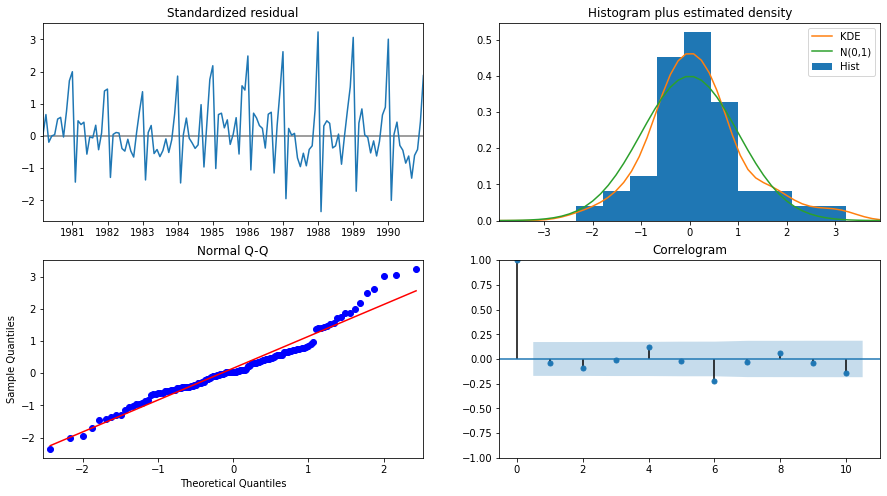

In [144]:
results_Arima.plot_diagnostics();

In [145]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1991-01-31    4252.346471
1991-02-28    2863.094190
1991-03-31    2043.981113
1991-04-30    1746.214744
1991-05-31    1813.637173
1991-06-30    2068.641485
1991-07-31    2365.526078
1991-08-31    2612.448890
1991-09-30    2770.393033
1991-10-31    2839.530730
1991-11-30    2841.909845
1991-12-31    2806.363256
1992-01-31    2758.391627
1992-02-29    2715.328578
1992-03-31    2685.655365
1992-04-30    2670.805741
1992-05-31    2667.917442
1992-06-30    2672.432972
1992-07-31    2679.973247
1992-08-31    2687.341406
1992-09-30    2692.792009
1992-10-31    2695.822835
1992-11-30    2696.751124
1992-12-31    2696.274019
1993-01-31    2695.128821
1993-02-28    2693.893036
1993-03-31    2692.912054
1993-04-30    2692.316064
1993-05-31    2692.082717
1993-06-30    2692.109873
1993-07-31    2692.276015
1993-08-31    2692.478822
1993-09-30    2692.652006
1993-10-31    2692.765813
1993-11-30    2692.818280
1993-12-31    2692.823470
1994-01-31    2692.800937
1994-02-28    2692.768467
1994-03-31  

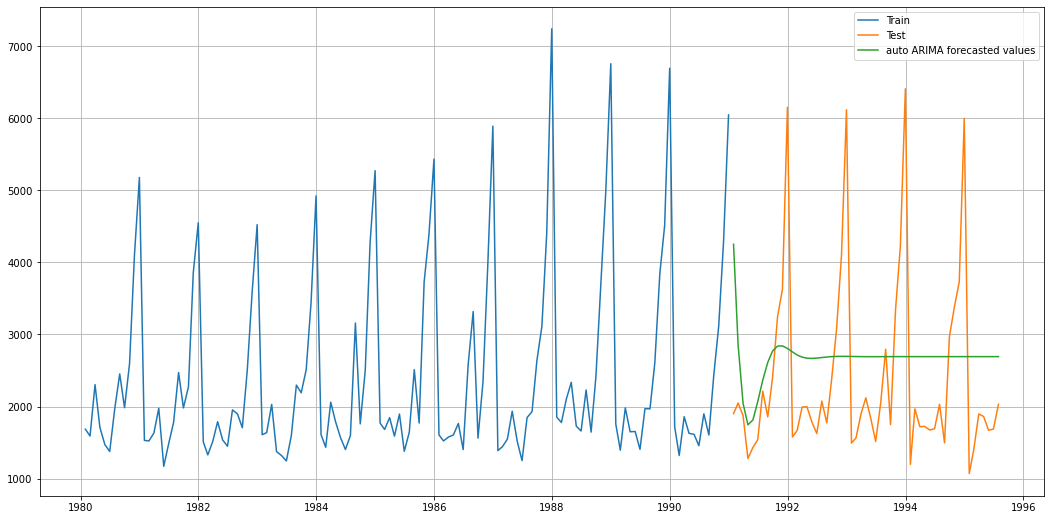

In [146]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_autoARIMA, label='auto ARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [147]:
from sklearn.metrics import mean_squared_error

In [148]:
RMSE_autoARIMA = mean_squared_error(test['Sparkling'],predicted_autoARIMA,squared=False)
MAPE_autoARIMA = MAPE(test['Sparkling'],predicted_autoARIMA)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 1299.9802037470515 
MAPE for the autofit ARIMA model: 43.2


In [149]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [RMSE_autoARIMA],'Test MAPE':[MAPE_autoARIMA]}
                           ,index=['automated ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1275.867052      39.16
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                   1275.081823      38.90
Alpha=0.01,SimpleExponentialSmoothing                1276.252528      39.92
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     3850.989796     152.06
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.082, Beta=1.3722 ,Gamma=0.4763,TripleEx...    362.732615      12.08
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.664967      14.73
automated ARIMA(2,1,2)                               1299.980204      43.20

# 12. Automated SARIMA model with seasonality 12

In [150]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [151]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [152]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.26146168447
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640232478
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.9905301389326
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735792172
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158603798
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920776
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.7688649566423
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.7089572863156
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.179588183797
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.0903193753004
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.1319668028782
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954178073
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.224508418928
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.36837422968

In [153]:
SARIMA_AIC.sort_values(by=['AIC'], ascending=True).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934565
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [154]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Tue, 08 Sep 2020   AIC                           1555.585
Time:                                    05:13:46   BIC                           1574.096
Sample:                                01-31-1980   HQIC                          1563.084
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6283      0.253     -2.483      0.013      -1.124      -0.132
ma.L1         -0.1030      0.223   

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


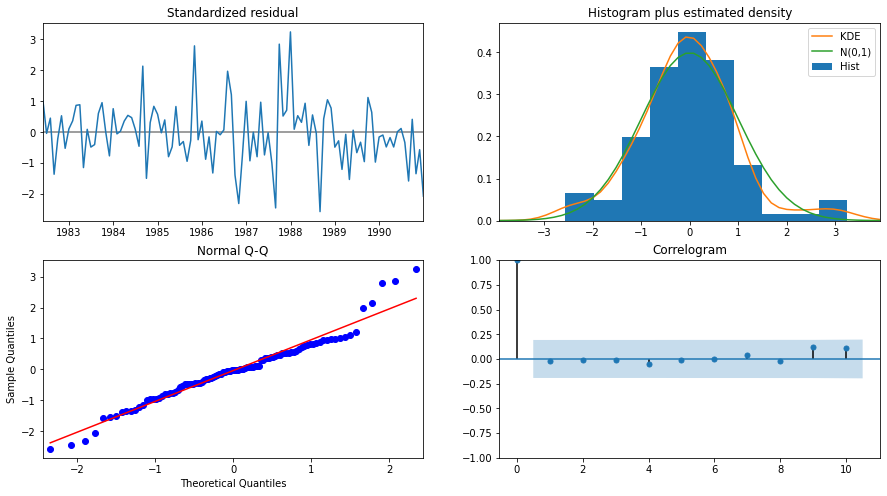

In [155]:
results_SARIMA.plot_diagnostics();

In [156]:
predicted_autoSARIMA = results_SARIMA.forecast(steps=len(test))
predicted_autoSARIMA

1991-01-31    1326.800382
1991-02-28    1317.008560
1991-03-31    1621.845395
1991-04-30    1600.134859
1991-05-31    1393.357369
1991-06-30    1225.908188
1991-07-31    1781.184512
1991-08-31    1788.738808
1991-09-30    2193.331152
1991-10-31    3185.103683
1991-11-30    4490.991014
1991-12-31    6525.191910
1992-01-31    1307.949887
1992-02-29    1174.639446
1992-03-31    1573.183917
1992-04-30    1505.955006
1992-05-31    1308.095016
1992-06-30    1097.501271
1992-07-31    1718.228222
1992-08-31    1785.693646
1992-09-30    2127.575733
1992-10-31    3225.656766
1992-11-30    4587.525120
1992-12-31    6765.644352
1993-01-31    1252.732418
1993-02-28    1076.826728
1993-03-31    1515.924167
1993-04-30    1431.240829
1993-05-31    1233.828722
1993-06-30    1008.281432
1993-07-31    1659.800683
1993-08-31    1727.960763
1993-09-30    2086.241076
1993-10-31    3231.535929
1993-11-30    4653.627778
1993-12-31    6926.816927
1994-01-31    1172.608621
1994-02-28     988.857514
1994-03-31  

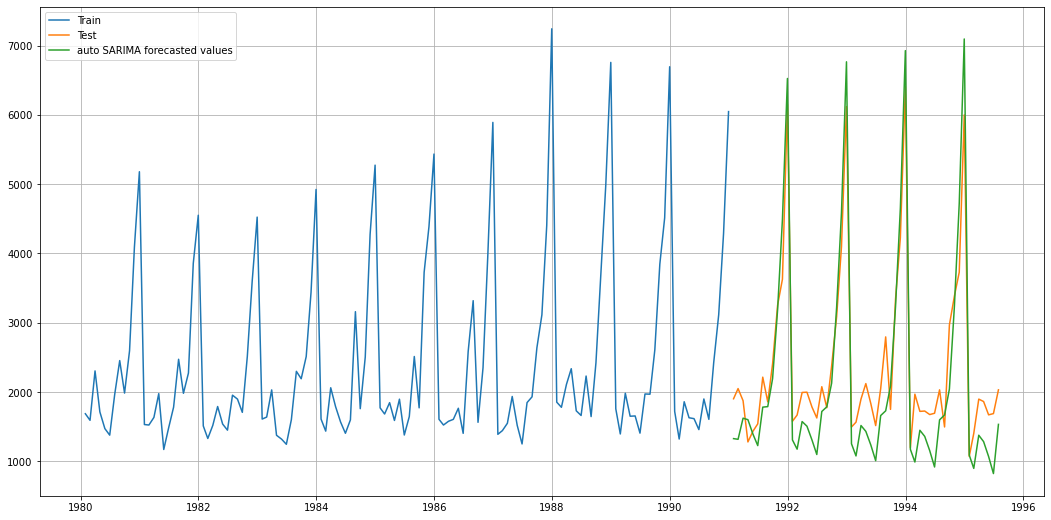

In [157]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_autoSARIMA, label='auto SARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [158]:
RMSE_autoSARIMA = mean_squared_error(test['Sparkling'],predicted_autoSARIMA,squared=False)
MAPE_autoSARIMA = MAPE(test['Sparkling'],predicted_autoSARIMA)

print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA,'\nMAPE for the autofit SARIMA model:',MAPE_autoSARIMA)

RMSE for the autofit SARIMA model: 527.5713423575794 
MAPE for the autofit SARIMA model: 18.85


In [159]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [RMSE_autoSARIMA],'Test MAPE':[MAPE_autoSARIMA]}
                           ,index=['automated SARIMA(1,1,2)*(1,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1275.867052      39.16
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                   1275.081823      38.90
Alpha=0.01,SimpleExponentialSmoothing                1276.252528      39.92
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     3850.989796     152.06
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.082, Beta=1.3722 ,Gamma=0.4763,TripleEx...    362.732615      12.08
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.664967      14.73
automated ARIMA(2,1,2)                               1299.980204      43.20
automated SARIMA(1,1,2)*(1,0,2,12)                    527.571342      18.85

# 13.Manual ARIMA with cut-off values from ACF and PACF graphs 

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


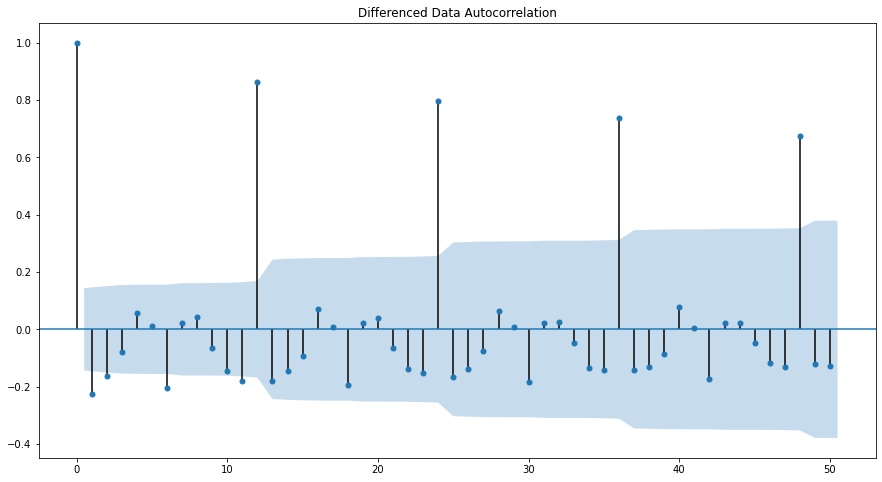

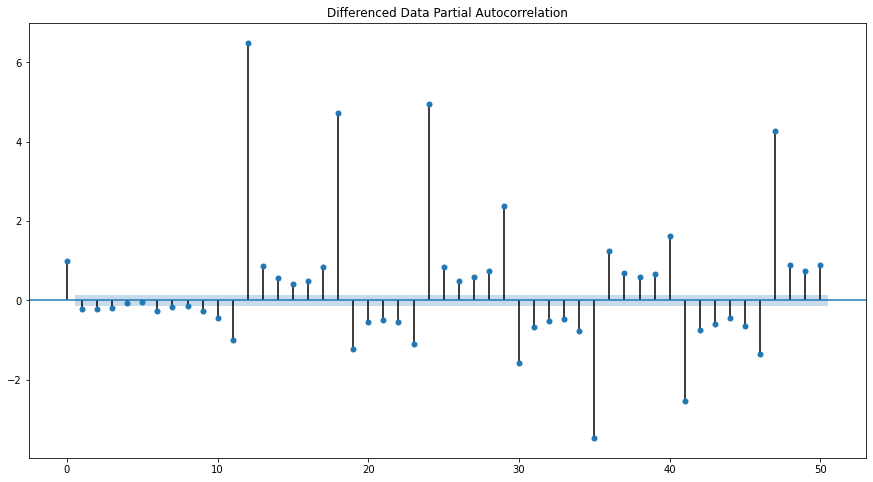

In [160]:
plot_acf(df['Sparkling'].diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff(1).dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [161]:
# the p value from PACF is 3 as there are 3 significant values above the cut-off 
# the q value from ACF is 2 as there are 2 significant values above the cut-off 
# the d values is 1 as we need single order differencing to make the series stationary

In [162]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.386
Date:                Tue, 08 Sep 2020   AIC                           2230.772
Time:                        05:13:57   BIC                           2248.023
Sample:                    01-31-1980   HQIC                          2237.782
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4338      0.042    -10.298      0.000      -0.516      -0.351
ar.L2          0.3245      0.117      2.783      0.005       0.096       0.553
ar.L3         -0.2417      0.075     -3.243      0.0

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


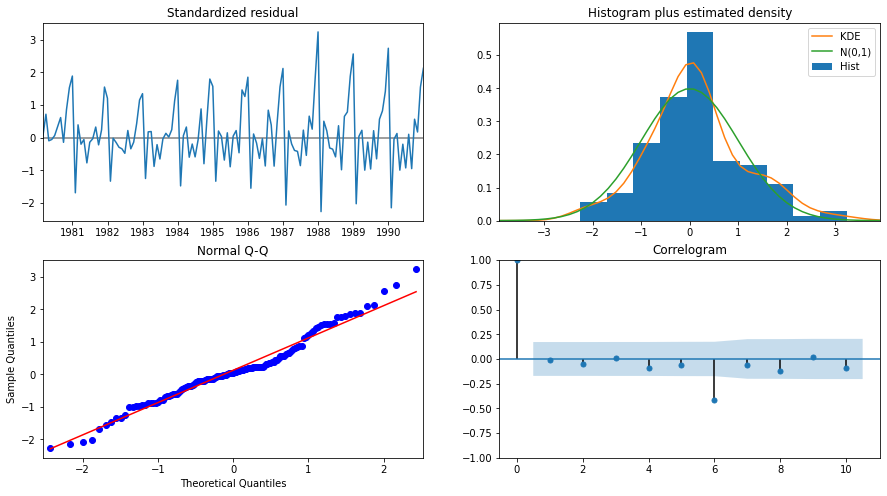

In [163]:
results_manual_ARIMA.plot_diagnostics();

In [164]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [165]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
predicted_manual_ARIMA

1991-01-31    3832.793792
1991-02-28    2746.571295
1991-03-31    2073.508340
1991-04-30    2548.151578
1991-05-31    2386.397442
1991-06-30    2773.282144
1991-07-31    2438.245840
1991-08-31    2748.223716
1991-09-30    2411.524396
1991-10-31    2739.149898
1991-11-30    2412.845407
1991-12-31    2742.091123
1992-01-31    2414.191580
1992-02-29    2742.142404
1992-03-31    2413.895272
1992-04-30    2741.962186
1992-05-31    2413.864889
1992-06-30    2741.988501
1992-07-31    2413.887176
1992-08-31    2741.994717
1992-09-30    2413.885351
1992-10-31    2741.992140
1992-11-30    2413.884374
1992-12-31    2741.992168
1993-01-31    2413.884668
1993-02-28    2741.992285
1993-03-31    2413.884706
1993-04-30    2741.992236
1993-05-31    2413.884711
1993-06-30    2741.992209
1993-07-31    2413.884736
1993-08-31    2741.992188
1993-09-30    2413.884760
1993-10-31    2741.992164
1993-11-30    2413.884783
1993-12-31    2741.992141
1994-01-31    2413.884807
1994-02-28    2741.992118
1994-03-31  

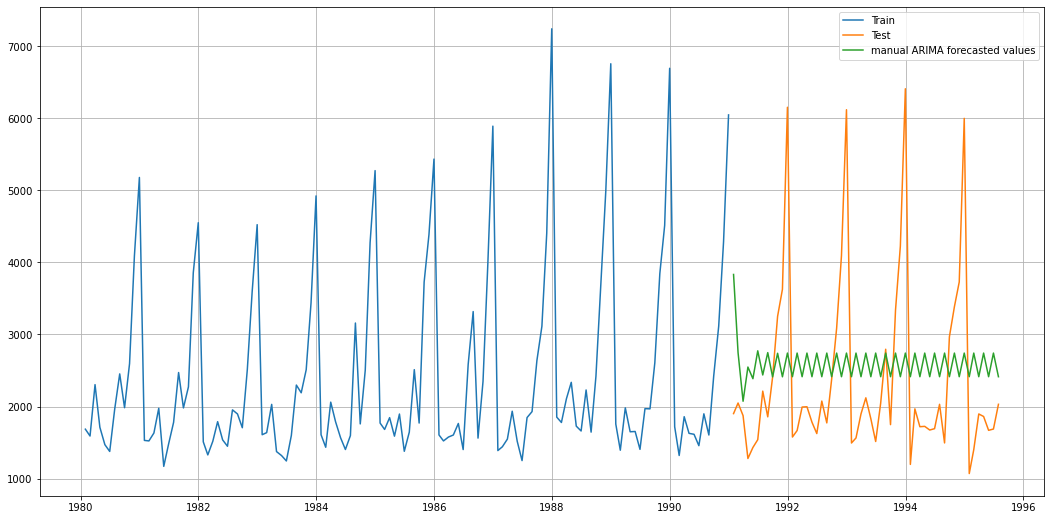

In [166]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_ARIMA, label='manual ARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [167]:
from sklearn.metrics import mean_squared_error

In [168]:
RMSE_manual_ARIMA = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
MAPE_manual_ARIMA = MAPE(test['Sparkling'],predicted_manual_ARIMA)

print('RMSE for the manual ARIMA model:',RMSE_manual_ARIMA,'\nMAPE for the manual ARIMA model:',MAPE_manual_ARIMA)

RMSE for the manual ARIMA model: 1286.4358401866896 
MAPE for the manual ARIMA model: 42.04


In [169]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [RMSE_manual_ARIMA],'Test MAPE':[MAPE_manual_ARIMA]}
                           ,index=['manual ARIMA(3,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1275.867052      39.16
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                   1275.081823      38.90
Alpha=0.01,SimpleExponentialSmoothing                1276.252528      39.92
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     3850.989796     152.06
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.082, Beta=1.3722 ,Gamma=0.4763,TripleEx...    362.732615      12.08
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.664967      14.73
automated ARIMA(2,1,2)                               1299.980204      43.20
automated SARIMA(1,1,2)*(1,0,2,12)                    527.571342      18.85
manual ARIMA(3,1,2)                                  1286.435840      42.04

# 14.manual SARIMA

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


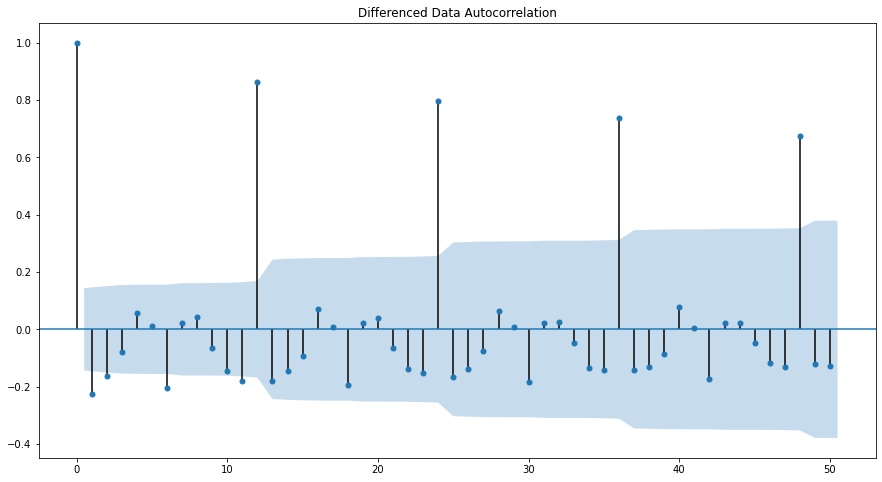

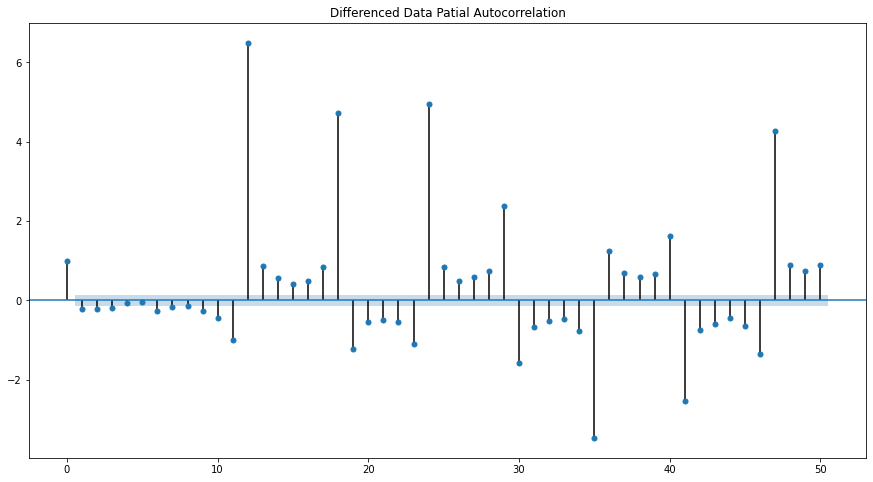

In [170]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [22]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3,1,2),
                                seasonal_order=(3,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -598.630
Date:                            Fri, 11 Sep 2020   AIC                           1219.260
Time:                                    19:50:51   BIC                           1245.462
Sample:                                         0   HQIC                          1229.765
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7556      0.151     -5.013      0.000      -1.051      -0.460
ar.L2          0.1169      0.185   

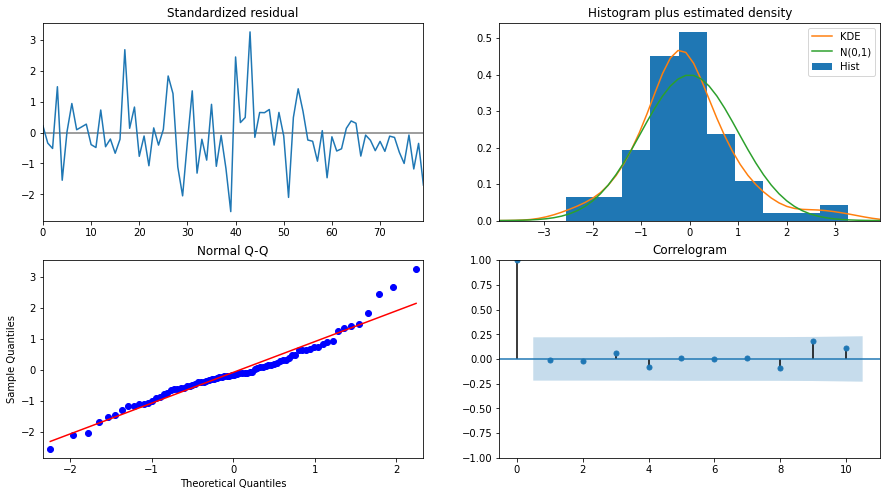

In [178]:
results_manual_SARIMA.plot_diagnostics();

In [23]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(test))
predicted_manual_SARIMA

array([1510.22979953, 1431.67364051, 1850.4012881 , 1781.9714008 ,
       1550.4436325 , 1468.96834551, 1830.98857072, 1657.69294224,
       2515.37084616, 3396.89863777, 4412.69723852, 6447.4147643 ,
       1603.69584788, 1460.63644041, 1883.76217026, 1801.77791595,
       1578.89104457, 1508.03124899, 1866.74238228, 1635.05402471,
       2443.81294119, 3477.67803321, 4451.18233268, 6334.61720811,
       1569.86444432, 1406.01002851, 1840.30559929, 1703.63633887,
       1554.41895967, 1463.6377091 , 1850.8481679 , 1710.11637536,
       2438.09078127, 3416.78820951, 4353.66513224, 6320.62565568,
       1545.99290276, 1395.42637254, 1814.48330055, 1718.95511638,
       1533.1501586 , 1459.43743727, 1821.00158026, 1643.54095621,
       2431.08098169, 3329.05609331, 4338.33121339, 6290.12630003,
       1530.58311522, 1415.92675256, 1822.53848456, 1748.95593719,
       1527.79194626, 1464.30798903, 1815.63429043])

In [24]:
predicted_manual_SARIMA_date = pd.DataFrame(predicted_manual_SARIMA, index=test.index, columns=test.columns)
predicted_manual_SARIMA_date

Sparkling
Time_Stamp             
1991-01-31  1510.229800
1991-02-28  1431.673641
1991-03-31  1850.401288
1991-04-30  1781.971401
1991-05-31  1550.443632
1991-06-30  1468.968346
1991-07-31  1830.988571
1991-08-31  1657.692942
1991-09-30  2515.370846
1991-10-31  3396.898638
1991-11-30  4412.697239
1991-12-31  6447.414764
1992-01-31  1603.695848
1992-02-29  1460.636440
1992-03-31  1883.762170
1992-04-30  1801.777916
1992-05-31  1578.891045
1992-06-30  1508.031249
1992-07-31  1866.742382
1992-08-31  1635.054025
1992-09-30  2443.812941
1992-10-31  3477.678033
1992-11-30  4451.182333
1992-12-31  6334.617208
1993-01-31  1569.864444
1993-02-28  1406.010029
1993-03-31  1840.305599
1993-04-30  1703.636339
1993-05-31  1554.418960
1993-06-30  1463.637709
1993-07-31  1850.848168
1993-08-31  1710.116375
1993-09-30  2438.090781
1993-10-31  3416.788210
1993-11-30  4353.665132
1993-12-31  6320.625656
1994-01-31  1545.992903
1994-02-28  1395.426373
1994-03-31  1814.483301
1994-04-30  1718.955116
1994-05-31  1533.150159
1994-06-30  1459.437437
1994-07-31  1821.001580
1994-08-31  1643.540956
1994-09-30  2431.080982
1994-10-31  3329.056093
1994-11-30  4338.331213
1994-12-31  6290.126300
1995-01-31  1530.583115
1995-02-28  1415.926753
1995-03-31  1822.538485
1995-04-30  1748.955937
1995-05-31  1527.791946
1995-06-30  1464.307989
1995-07-31  1815.634290

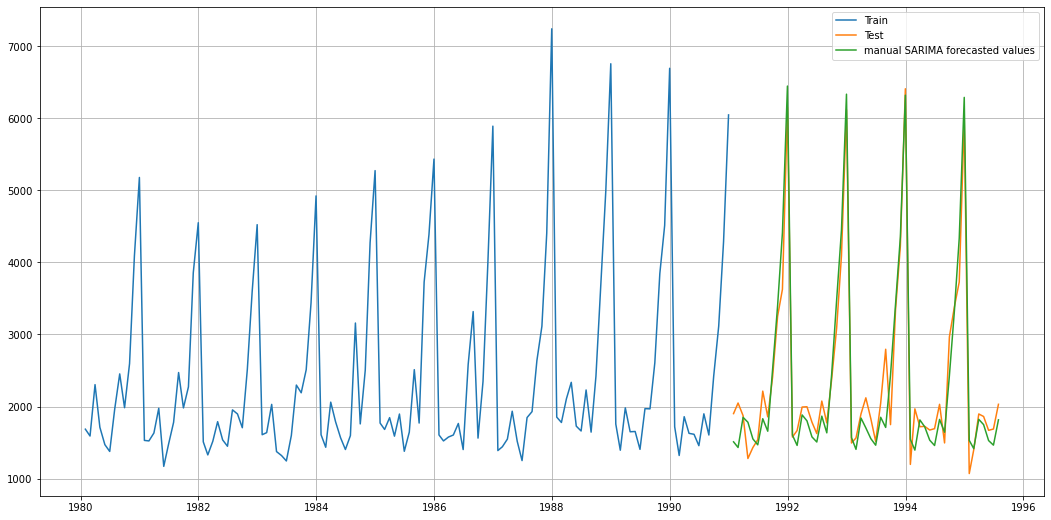

In [26]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_SARIMA_date, label='manual SARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [166]:
from sklearn.metrics import mean_squared_error

In [167]:
RMSE_manual_SARIMA = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA,squared=False)
MAPE_manual_SARIMA = MAPE(test['Sparkling'],predicted_manual_SARIMA)

print('RMSE for the manual SARIMA model:',RMSE_manual_SARIMA,'\nMAPE for the autofit SARIMA model:',MAPE_manual_SARIMA)

RMSE for the manual SARIMA model: 329.5351968729145 
MAPE for the autofit SARIMA model: 10.36


In [168]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [RMSE_manual_SARIMA],'Test MAPE':[MAPE_manual_SARIMA]}
                           ,index=['manual SARIMA(3,1,2)(3,1,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1275.867052      39.16
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                   1275.081823      38.90
Alpha=0.01,SimpleExponentialSmoothing                1276.252528      39.92
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     3850.989796     152.06
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.082, Beta=1.3722 ,Gamma=0.4763,TripleEx...    362.732615      12.08
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.664967      14.73
automated ARIMA(2,1,2)                               1299.980204      43.20
automated SARIMA(1,1,2)*(1,0,2,12)                    527.571342      18.85
manual ARIMA(3,1,2)                                  1286.435840      42.04
manual SARIMA(3,1,2)(3,1,2,12)                        329.535197      10.36

# 15. RESULTS

In [169]:
resultsDf.sort_values(by=['Test RMSE'], ascending=True)

Test RMSE  Test MAPE
manual SARIMA(3,1,2)(3,1,2,12)                        329.535197      10.36
Alpha=0.082, Beta=1.3722 ,Gamma=0.4763,TripleEx...    362.732615      12.08
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.664967      14.73
automated SARIMA(1,1,2)*(1,0,2,12)                    527.571342      18.85
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
SimpleAverageModel                                   1275.081804      38.90
Alpha=0,SimpleExponentialSmoothing                   1275.081823      38.90
RegressionOnTime                                     1275.867052      39.16
Alpha=0.01,SimpleExponentialSmoothing                1276.252528      39.92
6pointTrailingMovingAverage                          1283.927428      43.86
manual ARIMA(3,1,2)                                  1286.435840      42.04
automated ARIMA(2,1,2)                               1299.980204      43.20
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     3850.989796     152.06
NaiveModel                                           3864.279352     152.87
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28

In [170]:
resultsDf.sort_values(by=['Test MAPE'], ascending=True)

Test RMSE  Test MAPE
manual SARIMA(3,1,2)(3,1,2,12)                        329.535197      10.36
Alpha=0.082, Beta=1.3722 ,Gamma=0.4763,TripleEx...    362.732615      12.08
Alpha=0.4, Beta=0.4 ,Gamma=0.3,TripleExponentia...    462.664967      14.73
automated SARIMA(1,1,2)*(1,0,2,12)                    527.571342      18.85
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
SimpleAverageModel                                   1275.081804      38.90
Alpha=0,SimpleExponentialSmoothing                   1275.081823      38.90
RegressionOnTime                                     1275.867052      39.16
Alpha=0.01,SimpleExponentialSmoothing                1276.252528      39.92
manual ARIMA(3,1,2)                                  1286.435840      42.04
automated ARIMA(2,1,2)                               1299.980204      43.20
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=0.64 and Beta=0,DoubleExponentialSmoothing     3850.989796     152.06
NaiveModel                                           3864.279352     152.87
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28

In [171]:
# we can see that the manual SARIMA model is giving the lowest RMSE and MAPE on test data. So, we will go with manual SARIMA model.

# 16.Most Optimum Model on Complete Dataset

In [172]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -1000.243
Date:                            Tue, 08 Sep 2020   AIC                           2022.487
Time:                                    04:11:48   BIC                           2054.445
Sample:                                01-31-1980   HQIC                          2035.473
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8610      0.090     -9.549      0.000      -1.038      -0.684
ar.L2          0.0119      0.129   

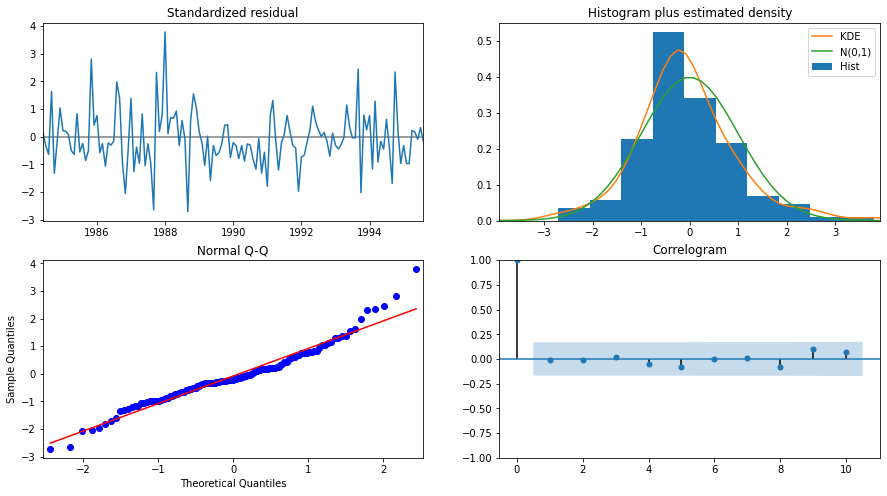

In [173]:
results_full_data_model.plot_diagnostics();

# 17.Forecasting 12 months into the future with the complete model

In [174]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [175]:
predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1868.881794  396.433151    1091.887095    2645.876493
1995-09-30  2511.263903  401.786376    1723.777077    3298.750730
1995-10-31  3272.775604  402.629455    2483.636373    4061.914836
1995-11-30  3874.562352  403.044638    3084.609377    4664.515326
1995-12-31  6099.073837  403.064212    5309.082498    6889.065175

In [176]:
predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).tail()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1996-03-31  1872.430762  404.404055    1079.813379    2665.048146
1996-04-30  1851.414350  404.425127    1058.755666    2644.073035
1996-05-31  1719.872671  405.005216     926.077033    2513.668309
1996-06-30  1631.740976  405.035370     837.886237    2425.595714
1996-07-31  2038.437772  405.577226    1243.521016    2833.354528

In [177]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 578.9671949347013


In [178]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

In [179]:
pred_full_manual_SARIMA_date

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1868.881794  396.433151    1091.887095    2645.876493
1995-09-30  2511.263903  401.786376    1723.777077    3298.750730
1995-10-31  3272.775604  402.629455    2483.636373    4061.914836
1995-11-30  3874.562352  403.044638    3084.609377    4664.515326
1995-12-31  6099.073837  403.064212    5309.082498    6889.065175
1996-01-31  1191.733252  403.772626     400.353447    1983.113056
1996-02-29  1557.109345  403.784457     765.706351    2348.512339
1996-03-31  1872.430762  404.404055    1079.813379    2665.048146
1996-04-30  1851.414350  404.425127    1058.755666    2644.073035
1996-05-31  1719.872671  405.005216     926.077033    2513.668309
1996-06-30  1631.740976  405.035370     837.886237    2425.595714
1996-07-31  2038.437772  405.577226    1243.521016    2833.354528

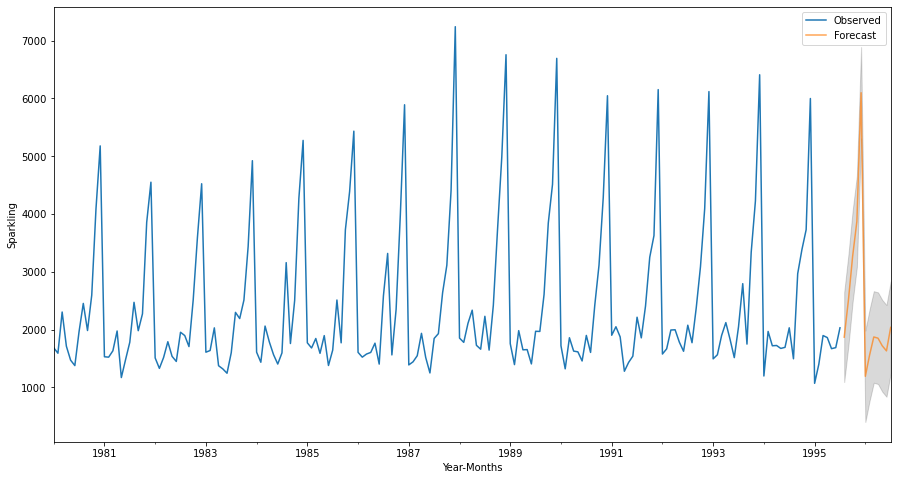

In [180]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

# PROBLEM 2

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels

In [28]:
df2 = pd.read_csv('Rose.csv')
df2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [29]:
df2.shape

(187, 2)

In [30]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [31]:
df2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df2.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [32]:
df2['Time_Stamp'] = pd.to_datetime(df2['Time_Stamp'])

In [33]:
DF = df2.set_index('Time_Stamp')
DF.drop(['YearMonth'], axis=1, inplace=True)
DF.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

# 18.EDA

In [34]:
DF.shape

(187, 1)

In [35]:
DF.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

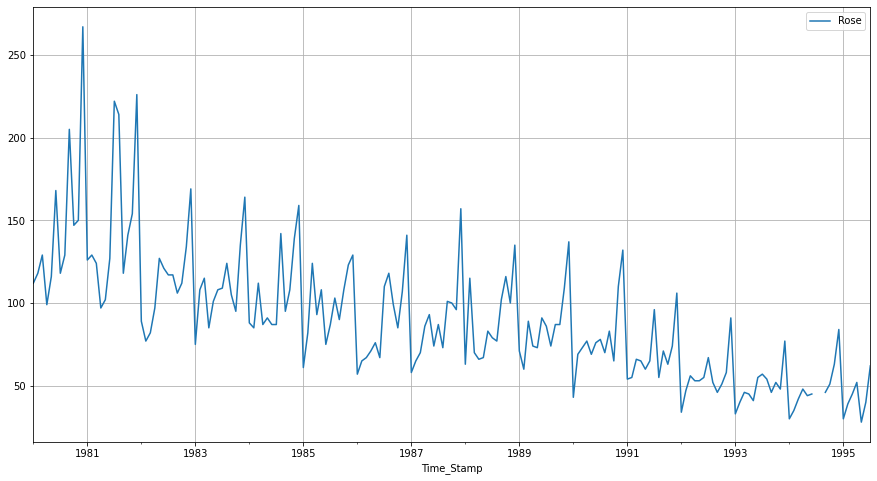

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
DF.plot();
plt.grid()

In [11]:
DF.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [37]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [38]:
DF.isnull().sum()

Rose    2
dtype: int64

In [39]:
# we can see that our Time Series has holes due to the two missing values. We are going to interplolate the time series
# using interpolate function and spline method

In [40]:
DF = DF.interpolate(method='spline', order=1)

In [41]:
DF.isnull().sum()

Rose    0
dtype: int64

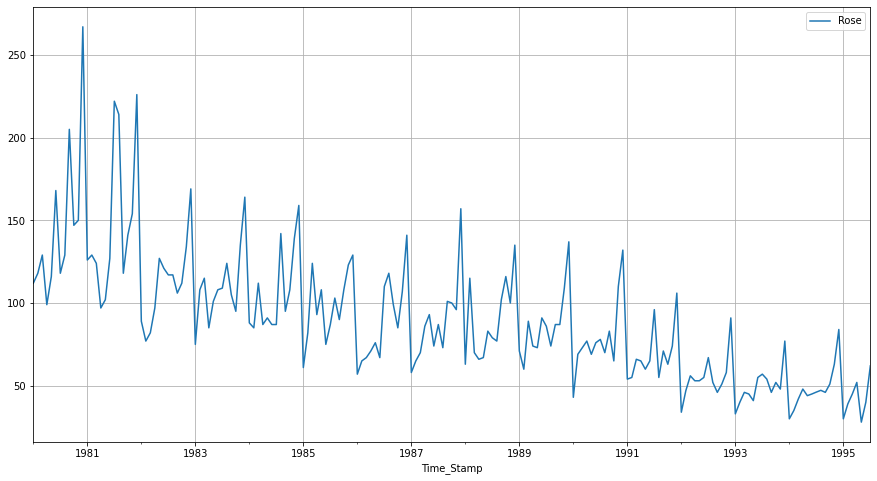

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
DF.plot();
plt.grid()

In [35]:
# from the above figure we can see there is a downward trend and multiplicative seasonality

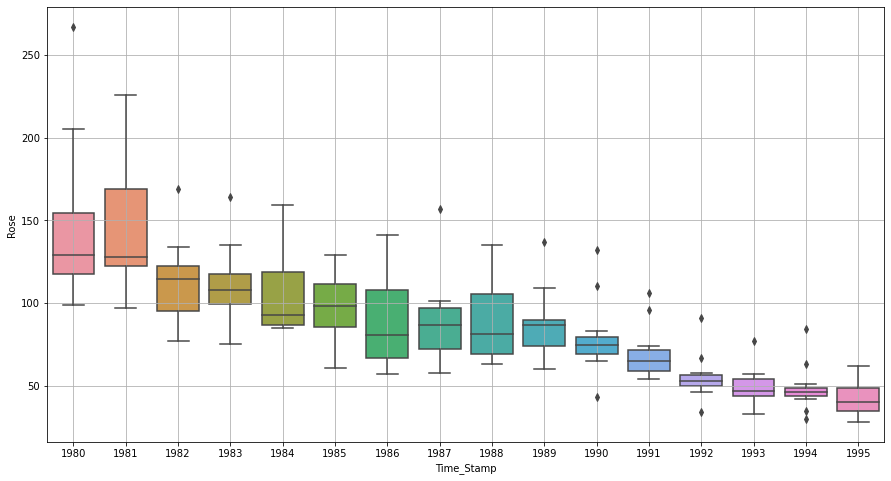

In [36]:
# Yearly Boxplot
sns.boxplot(x = DF.index.year,y = DF['Rose'])
plt.grid();

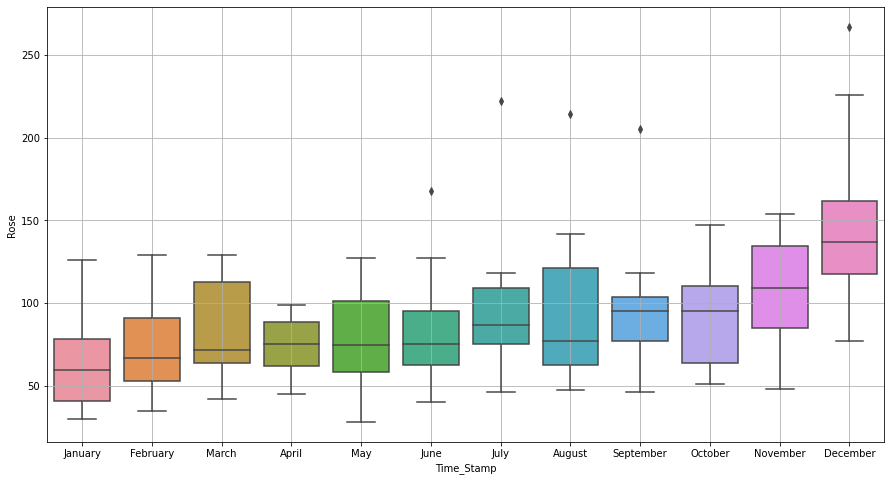

In [37]:
#Monthly Boxplot
sns.boxplot(x = DF.index.month_name(),y = DF['Rose'])
plt.grid();

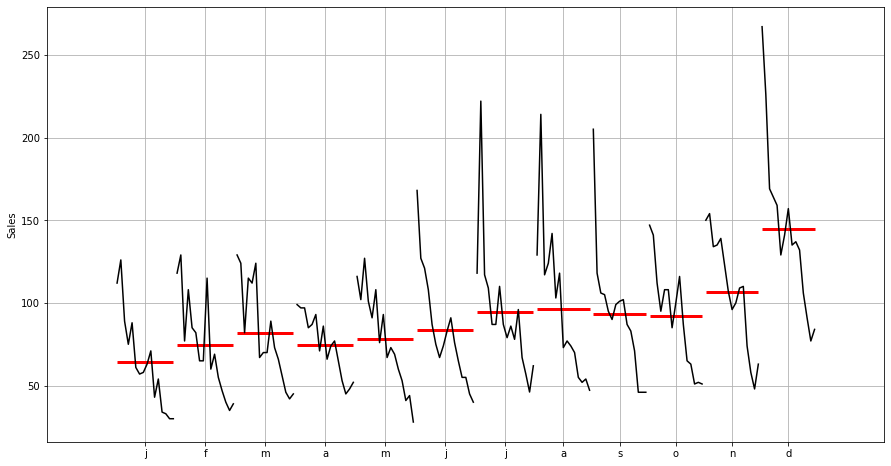

In [38]:
## Plot a time series monthplot to understand the spread of Sales across different years and within different months 
#across years.
from statsmodels.graphics.tsaplots import month_plot

month_plot(DF['Rose'],ylabel='Sales')
plt.grid();

In [39]:
# Plot a time series monthplot to understand the spread of Sales across
# different years and within different months across years
monthly_sales_across_years = pd.pivot_table(DF, values = 'Rose', columns = DF.index.month, index = DF.index.year)
monthly_sales_across_years

Time_Stamp     1      2      3     4      5      6           7           8   \
Time_Stamp                                                                    
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994         30.0   35.0   42.0  48.0   44.0   45.0   46.155493   47.221907   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

Time_Stamp     9      10     11     12  
Time_Stamp                              
1980        205.0  147.0  150.0  267.0  
1981        118.0  141.0  154.0  226.0  
1982        106.0  112.0  134.0  169.0  
1983        105.0   95.0  135.0  164.0  
1984         95.0  108.0  139.0  159.0  
1985         90.0  108.0  123.0  129.0  
1986         99.0   85.0  107.0  141.0  
1987        101.0  100.0   96.0  157.0  
1988        102.0  116.0  100.0  135.0  
1989         87.0   87.0  109.0  137.0  
1990         83.0   65.0  110.0  132.0  
1991         71.0   63.0   74.0  106.0  
1992         46.0   51.0   58.0   91.0  
1993         46.0   52.0   48.0   77.0  
1994         46.0   51.0   63.0   84.0  
1995          NaN    NaN    NaN    NaN

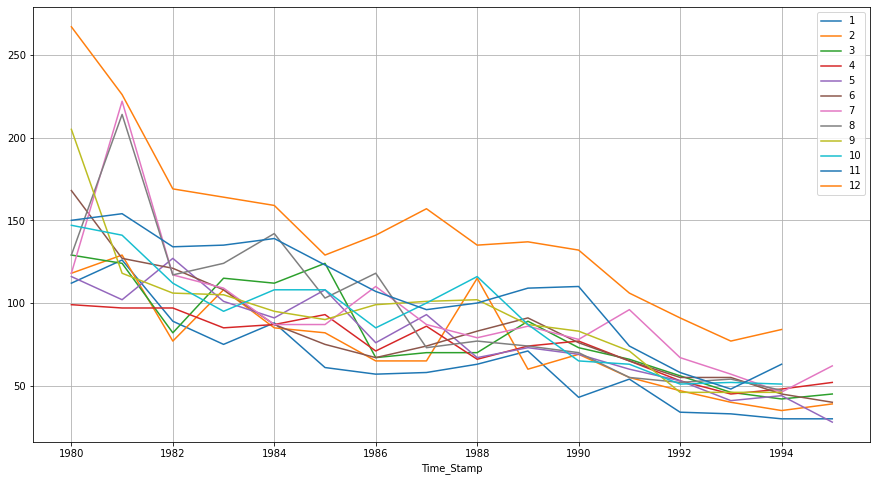

In [40]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

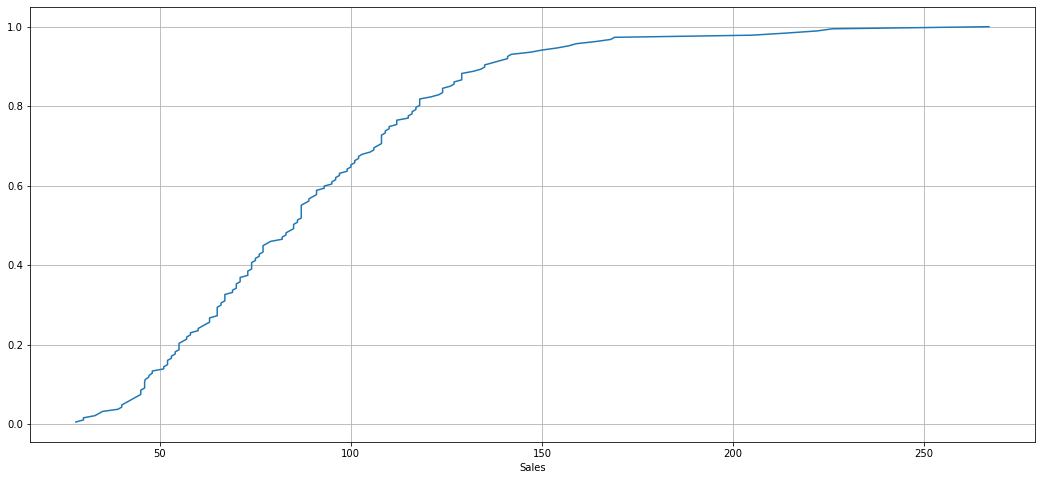

In [41]:
#Empirical Cummulative Distribution Curve
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(DF['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [42]:
DF.min()

Rose    28.0
dtype: float64

In [43]:
DF.max()

Rose    267.0
dtype: float64

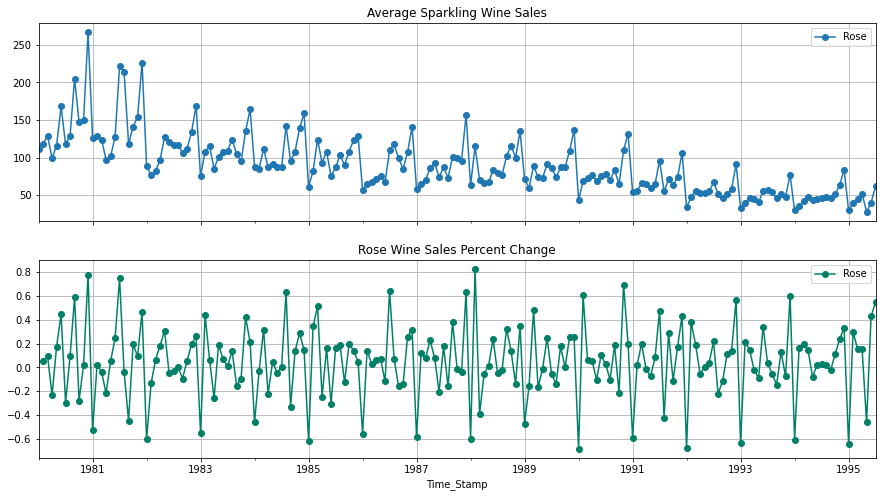

In [44]:
# Plot the average RetailSales per month and the month on month percentage change of RetailSales

# group by date and get average Sales, and precent change
average    = DF.groupby(DF.index)["Rose"].mean()
pct_change = DF.groupby(DF.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Wine Sales Percent Change",grid=True)

In [45]:
# Decomposing The Time Series
from    statsmodels.tsa.seasonal import   seasonal_decompose

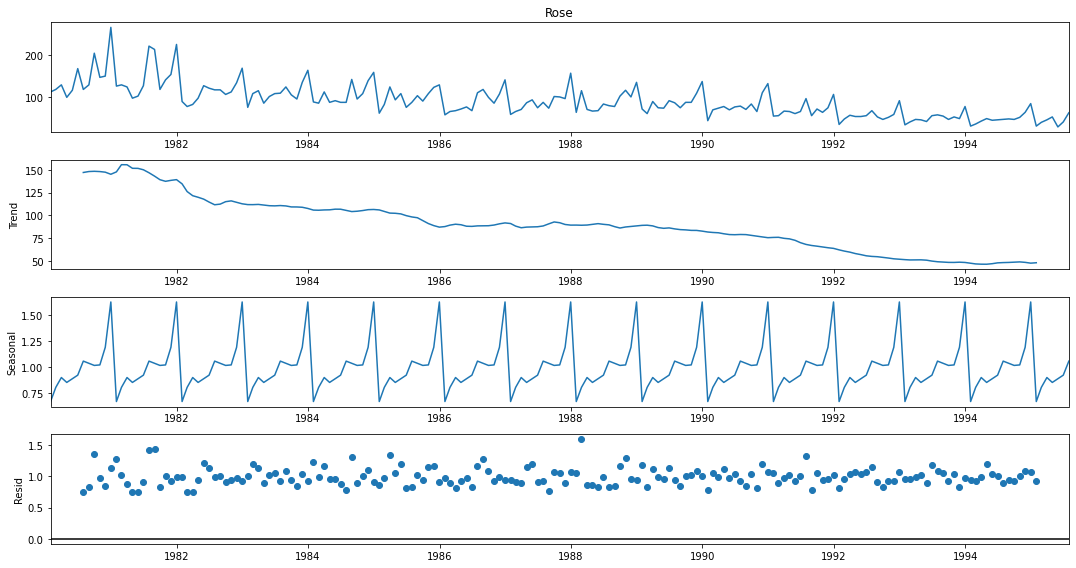

In [46]:
decomposition = seasonal_decompose(DF['Rose'],model='multiplicative')
decomposition.plot();

In [47]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.669945
1980-02-29    0.806018
1980-03-31    0.900897
1980-04-30    0.853717
1980-05-31    0.889141
1980-06-30    0.923716
1980-07-31    1.058922
1980-08-31    1.037766
1980-09-30    1.017401
1980-10-31    1.022301
1980-11-30    1.192005
1980-12-31    1.628171
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.757626
1980-08-31    0.839193
1980-09-30    1.358004
1980-10-31    0.971029
1980-11-30    0.853624
1980-12-31    1.129976
Name: resid, dtype:

# Stationarity Test

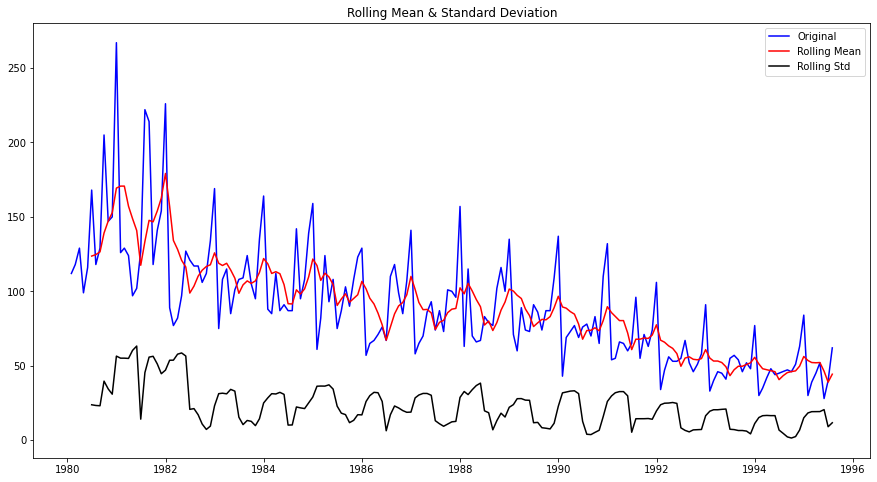

Results of Dickey-Fuller Test:
Test Statistic                  -1.880931
p-value                          0.341084
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [48]:
test_stationarity(DF['Rose'])

In [49]:
# the null hypothesis  for ADF test (H0) is that the time series is non-stationary 
# the alternate hypothesis for ADF test (H1) is that time series is stationary

# since the p-value of the ADF test is greater than the critical value at 5%, we cannot reject the null hypothesis 
# thus the given time series is non stationary

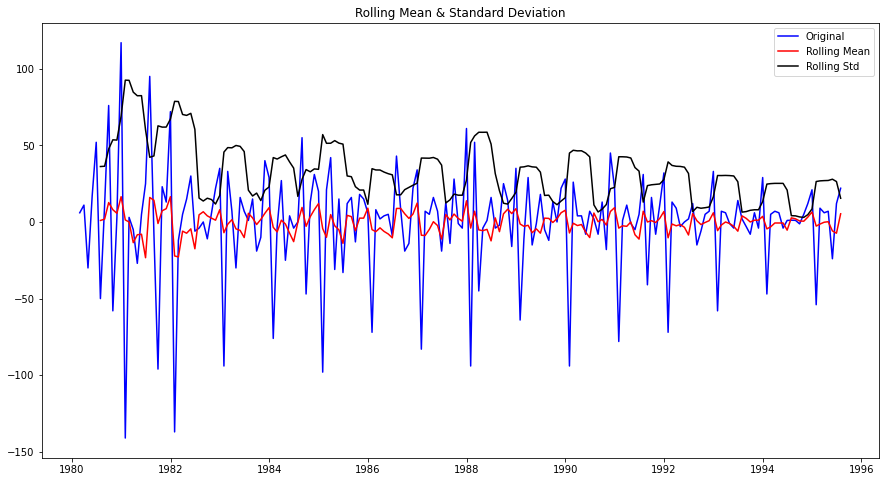

Results of Dickey-Fuller Test:
Test Statistic                -8.044820e+00
p-value                        1.806363e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [50]:
test_stationarity(DF['Rose'].diff().dropna())

In [51]:
# after taking the difference of order 1, we can see that the p-value is now less the critical value, so the time series has
# become stationary

# AutoCorrelation Plot

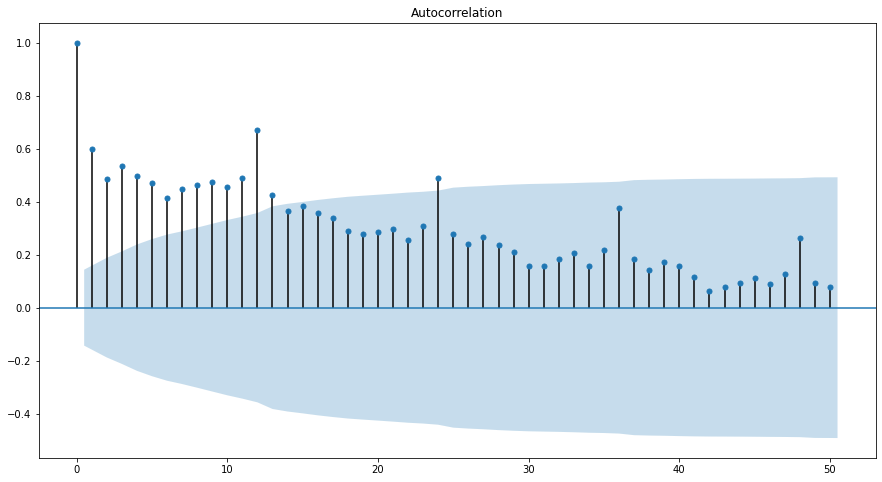

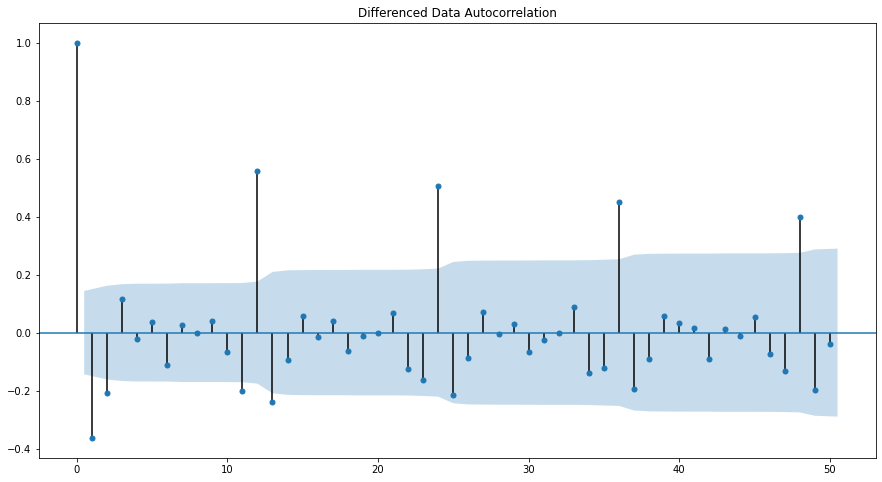

In [52]:
plot_acf(DF['Rose'],lags=50)
plot_acf(DF['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

# Partial AutoCorrelation Plot

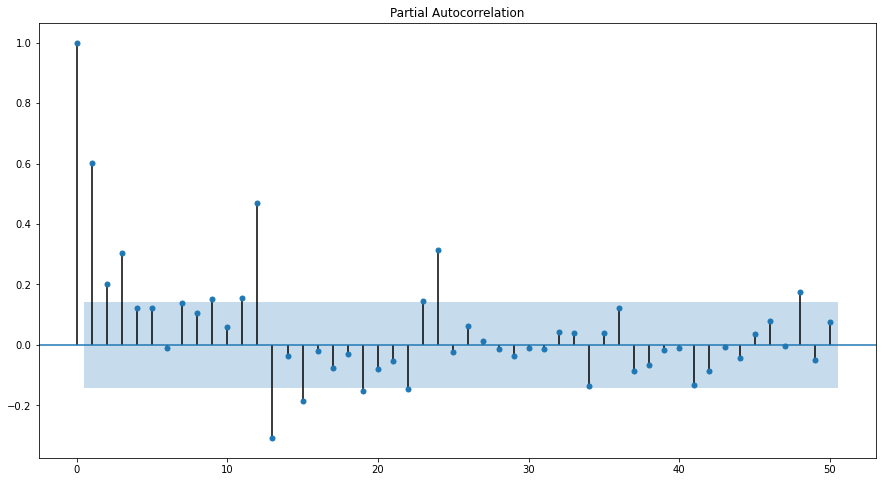

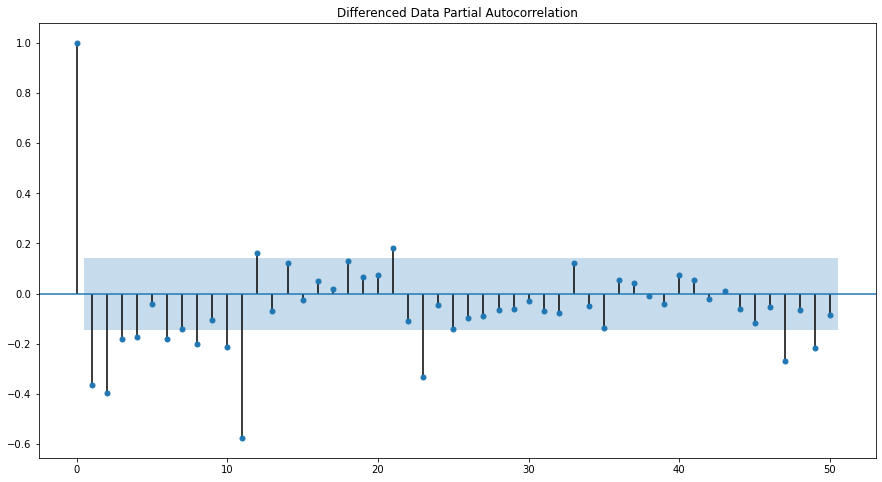

In [53]:
plot_pacf(DF['Rose'],lags=50)
plot_pacf(DF['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

# 19.Train-Test Split

In [42]:
Train= DF[DF.index.year < 1991]
Test= DF[DF.index.year >= 1991]

In [43]:
print(Train.shape)
print(Test.shape)

(132, 1)
(55, 1)


In [56]:
print('First few rows of Training Data','\n',Train.head(),'\n')
print('Last few rows of Training Data','\n',Train.tail(),'\n')
print('First few rows of Test Data','\n',Test.head(),'\n')
print('Last few rows of Test Data','\n',Test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



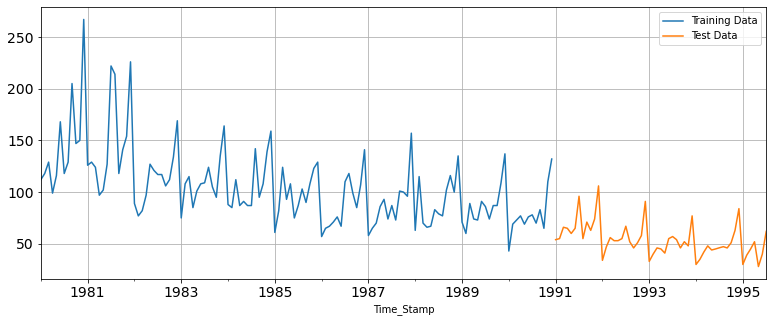

In [57]:
Train['Rose'].plot(figsize=(13,5), fontsize=14)
Test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 20.Regression Model

In [58]:
train_time_20 = [i+1 for i in range(len(Train))]
test_time_20 = [i+43 for i in range(len(Test))]
print('Training Time instance','\n',train_time_20)
print('Test Time instance','\n',test_time_20)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [59]:
LinearRegression_train_20 = Train.copy()
LinearRegression_test_20 = Test.copy()

In [60]:
LinearRegression_train_20['time'] = train_time_20
LinearRegression_test_20['time'] = test_time_20

print('First few rows of Training Data','\n',LinearRegression_train_20.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_20.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_20.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_20.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0    43
1991-02-28  55.0    44
1991-03-31  66.0    45
1991-04-30  65.0    46
1991-05-31  60.0    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0    93
1995-04-30  52.0    94
1995-05-31  28.0    95
1995-06-30  40.0    96
1995-07-31  62.0    97 



In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr_20 = LinearRegression()

In [63]:
lr_20.fit(LinearRegression_train_20[['time']],LinearRegression_train_20['Rose'].values)

LinearRegression()

In [64]:
#predictions on train data
train_predictions_model20         = lr_20.predict(LinearRegression_train_20[['time']])
LinearRegression_train_20['RegOnTime'] = train_predictions_model20

#predictions on test data
test_predictions_model20         = lr_20.predict(LinearRegression_test_20[['time']])
LinearRegression_test_20['RegOnTime'] = test_predictions_model20

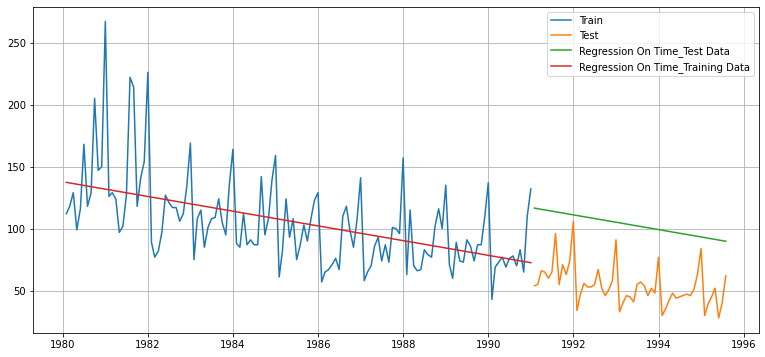

In [65]:
plt.figure(figsize=(13,6))
plt.plot( Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')
plt.plot(LinearRegression_test_20['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train_20['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [19]:
from sklearn import metrics

In [67]:
## Training Data - RMSE and MAPE

rmse_model20_train = metrics.mean_squared_error(Train['Rose'],train_predictions_model20,squared=False)
mape_model20_train = MAPE(Train['Rose'],train_predictions_model20)
print("For Regression On Time forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model20_train, mape_model20_train))

For Regression On Time forecast on the Training Data,  RMSE is 30.718 MAPE is 21.22


In [68]:
## Test Data - RMSE and MAPE

rmse_model20_test = metrics.mean_squared_error(Test['Rose'],test_predictions_model20,squared=False)
mape_model20_test = MAPE(Test['Rose'],test_predictions_model20)
print("For Regression On Time forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model20_test, mape_model20_test))

For Regression On Time forecast on the Test Data,  RMSE is 51.392 MAPE is 91.49


In [69]:
ResultsDf = pd.DataFrame({'Test RMSE': [rmse_model20_test],'Test MAPE': [mape_model20_test]},index=['RegressionOnTime'])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime   51.39189      91.49

# 21. Naive Approach Model

In [70]:
NaiveModel_train_21 = Train.copy()
NaiveModel_test_21 = Test.copy()

In [71]:
NaiveModel_train_21['naive'] = np.asarray(Train['Rose'])[len(np.asarray(Train['Rose']))-1]
NaiveModel_train_21['naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [72]:
NaiveModel_test_21['naive'] = np.asarray(Train['Rose'])[len(np.asarray(Train['Rose']))-1]
NaiveModel_test_21['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

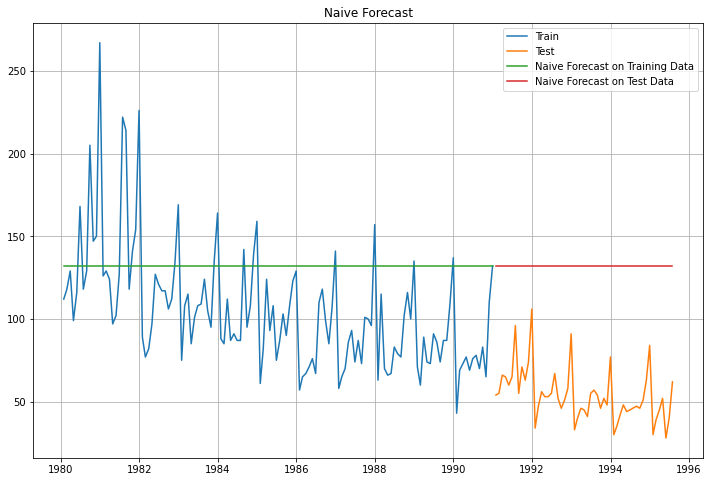

In [73]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train_21['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')
plt.plot(NaiveModel_train_21['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test_21['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [74]:
## Training Data - RMSE and MAPE

rmse_model21_train = metrics.mean_squared_error(Train['Rose'],NaiveModel_train_21['naive'],squared=False)
mape_model21_train = MAPE(Train['Rose'],NaiveModel_train_21['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model21_train, mape_model21_train))

For Naive Model forecast on the Training Data,  RMSE is 45.064 MAPE is 36.38


In [75]:
## Test Data - RMSE and MAPE

rmse_model21_test = metrics.mean_squared_error(Test['Rose'],NaiveModel_test_21['naive'],squared=False)
mape_model21_test = MAPE(Test['Rose'],NaiveModel_test_21['naive'])
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model21_test, mape_model21_test))

For Naive Model forecast on the Test Data,  RMSE is 79.672 MAPE is 144.91


In [76]:
resultsDf_21 = pd.DataFrame({'Test RMSE': [rmse_model21_test],'Test MAPE': [mape_model21_test]},index=['NaiveModel'])

ResultsDf = pd.concat([ResultsDf, resultsDf_21])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime  51.391890      91.49
NaiveModel        79.672238     144.91

# 22.Simple Average Model

In [77]:
SimpleAverage_train_22 = Train.copy()
SimpleAverage_test_22 = Test.copy()

In [78]:
SimpleAverage_train_22['mean_forecast'] = Train['Rose'].mean()
SimpleAverage_train_22.head()

Rose  mean_forecast
Time_Stamp                      
1980-01-31  112.0     104.939394
1980-02-29  118.0     104.939394
1980-03-31  129.0     104.939394
1980-04-30   99.0     104.939394
1980-05-31  116.0     104.939394

In [79]:
SimpleAverage_test_22['mean_forecast'] = Train['Rose'].mean()
SimpleAverage_test_22.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

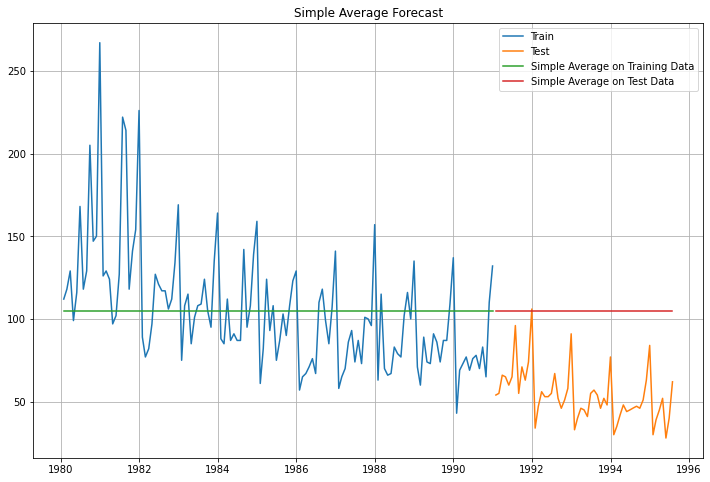

In [80]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train_22['Rose'], label='Train')
plt.plot(SimpleAverage_test_22['Rose'], label='Test')
plt.plot(SimpleAverage_train_22['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test_22['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [81]:
## Training Data - RMSE and MAPE

rmse_model22_train = metrics.mean_squared_error(Train['Rose'],SimpleAverage_train_22['mean_forecast'],squared=False)
mape_model22_train = MAPE(Train['Rose'],SimpleAverage_train_22['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model22_train, mape_model22_train))

For Simple Average Model forecast on the Training Data,  RMSE is 36.034 MAPE is 25.39


In [82]:
## Test Data - RMSE and MAPE

rmse_model22_test = metrics.mean_squared_error(Test['Rose'],SimpleAverage_test_22['mean_forecast'],squared=False)
mape_model22_test = MAPE(Test['Rose'],SimpleAverage_test_22['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model22_test, mape_model22_test))

For Simple Average forecast on the Test Data,  RMSE is 53.413 MAPE is 94.77


In [83]:
resultsDf_22 = pd.DataFrame({'Test RMSE': [rmse_model22_test],'Test MAPE': [mape_model22_test]}
                           ,index=['SimpleAverageModel'])

ResultsDf = pd.concat([ResultsDf, resultsDf_22])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime    51.391890      91.49
NaiveModel          79.672238     144.91
SimpleAverageModel  53.413057      94.77

# 23.Moving Average

In [84]:
MovingAverage_23 = DF.copy()
MovingAverage_23.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [85]:
MovingAverage_23['Trailing_2'] = MovingAverage_23['Rose'].rolling(2).mean()
MovingAverage_23['Trailing_4'] = MovingAverage_23['Rose'].rolling(4).mean()
MovingAverage_23['Trailing_6'] = MovingAverage_23['Rose'].rolling(6).mean()
MovingAverage_23['Trailing_9'] = MovingAverage_23['Rose'].rolling(9).mean()

MovingAverage_23.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

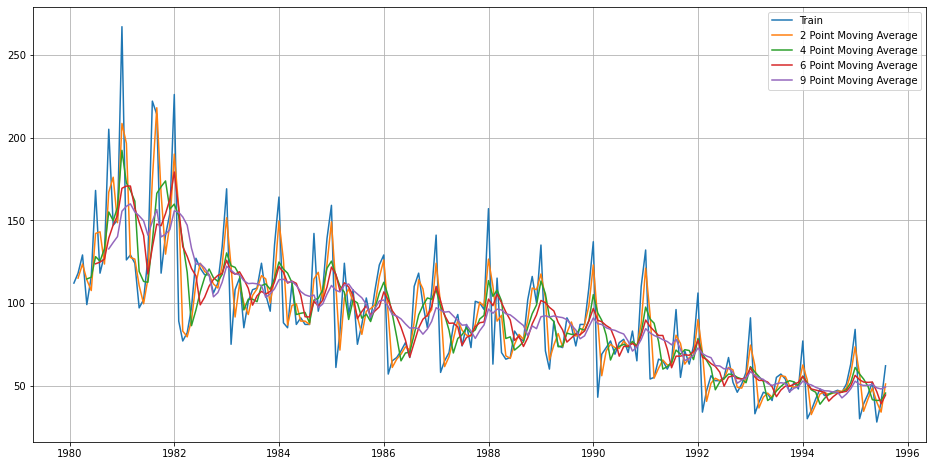

In [86]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_23['Rose'], label='Train')
plt.plot(MovingAverage_23['Trailing_2'],label='2 Point Moving Average')
plt.plot(MovingAverage_23['Trailing_4'],label='4 Point Moving Average')
plt.plot(MovingAverage_23['Trailing_6'],label='6 Point Moving Average')
plt.plot(MovingAverage_23['Trailing_9'],label='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [87]:
#Creating train and test set 
trailing_MovingAverage_23_train=MovingAverage_23[0:int(len(MovingAverage_23)*0.71)] 
trailing_MovingAverage_23_test=MovingAverage_23[int(len(MovingAverage_23)*0.71):]

In [88]:
trailing_MovingAverage_23_train.tail()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1990-08-31   70.0        74.0       73.25   73.833333   76.888889
1990-09-30   83.0        76.5       76.75   75.500000   70.888889
1990-10-31   65.0        74.0       74.00   73.500000   73.333333
1990-11-30  110.0        87.5       82.00   80.333333   77.888889
1990-12-31  132.0       121.0       97.50   89.666667   84.444444

In [89]:
trailing_MovingAverage_23_test.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                      
1991-01-31  54.0        93.0       90.25   85.666667   81.888889
1991-02-28  55.0        54.5       87.75   83.166667   80.333333
1991-03-31  66.0        60.5       76.75   80.333333   79.222222
1991-04-30  65.0        65.5       60.00   80.333333   77.777778
1991-05-31  60.0        62.5       61.50   72.000000   76.666667

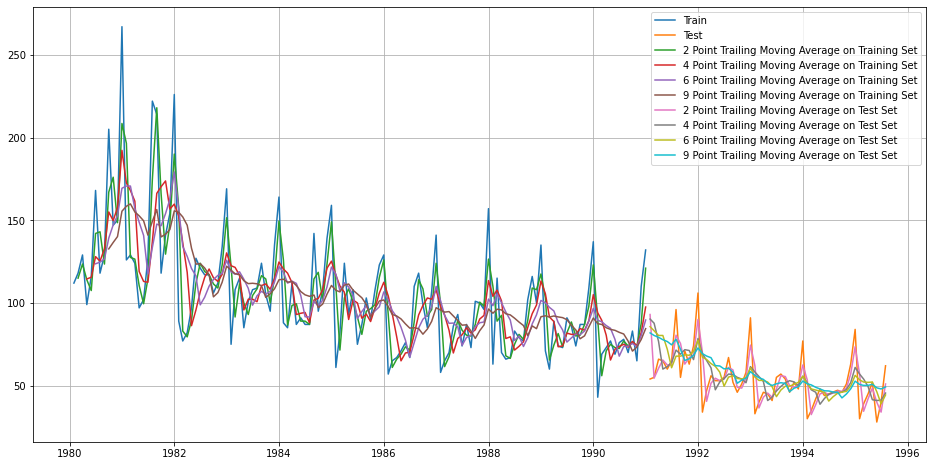

In [90]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_23_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_23_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_23_train['Trailing_2'],label ='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_23_train['Trailing_4'],label ='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_23_train['Trailing_6'],label ='6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_23_train['Trailing_9'],label ='9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_23_test['Trailing_2'],label ='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_23_test['Trailing_4'],label ='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_23_test['Trailing_6'],label ='6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_23_test['Trailing_9'],label ='9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [91]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model23_test_2 = metrics.mean_squared_error(Test['Rose'],trailing_MovingAverage_23_test['Trailing_2'],squared=False)
mape_model23_test_2 = MAPE(Test['Rose'],trailing_MovingAverage_23_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model23_test_2, mape_model23_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model23_test_4 = metrics.mean_squared_error(Test['Rose'],trailing_MovingAverage_23_test['Trailing_4'],squared=False)
mape_model23_test_4 = MAPE(Test['Rose'],trailing_MovingAverage_23_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model23_test_4, mape_model23_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model23_test_6 = metrics.mean_squared_error(Test['Rose'],trailing_MovingAverage_23_test['Trailing_6'],squared=False)
mape_model23_test_6 = MAPE(Test['Rose'],trailing_MovingAverage_23_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model23_test_6, mape_model23_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model23_test_9 = metrics.mean_squared_error(Test['Rose'],trailing_MovingAverage_23_test['Trailing_9'],squared=False)
mape_model23_test_9 = MAPE(Test['Rose'],trailing_MovingAverage_23_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model23_test_9, mape_model23_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 11.530 MAPE is 13.57
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 14.444 MAPE is 19.46
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 14.555 MAPE is 20.82
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 14.721 MAPE is 20.99


In [92]:
resultsDf_23 = pd.DataFrame({'Test RMSE': [rmse_model23_test_2,rmse_model23_test_4
                                          ,rmse_model23_test_6,rmse_model23_test_9]
                            ,'Test MAPE': [mape_model23_test_2,mape_model23_test_4,mape_model23_test_6
                                           ,mape_model23_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

ResultsDf = pd.concat([ResultsDf, resultsDf_23])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime             51.391890      91.49
NaiveModel                   79.672238     144.91
SimpleAverageModel           53.413057      94.77
2pointTrailingMovingAverage  11.529994      13.57
4pointTrailingMovingAverage  14.444342      19.46
6pointTrailingMovingAverage  14.554944      20.82
9pointTrailingMovingAverage  14.721499      20.99

# 24. Simple Exponential Smoothing (automated)

In [94]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [95]:
SES_train_24 = Train.copy()
SES_test_24 = Test.copy()

In [96]:
model_SES_24 = SimpleExpSmoothing(SES_train_24['Rose'])

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [97]:
model_SES_24_autofit = model_SES_24.fit(optimized=True,use_brute=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [98]:
model_SES_24_autofit.params

{'smoothing_level': 0.09874989805931945,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38695595667537,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [99]:
print(model_SES_24_autofit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  132
Model:             SimpleExpSmoothing   SSE                         130984.223
Optimized:                       True   AIC                            914.804
Trend:                           None   BIC                            920.570
Seasonal:                        None   AICC                           915.119
Seasonal Periods:                None   Date:                 Wed, 09 Sep 2020
Box-Cox:                        False   Time:                         23:53:59
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0987499                alpha                 True
initial_level              134.38696                

In [100]:
SES_train_24['predict'] = model_SES_24_autofit.fittedvalues
SES_train_24.head()

Rose     predict
Time_Stamp                   
1980-01-31  112.0  134.386956
1980-02-29  118.0  132.176246
1980-03-31  129.0  130.776343
1980-04-30   99.0  130.600930
1980-05-31  116.0  127.480341

In [101]:
SES_test_24['predict'] = model_SES_24_autofit.forecast(steps=len(SES_test_24))
SES_test_24.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.104999
1991-02-28  55.0  87.104999
1991-03-31  66.0  87.104999
1991-04-30  65.0  87.104999
1991-05-31  60.0  87.104999

Text(0.5, 1.0, 'Alpha =0 Predictions')

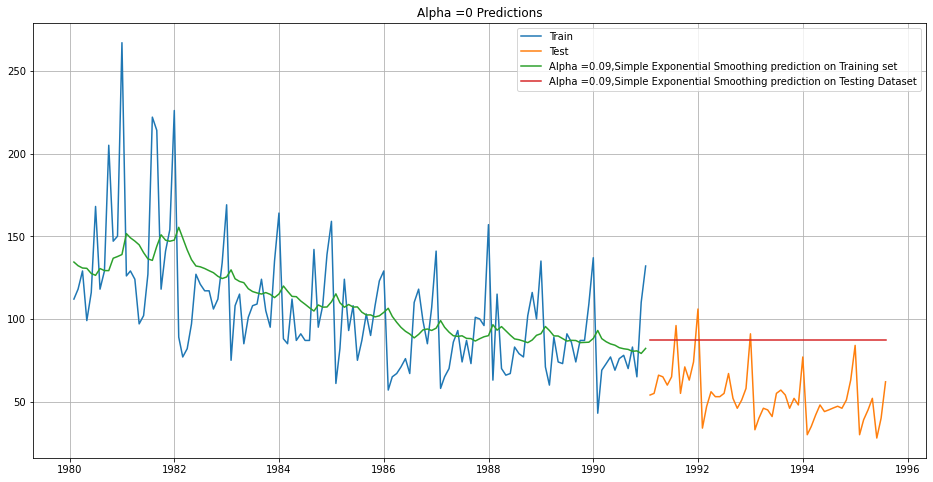

In [102]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train_24['Rose'], label='Train')
plt.plot(SES_test_24['Rose'], label='Test')

plt.plot(SES_train_24['predict'], label='Alpha =0.09,Simple Exponential Smoothing prediction on Training set')
plt.plot(SES_test_24['predict'], label='Alpha =0.09,Simple Exponential Smoothing prediction on Testing Dataset')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0 Predictions')

In [103]:
## Training Data

rmse_model_24_train = metrics.mean_squared_error(SES_train_24['Rose'],SES_train_24['predict'],squared=False)
mape_model_24_train = MAPE(SES_train_24['Rose'],SES_train_24['predict'])
print("For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model_24_train, mape_model_24_train))

For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 31.501 MAPE is 22.73


In [104]:
## Test Data

rmse_model_24_test = metrics.mean_squared_error(SES_test_24['Rose'],SES_test_24['predict'],squared=False)
mape_model_24_test = MAPE(SES_test_24['Rose'],SES_test_24['predict'])
print("For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model_24_test, mape_model_24_test))


For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 36.748 MAPE is 63.75


In [105]:
resultsDf_24 = pd.DataFrame({'Test RMSE': [rmse_model_24_test],'Test MAPE': [mape_model_24_test]}
                           ,index=['Alpha=0.09,SimpleExponentialSmoothing'])

ResultsDf = pd.concat([ResultsDf, resultsDf_24])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime                       51.391890      91.49
NaiveModel                             79.672238     144.91
SimpleAverageModel                     53.413057      94.77
2pointTrailingMovingAverage            11.529994      13.57
4pointTrailingMovingAverage            14.444342      19.46
6pointTrailingMovingAverage            14.554944      20.82
9pointTrailingMovingAverage            14.721499      20.99
Alpha=0.09,SimpleExponentialSmoothing  36.748161      63.75

# 25. Simple Exponential Model with alpha in range of 0.01 to 0.1¶

In [106]:
resultsDf_25_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_25_model

Empty DataFrame
Columns: [Alpha Values, Test RMSE, Test MAPE]
Index: []

In [107]:
SES_train_25 = Train.copy()
SES_test_25 = Test.copy()

In [108]:
model_SES_25 = SimpleExpSmoothing(SES_train_25['Rose'])

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [109]:
for i in np.arange(0.1,1,0.01):
    model_SES_25_alpha_i = model_SES_24.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train_25['predict',i] = model_SES_25_alpha_i.fittedvalues
    SES_test_25['predict',i] = model_SES_25_alpha_i.forecast(steps=len(SES_test_25))
    
    rmse_model_25_train_i = metrics.mean_squared_error(SES_train_25['Rose'],SES_train_25['predict',i],squared=False)
    mape_model_25_train_i = MAPE(SES_train_25['Rose'],SES_train_25['predict',i])
    
    rmse_model_25_test_i = metrics.mean_squared_error(SES_test_25['Rose'],SES_test_25['predict',i],squared=False)
    mape_model_25_test_i = MAPE(SES_test_25['Rose'],SES_test_25['predict',i])
    
    resultsDf_25_model = resultsDf_25_model.append({'Alpha Values':i,'Train RMSE':rmse_model_25_train_i 
                                      ,'Train MAPE': mape_model_25_train_i,'Test RMSE':rmse_model_25_test_i
                                      ,'Test MAPE':mape_model_25_test_i}, ignore_index=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: Run

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: Run

In [110]:
resultsDf_25_model

Alpha Values  Test RMSE  Test MAPE  Train MAPE  Train RMSE
0           0.10  36.779971      63.81       22.71   31.501015
1           0.11  37.068342      64.33       22.63   31.511359
2           0.12  37.409386      64.96       22.54   31.534401
3           0.13  37.794738      65.66       22.48   31.566390
4           0.14  38.218014      66.43       22.43   31.604773
..           ...        ...        ...         ...         ...
85          0.95  78.486124     142.66       24.30   38.112725
86          0.96  78.740320     143.14       24.38   38.243537
87          0.97  78.986129     143.61       24.46   38.376017
88          0.98  79.223454     144.06       24.55   38.510197
89          0.99  79.452192     144.49       24.65   38.646108

[90 rows x 5 columns]

In [111]:
resultsDf_25_model.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Test RMSE  Test MAPE  Train MAPE  Train RMSE
0           0.10  36.779971      63.81       22.71   31.501015
1           0.11  37.068342      64.33       22.63   31.511359
2           0.12  37.409386      64.96       22.54   31.534401
3           0.13  37.794738      65.66       22.48   31.566390
4           0.14  38.218014      66.43       22.43   31.604773
..           ...        ...        ...         ...         ...
85          0.95  78.486124     142.66       24.30   38.112725
86          0.96  78.740320     143.14       24.38   38.243537
87          0.97  78.986129     143.61       24.46   38.376017
88          0.98  79.223454     144.06       24.55   38.510197
89          0.99  79.452192     144.49       24.65   38.646108

[90 rows x 5 columns]

In [112]:
model_SES_25 = SimpleExpSmoothing(SES_train_25['Rose'])
model_SES_25_autofit = model_SES_25.fit(smoothing_level=0.10,optimized=True,use_brute=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [113]:
print(model_SES_25_autofit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  132
Model:             SimpleExpSmoothing   SSE                         130985.437
Optimized:                       True   AIC                            914.805
Trend:                           None   BIC                            920.571
Seasonal:                        None   AICC                           915.120
Seasonal Periods:                None   Date:                 Wed, 09 Sep 2020
Box-Cox:                        False   Time:                         23:54:11
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
initial_level              134.35095                

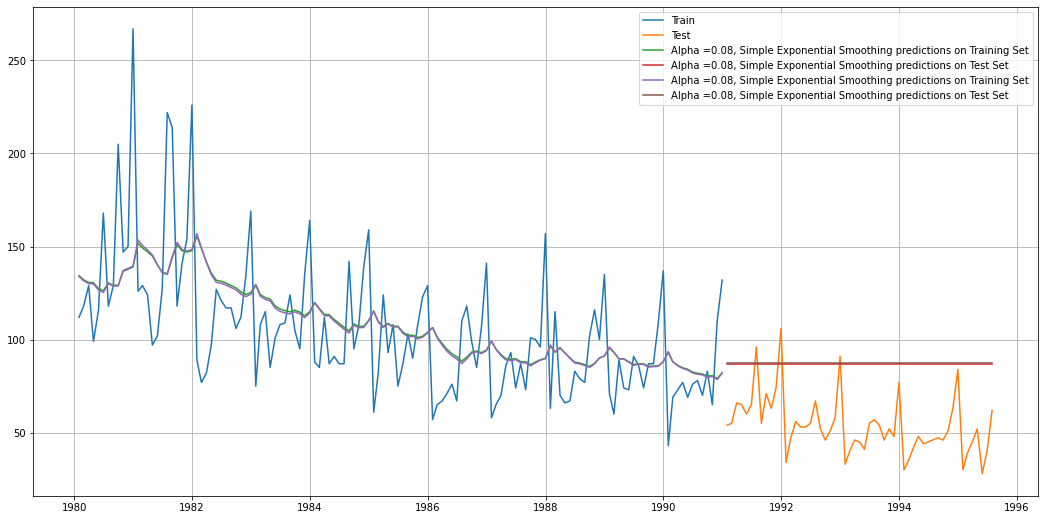

In [114]:
## Plotting on both the Training and Test data for top values of alpha

plt.figure(figsize=(18,9))
plt.plot(SES_train_25['Rose'], label='Train')
plt.plot(SES_test_25['Rose'], label='Test')

plt.plot(SES_train_25['predict',0.10], label='Alpha =0.08, Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_25['predict',0.10], label='Alpha =0.08, Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train_25['predict',0.11], label='Alpha =0.08, Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_25['predict',0.11], label='Alpha =0.08, Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [115]:
resultsDf_25_model = pd.DataFrame({'Test RMSE': [resultsDf_25_model['Test RMSE'][0]],'Test MAPE':[resultsDf_25_model['Test MAPE'][0]]}
                           ,index=['Alpha=0.10,SimpleExponentialSmoothing'])

ResultsDf = pd.concat([ResultsDf, resultsDf_25_model])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime                       51.391890      91.49
NaiveModel                             79.672238     144.91
SimpleAverageModel                     53.413057      94.77
2pointTrailingMovingAverage            11.529994      13.57
4pointTrailingMovingAverage            14.444342      19.46
6pointTrailingMovingAverage            14.554944      20.82
9pointTrailingMovingAverage            14.721499      20.99
Alpha=0.09,SimpleExponentialSmoothing  36.748161      63.75
Alpha=0.10,SimpleExponentialSmoothing  36.779971      63.81

# 26.Double Exponential Smoothing (automated)

In [116]:
DES_train_26 = Train.copy()
DES_test_26 = Test.copy()

In [117]:
model_DES_26 = Holt(DES_train_26['Rose'])

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [118]:
model_DES_26_autofit = model_DES_26.fit(optimized=True,use_brute=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [119]:
model_DES_26_autofit.params_formatted

name       param  optimized
smoothing_level  alpha    0.157895       True
smoothing_slope   beta    0.157895       True
initial_level      l.0  112.000000       True
initial_slope      b.0    6.000000       True

In [120]:
print(model_DES_26_autofit.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                  132
Model:                           Holt   SSE                         144398.434
Optimized:                       True   AIC                            931.674
Trend:                       Additive   BIC                            943.205
Seasonal:                        None   AICC                           932.346
Seasonal Periods:                None   Date:                 Wed, 09 Sep 2020
Box-Cox:                        False   Time:                         23:54:18
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1578947                alpha                 True
smoothing_slope            0.1578947                

In [121]:
# predictions on training data
DES_train_26['predict',0.157,0.157] = model_DES_26_autofit.fittedvalues
DES_train_26.head()

Rose  (predict, 0.157, 0.157)
Time_Stamp                                
1980-01-31  112.0               118.000000
1980-02-29  118.0               122.903047
1980-03-31  129.0               127.857061
1980-04-30   99.0               133.794198
1980-05-31  116.0               133.189605

In [122]:
DES_test_26['predict',0.157,0.157] = model_DES_26_autofit.forecast(steps=len(DES_test_26))
DES_test_26.head()

Rose  (predict, 0.157, 0.157)
Time_Stamp                               
1991-01-31  54.0                86.863579
1991-02-28  55.0                88.028056
1991-03-31  66.0                89.192534
1991-04-30  65.0                90.357011
1991-05-31  60.0                91.521488

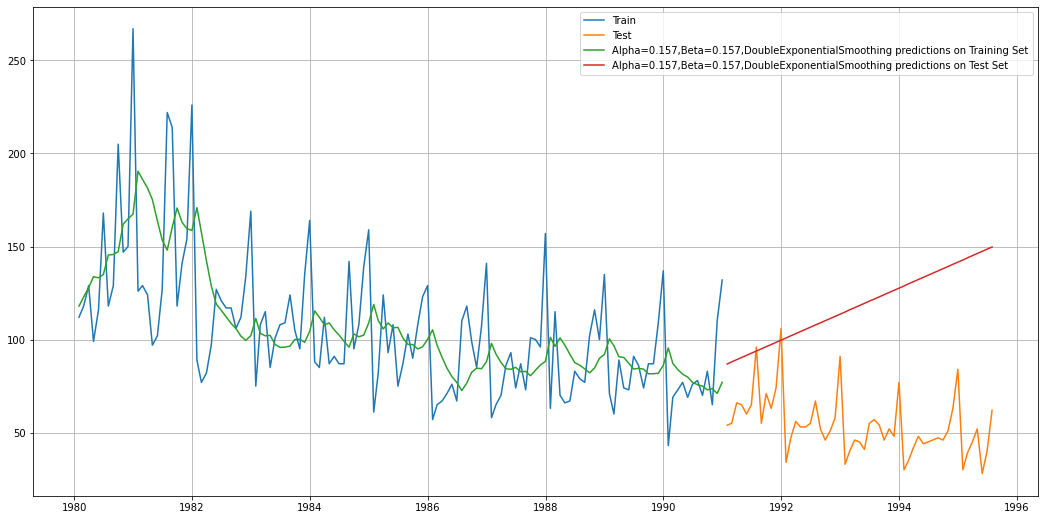

In [123]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_26['Rose'], label='Train')
plt.plot(DES_test_26['Rose'], label='Test')

plt.plot(DES_train_26['predict', 0.157, 0.157], label='Alpha=0.157,Beta=0.157,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test_26['predict', 0.157, 0.157], label='Alpha=0.157,Beta=0.157,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [124]:
## Training Data

rmse_model_26_train = metrics.mean_squared_error(DES_train_26['Rose'],DES_train_26['predict',0.157,0.157],squared=False)
mape_model_26_train = MAPE(DES_train_26['Rose'],DES_train_26['predict',0.157,0.157])
print("For Alpha=0.157 and Beta=0.157 Double Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model_26_train, mape_model_26_train))

For Alpha=0.157 and Beta=0.157 Double Exponential Smoothing Model forecast on the Training Data,  RMSE is 33.075 MAPE is 23.99


In [125]:
## Test Data

rmse_model_26_test = metrics.mean_squared_error(DES_test_26['Rose'],DES_test_26['predict',0.157,0.157],squared=False)
mape_model_26_test = MAPE(DES_test_26['Rose'],DES_test_26['predict',0.157,0.157])
print("For Alpha=0.64 and Beta=0 Double Exponential Smoothing Model forecast on the Testing Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model_26_test, mape_model_26_test))

For Alpha=0.64 and Beta=0 Double Exponential Smoothing Model forecast on the Testing Data,  RMSE is 70.517 MAPE is 120.07


In [126]:
resultsDf_26 = pd.DataFrame({'Test RMSE': [rmse_model_26_test],'Test MAPE': [mape_model_26_test]}
                           ,index=['Alpha=0.157 and Beta=0.157,DoubleExponentialSmoothing'])

ResultsDf = pd.concat([ResultsDf, resultsDf_26])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    51.391890      91.49
NaiveModel                                          79.672238     144.91
SimpleAverageModel                                  53.413057      94.77
2pointTrailingMovingAverage                         11.529994      13.57
4pointTrailingMovingAverage                         14.444342      19.46
6pointTrailingMovingAverage                         14.554944      20.82
9pointTrailingMovingAverage                         14.721499      20.99
Alpha=0.09,SimpleExponentialSmoothing               36.748161      63.75
Alpha=0.10,SimpleExponentialSmoothing               36.779971      63.81
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...  70.517103     120.07

# 27.Double Exponential Smoothing Model in range 0.01 to 1

In [127]:
DES_train_27 = Train.copy()
DES_test_27 = Test.copy()

In [128]:
model_DES_27 = Holt(DES_train_27['Rose'])

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [129]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_27 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_27

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [130]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_27_alpha_i_beta_j = model_DES_27.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train_27['predict',i,j] = model_DES_27_alpha_i_beta_j.fittedvalues
        DES_test_27['predict',i,j] = model_DES_27_alpha_i_beta_j.forecast(steps=len(DES_test_27))
        
        rmse_model_27_train = metrics.mean_squared_error(DES_train_27['Rose'],DES_train_27['predict',i,j],squared=False)
        mape_model_27_train = MAPE(DES_train_27['Rose'],DES_train_27['predict',i,j])
        
        rmse_model_27_test = metrics.mean_squared_error(DES_test_27['Rose'],DES_test_27['predict',i,j],squared=False)
        mape_model_27_test = MAPE(DES_test_27['Rose'],DES_test_27['predict',i,j])
        
        resultsDf_27 = resultsDf_27.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model_27_train
                                      ,'Train MAPE': mape_model_27_train,'Test RMSE':rmse_model_27_test
                                      ,'Test MAPE':mape_model_27_test}, ignore_index=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: Run

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: Run

In [131]:
resultsDf_27

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0            0.3          0.3   35.928003       25.51  265.509912     442.06
1            0.3          0.4   37.393239       26.53  358.693008     593.36
2            0.3          0.5   38.888325       27.54  451.752171     744.55
3            0.3          0.6   40.280670       28.63  536.896028     883.12
4            0.3          0.7   41.403518       29.56  601.558209     988.70
..           ...          ...         ...         ...         ...        ...
59           1.0          0.6   51.828562       34.61  801.622225    1322.71
60           1.0          0.7   54.493671       36.36  841.834548    1387.68
61           1.0          0.8   57.362069       38.19  853.907502    1407.18
62           1.0          0.9   60.470112       40.12  834.652915    1376.08
63           1.0          1.0   63.869184       42.41  780.021606    1287.81

[64 rows x 6 columns]

In [132]:
resultsDf_27.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Beta Values  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0            0.3          0.3   35.928003       25.51   265.509912     442.06
8            0.4          0.3   36.733732       25.57   339.248849     564.89
1            0.3          0.4   37.393239       26.53   358.693008     593.36
16           0.5          0.3   37.424080       25.45   394.214956     656.56
24           0.6          0.3   38.343309       25.58   439.238366     731.62
..           ...          ...         ...         ...          ...        ...
46           0.8          0.9   51.756649       34.67  1052.406630    1727.36
38           0.7          0.9   48.539838       32.29  1061.789751    1741.20
47           0.8          1.0   53.844112       36.19  1095.054109    1796.51
31           0.6          1.0   47.190957       31.86  1102.027591    1804.60
39           0.7          1.0   50.266943       33.34  1125.128514    1843.82

[64 rows x 6 columns]

In [133]:
model_DES_27 = Holt(DES_train_27['Rose'])
model_DES_27_autofit = model_DES_27.fit(smoothing_level=0.3,smoothing_slope=0.3,optimized=True,use_brute=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [134]:
print(model_DES_27_autofit.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                  132
Model:                           Holt   SSE                         170388.426
Optimized:                       True   AIC                            953.520
Trend:                       Additive   BIC                            965.052
Seasonal:                        None   AICC                           954.192
Seasonal Periods:                None   Date:                 Wed, 09 Sep 2020
Box-Cox:                        False   Time:                         23:54:29
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
smoothing_slope            0.3000000                

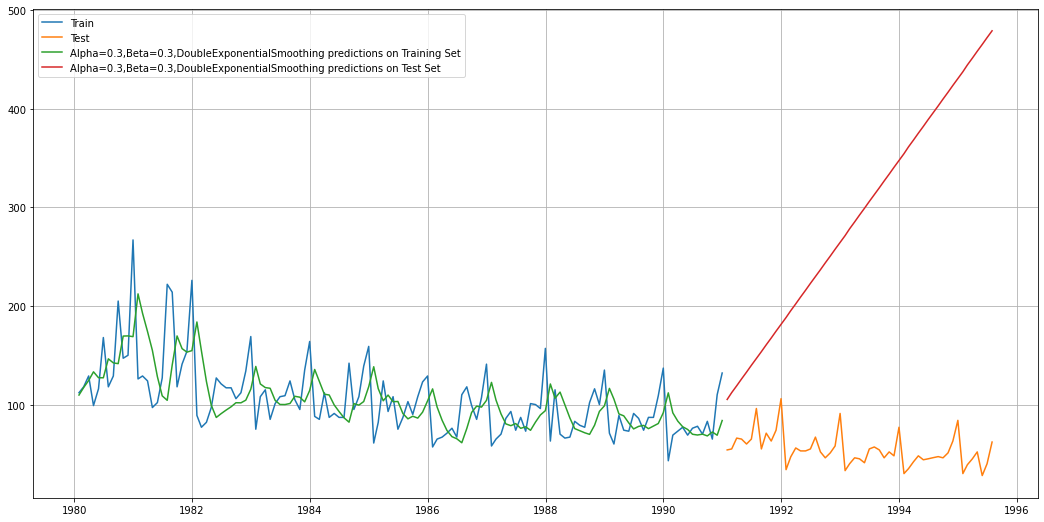

In [135]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_27['Rose'], label='Train')
plt.plot(DES_test_27['Rose'], label='Test')

plt.plot(DES_train_27['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test_27['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [136]:
resultsDf_27 = pd.DataFrame({'Test RMSE': [resultsDf_27['Test RMSE'][0]],'Test MAPE':[resultsDf_27['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

ResultsDf = pd.concat([ResultsDf, resultsDf_27])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     51.391890      91.49
NaiveModel                                           79.672238     144.91
SimpleAverageModel                                   53.413057      94.77
2pointTrailingMovingAverage                          11.529994      13.57
4pointTrailingMovingAverage                          14.444342      19.46
6pointTrailingMovingAverage                          14.554944      20.82
9pointTrailingMovingAverage                          14.721499      20.99
Alpha=0.09,SimpleExponentialSmoothing                36.748161      63.75
Alpha=0.10,SimpleExponentialSmoothing                36.779971      63.81
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...   70.517103     120.07
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912     442.06

# 28.Triple Exponential Smoothing (automated)

In [137]:
TES_train_28 = Train.copy()
TES_test_28 = Test.copy()

In [138]:
model_TES_28 = ExponentialSmoothing(TES_train_28['Rose'], freq='M', trend='mul',seasonal='mul')

In [139]:
model_TES_28_autofit = model_TES_28.fit(optimized=True,use_brute=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [140]:
model_TES_28_autofit.params

{'smoothing_level': 0.07003864699214594,
 'smoothing_slope': 3.222242031020503e-35,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65376980152242,
 'initial_slope': 0.9939191679654138,
 'initial_seasons': array([1.45203876, 1.64325008, 1.79769213, 1.57421452, 1.76819962,
        1.90867072, 2.10003269, 2.24347152, 2.11178811, 2.07129179,
        2.41313537, 3.30749757]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [141]:
print(model_TES_28_autofit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                          43863.963
Optimized:                         True   AIC                            798.398
Trend:                   Multiplicative   BIC                            844.523
Seasonal:                Multiplicative   AICC                           804.451
Seasonal Periods:                    12   Date:                 Wed, 09 Sep 2020
Box-Cox:                          False   Time:                         23:54:36
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0700386                alpha                 True
smoothing_slope          

In [142]:
## Prediction on the training data

TES_train_28['auto_predict'] = model_TES_28_autofit.fittedvalues
TES_train_28.head()

Rose  auto_predict
Time_Stamp                     
1980-01-31  112.0    110.627422
1980-02-29  118.0    124.542203
1980-03-31  129.0    134.920671
1980-04-30   99.0    117.068837
1980-05-31  116.0    129.282416

In [143]:
## Prediction on the test data

TES_test_28['auto_predict'] = model_TES_28_autofit.forecast(steps=len(TES_test_28))
TES_test_28.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     54.060085
1991-02-28  55.0     60.806953
1991-03-31  66.0     66.117429
1991-04-30  65.0     57.546064
1991-05-31  60.0     64.244221

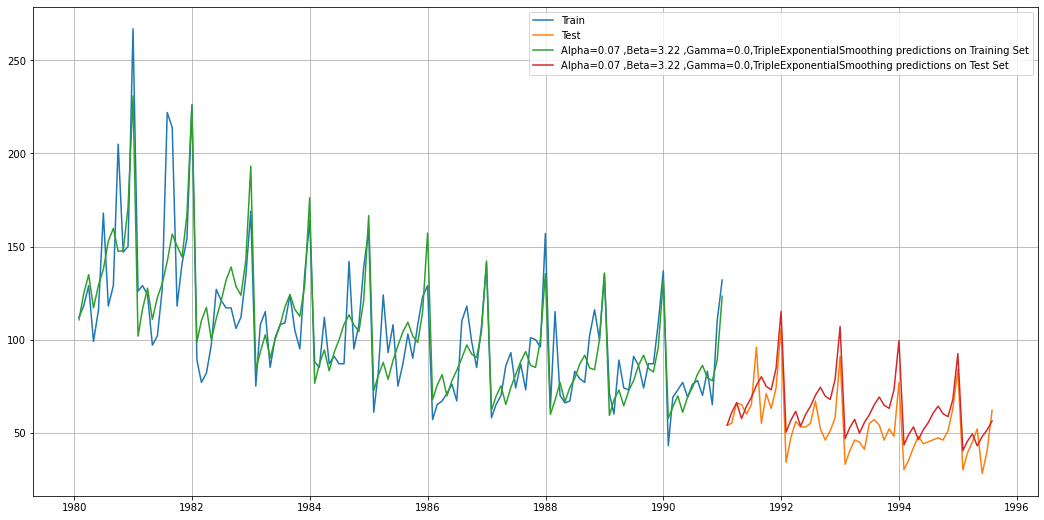

In [144]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_28['Rose'], label='Train')
plt.plot(TES_test_28['Rose'], label='Test')

plt.plot(TES_train_28['auto_predict'], label='Alpha=0.07 ,Beta=3.22 ,Gamma=0.0,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test_28['auto_predict'], label='Alpha=0.07 ,Beta=3.22 ,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [145]:
## Training Data

rmse_model_28_train = metrics.mean_squared_error(TES_train_28['Rose'],TES_train_28['auto_predict'],squared=False)
mape_model_28_train = MAPE(TES_train_28['Rose'],TES_train_28['auto_predict'])
print("For Alpha: 0.07, Beta: 3.22 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model_28_train, mape_model_28_train))

For Alpha: 0.07, Beta: 3.22 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 18.229 MAPE is 12.61


In [146]:
## Test Data

rmse_model_28_test = metrics.mean_squared_error(TES_test_28['Rose'],TES_test_28['auto_predict'],squared=False)
mape_model_28_test = MAPE(TES_test_28['Rose'],TES_test_28['auto_predict'])
print("For Alpha: 0.07, Beta: 3.22 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model_28_test, mape_model_28_test))

For Alpha: 0.07, Beta: 3.22 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 12.766 MAPE is 20.37


In [147]:
resultsDf_28 = pd.DataFrame({'Test RMSE': [rmse_model_28_test],'Test MAPE':[mape_model_28_test]}
                           ,index=['Alpha=0.07, Beta=3.22 ,Gamma=0.0,TripleExponentialSmoothing'])

ResultsDf = pd.concat([ResultsDf, resultsDf_28])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     51.391890      91.49
NaiveModel                                           79.672238     144.91
SimpleAverageModel                                   53.413057      94.77
2pointTrailingMovingAverage                          11.529994      13.57
4pointTrailingMovingAverage                          14.444342      19.46
6pointTrailingMovingAverage                          14.554944      20.82
9pointTrailingMovingAverage                          14.721499      20.99
Alpha=0.09,SimpleExponentialSmoothing                36.748161      63.75
Alpha=0.10,SimpleExponentialSmoothing                36.779971      63.81
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...   70.517103     120.07
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912     442.06
Alpha=0.07, Beta=3.22 ,Gamma=0.0,TripleExponent...   12.765786      20.37

# 29.Triple Exponential Smoothing in range 0.3 to 1.1

In [148]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_29 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_29

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [149]:
TES_train_29 = Train.copy()
TES_test_29 = Test.copy()

In [150]:
model_TES_29 = ExponentialSmoothing(TES_train_29['Rose'], freq='M', trend='mul',seasonal='mul')

In [151]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_29_alpha_i_beta_j_gamma_k = model_TES_28.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train_29['predict',i,j,k] = model_TES_29_alpha_i_beta_j_gamma_k.fittedvalues
            TES_test_29['predict',i,j,k] = model_TES_29_alpha_i_beta_j_gamma_k.forecast(steps=len(TES_test_29))
        
            rmse_model_29_train = metrics.mean_squared_error(TES_train_29['Rose'],TES_train_29['predict',i,j,k],squared=False)
            mape_model_29_train = MAPE(TES_train_29['Rose'],TES_train_29['predict',i,j,k])
        
            rmse_model_29_test = metrics.mean_squared_error(TES_test_29['Rose'],TES_test_29['predict',i,j,k],squared=False)
            mape_model_29_test = MAPE(TES_test_29['Rose'],TES_test_29['predict',i,j,k])
        
            resultsDf_29 = resultsDf_29.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model_29_train
                                      ,'Train MAPE': mape_model_29_train,'Test RMSE':rmse_model_29_test
                                      ,'Test MAPE':mape_model_29_test}, ignore_index=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holt

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarni

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [152]:
resultsDf_29

Alpha Values  Beta Values  Gamma Values    Train RMSE    Train MAPE  \
0             0.3          0.3           0.3  2.321497e+01  1.660000e+01   
1             0.3          0.3           0.4  2.450411e+01  1.717000e+01   
2             0.3          0.3           0.5  2.618245e+01  1.801000e+01   
3             0.3          0.3           0.6  2.822341e+01  1.904000e+01   
4             0.3          0.3           0.7  3.209857e+01  2.034000e+01   
..            ...          ...           ...           ...           ...   
362           0.8          0.8           0.5  9.526715e+01  5.092000e+01   
363           0.8          0.8           0.6  2.782496e+04  3.997090e+03   
364           0.8          0.8           0.7  8.318210e+03  1.815110e+03   
365           0.8          0.8           0.8  7.785265e+08  8.497515e+07   
366           0.8          0.8           0.9  7.838918e+12  9.989801e+11   

        Test RMSE     Test MAPE  
0    2.739327e+01  4.541000e+01  
1    1.434856e+01  2.166000e+01  
2    1.231356e+01  1.760000e+01  
3    2.540678e+01  4.142000e+01  
4    3.452745e+01  5.908000e+01  
..            ...           ...  
362  6.137262e+32  2.381939e+32  
363  8.300732e+01  1.120400e+02  
364  8.970695e+01  1.166700e+02  
365  9.455841e+04  2.555468e+04  
366  3.098375e+04  1.060670e+04  

[367 rows x 7 columns]

In [153]:
resultsDf_29.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Beta Values  Gamma Values    Train RMSE    Train MAPE  \
9             0.3          0.4           0.4  2.986148e+01  1.803000e+01   
2             0.3          0.3           0.5  2.618245e+01  1.801000e+01   
67            0.4          0.3           0.6  3.176576e+01  1.851000e+01   
68            0.4          0.3           0.7  3.281508e+01  1.913000e+01   
131           0.5          0.3           0.6  3.453192e+01  1.966000e+01   
..            ...          ...           ...           ...           ...   
316           0.7          1.0           0.7  5.439753e+11  4.598667e+10   
182           0.5          0.9           0.9  2.548358e+04  4.474220e+03   
189           0.5          1.0           0.8  1.447972e+06  1.489229e+05   
311           0.7          0.9           1.0  5.151389e+27  4.348362e+26   
190           0.5          1.0           0.9  1.976681e+04  3.430140e+03   

         Test RMSE      Test MAPE  
9     1.035471e+01   1.399000e+01  
2     1.231356e+01   1.760000e+01  
67    1.330250e+01   1.938000e+01  
68    1.425078e+01   2.121000e+01  
131   1.431456e+01   1.862000e+01  
..             ...            ...  
316   9.042248e+99   2.272517e+99  
182  1.051380e+120  2.642907e+119  
189  9.060349e+136  2.270291e+136  
311            inf  4.892891e+199  
190            inf  8.853891e+153  

[367 rows x 7 columns]

In [154]:
model_TES_29_autofit = model_TES_29.fit(smoothing_level=0.3,smoothing_slope=0.4,smoothing_seasonal=0.4,optimized=True,use_brute=True)

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [155]:
print(model_TES_29_autofit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                         117705.494
Optimized:                         True   AIC                            928.694
Trend:                   Multiplicative   BIC                            974.819
Seasonal:                Multiplicative   AICC                           934.747
Seasonal Periods:                    12   Date:                 Wed, 09 Sep 2020
Box-Cox:                          False   Time:                         23:55:08
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3000000                alpha                False
smoothing_slope          

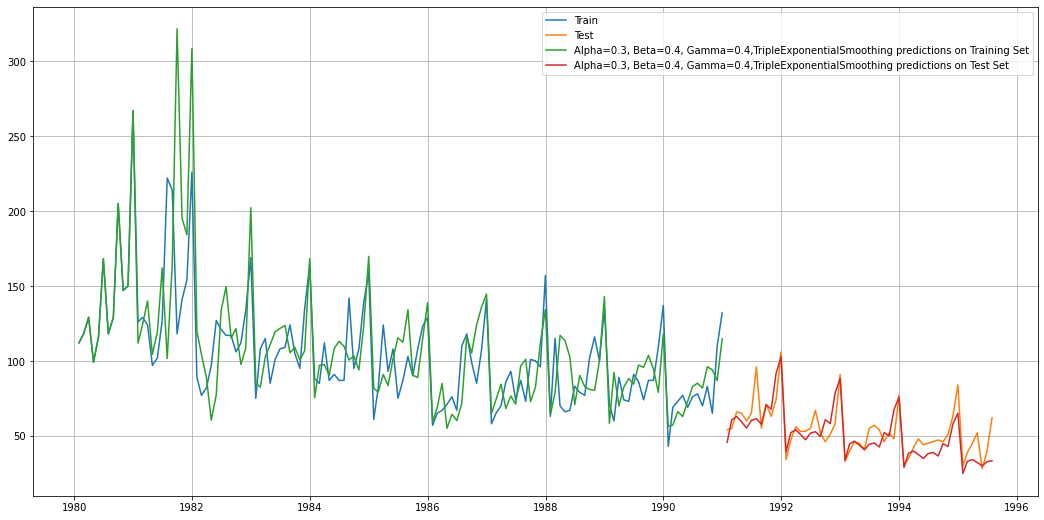

In [156]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_29['Rose'], label='Train')
plt.plot(TES_test_29['Rose'], label='Test')

plt.plot(TES_train_29['predict', 0.3, 0.4, 0.4], label='Alpha=0.3, Beta=0.4, Gamma=0.4,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test_29['predict', 0.3, 0.4, 0.4], label='Alpha=0.3, Beta=0.4, Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [157]:
resultsDf_29 = pd.DataFrame({'Test RMSE': [resultsDf_29['Test RMSE'][9]],'Test MAPE':[resultsDf_29['Test MAPE'][9]]}
                           ,index=['Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentialSmoothing'])

ResultsDf = pd.concat([ResultsDf, resultsDf_29])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     51.391890      91.49
NaiveModel                                           79.672238     144.91
SimpleAverageModel                                   53.413057      94.77
2pointTrailingMovingAverage                          11.529994      13.57
4pointTrailingMovingAverage                          14.444342      19.46
6pointTrailingMovingAverage                          14.554944      20.82
9pointTrailingMovingAverage                          14.721499      20.99
Alpha=0.09,SimpleExponentialSmoothing                36.748161      63.75
Alpha=0.10,SimpleExponentialSmoothing                36.779971      63.81
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...   70.517103     120.07
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912     442.06
Alpha=0.07, Beta=3.22 ,Gamma=0.0,TripleExponent...   12.765786      20.37
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   10.354713      13.99

# 30. Automated ARIMA based on AIC criteria

In [158]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [159]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [160]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(Train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.154672912435
ARIMA(0, 1, 1) - AIC:1282.3098319748287
ARIMA(0, 1, 2) - AIC:1279.671528853577
ARIMA(0, 1, 3) - AIC:1280.5453761734661
ARIMA(1, 1, 0) - AIC:1317.350310538145
ARIMA(1, 1, 1) - AIC:1280.5742295380066
ARIMA(1, 1, 2) - AIC:1279.8707234231913
ARIMA(1, 1, 3) - AIC:1281.8707223309932
ARIMA(2, 1, 0) - AIC:1298.6110341604938
ARIMA(2, 1, 1) - AIC:1281.5078621868606
ARIMA(2, 1, 2) - AIC:1281.8707222264325


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:1274.6953688803303
ARIMA(3, 1, 0) - AIC:1297.4810917271702
ARIMA(3, 1, 1) - AIC:1282.419277627188
ARIMA(3, 1, 2) - AIC:1283.7207405977126
ARIMA(3, 1, 3) - AIC:1278.656995326828


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [161]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
11  (2, 1, 3)  1274.695369
15  (3, 1, 3)  1278.656995
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376
5   (1, 1, 1)  1280.574230
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
7   (1, 1, 3)  1281.870722
1   (0, 1, 1)  1282.309832
13  (3, 1, 1)  1282.419278
14  (3, 1, 2)  1283.720741
12  (3, 1, 0)  1297.481092
8   (2, 1, 0)  1298.611034
4   (1, 1, 0)  1317.350311
0   (0, 1, 0)  1333.154673

In [162]:
mod_30 = ARIMA(Train['Rose'], order=(2,1,3))

results_Arima_30 = mod_30.fit()

print(results_Arima_30.summary())

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Wed, 09 Sep 2020   AIC                           1274.695
Time:                        23:55:16   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -19.992      0.000      -1.843      -1.514
ar.L2         -0.7289      0.084     -8.683      0.000      -0.893      -0.564
ma.L1          1.0446      0.627      1.666      0.0

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


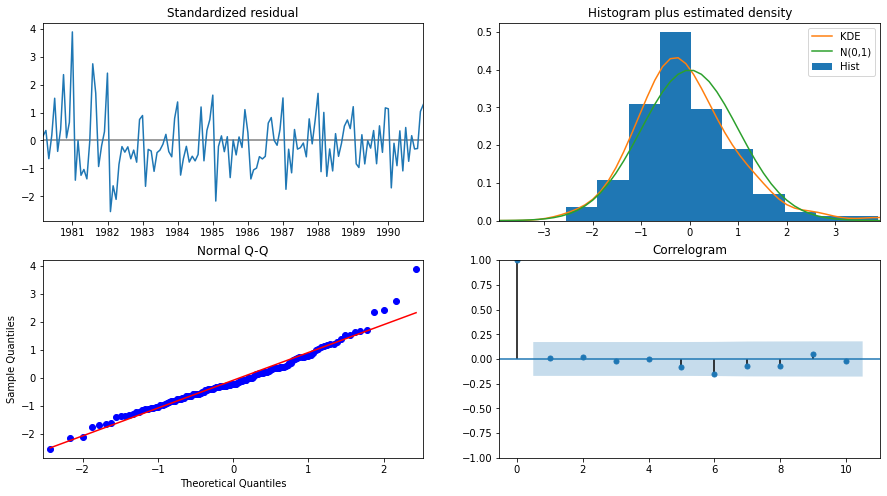

In [163]:
results_Arima_30.plot_diagnostics();

In [164]:
predicted_autoARIMA_30 = results_Arima_30.forecast(steps=len(Test))
predicted_autoARIMA_30

1991-01-31    85.604949
1991-02-28    90.532577
1991-03-31    81.968096
1991-04-30    92.748190
1991-05-31    80.900940
1991-06-30    92.924062
1991-07-31    81.383625
1991-08-31    91.985905
1991-09-30    82.606092
1991-10-31    90.618327
1991-11-30    84.009951
1991-12-31    89.259352
1992-01-31    85.267166
1992-02-29    88.140183
1992-03-31    86.228856
1992-04-30    87.342134
1992-05-31    86.867085
1992-06-30    86.852818
1992-07-31    87.223004
1992-08-31    86.612212
1992-09-30    87.367339
1992-10-31    86.545378
1992-11-30    87.374289
1992-12-31    86.582428
1993-01-31    87.307052
1993-02-28    86.668251
1993-03-31    87.212043
1993-04-30    86.765128
1993-05-31    87.118726
1993-06-30    86.851109
1993-07-31    87.042461
1993-08-31    86.916418
1993-09-30    86.988456
1993-10-31    86.959440
1993-11-30    86.955625
1993-12-31    86.983175
1994-01-31    86.939724
1994-02-28    86.992557
1994-03-31    86.935571
1994-04-30    86.992689
1994-05-31    86.938377
1994-06-30    86

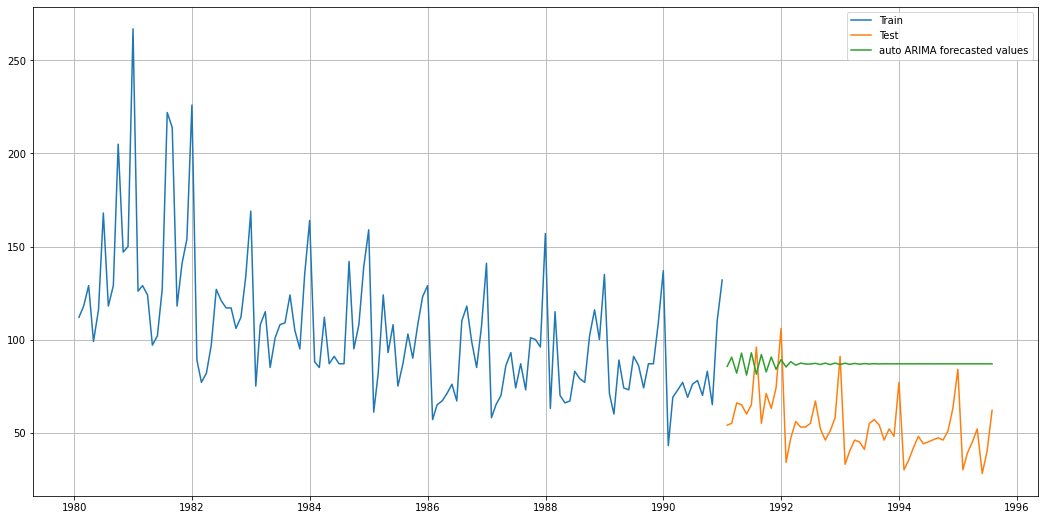

In [165]:
plt.figure(figsize=(18,9))
plt.plot(Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')

plt.plot(predicted_autoARIMA_30, label='auto ARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [166]:
from sklearn.metrics import mean_squared_error

RMSE_autoARIMA_30 = mean_squared_error(Test['Rose'],predicted_autoARIMA_30,squared=False)
MAPE_autoARIMA_30 = MAPE(Test['Rose'],predicted_autoARIMA_30)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA_30,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA_30)

RMSE for the autofit ARIMA model: 36.76553637048021 
MAPE for the autofit ARIMA model: 63.76


In [167]:
resultsDf_30 = pd.DataFrame({'Test RMSE': [RMSE_autoARIMA_30],'Test MAPE':[MAPE_autoARIMA_30]}
                           ,index=['automated ARIMA(2,1,3)'])

ResultsDf = pd.concat([ResultsDf, resultsDf_30])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     51.391890      91.49
NaiveModel                                           79.672238     144.91
SimpleAverageModel                                   53.413057      94.77
2pointTrailingMovingAverage                          11.529994      13.57
4pointTrailingMovingAverage                          14.444342      19.46
6pointTrailingMovingAverage                          14.554944      20.82
9pointTrailingMovingAverage                          14.721499      20.99
Alpha=0.09,SimpleExponentialSmoothing                36.748161      63.75
Alpha=0.10,SimpleExponentialSmoothing                36.779971      63.81
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...   70.517103     120.07
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912     442.06
Alpha=0.07, Beta=3.22 ,Gamma=0.0,TripleExponent...   12.765786      20.37
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   10.354713      13.99
automated ARIMA(2,1,3)                               36.765536      63.76

# 31.Automated SARIMA model with seasonality 12

In [21]:
import itertools
p = q = range(0, 4)
d= range(1,3)
D = range(0,3)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 2, 0)(0, 1, 0, 12)
Model: (0, 2, 1)(0, 1, 1, 12)
Model: (0, 2, 2)(0, 1, 2, 12)
Model: (0, 2, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(0, 2, 0, 12)
Model: (1, 1, 1)(0, 2, 1, 12)
Model: (1, 1, 2)(0, 2, 2, 12)
Model: (1, 1, 3)(0, 2, 3, 12)
Model: (1, 2, 0)(1, 0, 0, 12)
Model: (1, 2, 1)(1, 0, 1, 12)
Model: (1, 2, 2)(1, 0, 2, 12)
Model: (1, 2, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(1, 1, 0, 12)
Model: (2, 1, 1)(1, 1, 1, 12)
Model: (2, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 3)(1, 1, 3, 12)
Model: (2, 2, 0)(1, 2, 0, 12)
Model: (2, 2, 1)(1, 2, 1, 12)
Model: (2, 2, 2)(1, 2, 2, 12)
Model: (2, 2, 3)(1, 2, 3, 12)
Model: (3, 1, 0)(2, 0, 0, 12)
Model: (3, 1, 1)(2, 0, 1, 12)
Model: (3, 1, 2)(2, 0, 2, 12)
Model: (3, 1, 3)(2, 0, 3, 12)
Model: (3, 2, 0)(2, 1, 0, 12)
Model: (3, 2, 1)(2, 1, 1, 12)
Model: (3, 2, 2)(2, 1, 2, 12)
Model: (3, 2, 3)(2, 1, 3, 12)


In [22]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [23]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_31 = sm.tsa.statespace.SARIMAX(Train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_31 = SARIMA_model_31.fit(maxiter=10000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_31.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_31.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207355
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.437529638089


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(0, 0, 3, 12)7 - AIC:4454.380078670691
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301625903
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776131
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3395.280073861382
SARIMA(0, 1, 0)x(0, 2, 0, 12)7 - AIC:1150.4118075819958
SARIMA(0, 1, 0)x(0, 2, 1, 12)7 - AIC:902.2733434623453
SARIMA(0, 1, 0)x(0, 2, 2, 12)7 - AIC:776.444536723629


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


SARIMA(0, 1, 0)x(0, 2, 3, 12)7 - AIC:666.2556753656659
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869386352
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635753215
SARIMA(0, 1, 0)x(1, 0, 3, 12)7 - AIC:4014.2642349479393
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658811
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601606
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654682


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:3347.0743999727474
SARIMA(0, 1, 0)x(1, 2, 0, 12)7 - AIC:937.3029077938367
SARIMA(0, 1, 0)x(1, 2, 1, 12)7 - AIC:891.0317789294959
SARIMA(0, 1, 0)x(1, 2, 2, 12)7 - AIC:779.3865527624125
SARIMA(0, 1, 0)x(1, 2, 3, 12)7 - AIC:665.159236348788
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794540697528
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945786
SARIMA(0, 1, 0)x(2, 0, 3, 12)7 - AIC:3644.56979197426
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374415
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729145532
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244225166
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:3251.5015456539145


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 2, 0, 12)7 - AIC:795.0857518465789
SARIMA(0, 1, 0)x(2, 2, 1, 12)7 - AIC:784.5904772451203
SARIMA(0, 1, 0)x(2, 2, 2, 12)7 - AIC:774.4373381390827
SARIMA(0, 1, 0)x(2, 2, 3, 12)7 - AIC:666.3151049620702
SARIMA(0, 1, 0)x(3, 0, 0, 12)7 - AIC:850.7535403931087
SARIMA(0, 1, 0)x(3, 0, 1, 12)7 - AIC:851.7482702757769
SARIMA(0, 1, 0)x(3, 0, 2, 12)7 - AIC:850.5304136127767
SARIMA(0, 1, 0)x(3, 0, 3, 12)7 - AIC:3610.0665866971162
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:752.395812273977
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:748.3165246489875
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:748.9721713374524
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:3265.732140095761
SARIMA(0, 1, 0)x(3, 2, 0, 12)7 - AIC:682.9516768762778
SARIMA(0, 1, 0)x(3, 2, 1, 12)7 - AIC:673.3751961770249
SARIMA(0, 1, 0)x(3, 2, 2, 12)7 - AIC:674.5295773156297
SARIMA(0, 1, 0)x(3, 2, 3, 12)7 - AIC:667.2563757816104
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1098.5554825918334
SARIMA(0

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(0, 0, 3, 12)7 - AIC:3886.42767693431
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133560825
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606717821
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:790.9032809266249
SARIMA(0, 1, 1)x(0, 1, 3, 12)7 - AIC:3223.7953947782457


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(0, 2, 0, 12)7 - AIC:1104.7532493751094
SARIMA(0, 1, 1)x(0, 2, 1, 12)7 - AIC:843.6939090284769
SARIMA(0, 1, 1)x(0, 2, 2, 12)7 - AIC:724.5540817191693
SARIMA(0, 1, 1)x(0, 2, 3, 12)7 - AIC:630.3711767275486
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1095.793632491873
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.743433094709
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:918.8573483294855


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 0, 3, 12)7 - AIC:3870.088419336227
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:944.2456655531806
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:929.3362488520087
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:792.7161670347028


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 1, 3, 12)7 - AIC:3661.50471112227
SARIMA(0, 1, 1)x(1, 2, 0, 12)7 - AIC:894.8922101600639
SARIMA(0, 1, 1)x(1, 2, 1, 12)7 - AIC:849.1904526332881
SARIMA(0, 1, 1)x(1, 2, 2, 12)7 - AIC:726.5215920472085
SARIMA(0, 1, 1)x(1, 2, 3, 12)7 - AIC:627.0765524150637
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:914.5982866535943
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:915.3332430461658
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:901.19882703279
SARIMA(0, 1, 1)x(2, 0, 3, 12)7 - AIC:7270.617423372929
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:810.3194350158642
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:804.1555753621416
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:782.1538715324325


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 1, 3, 12)7 - AIC:2585.1550587337174
SARIMA(0, 1, 1)x(2, 2, 0, 12)7 - AIC:756.768773718769
SARIMA(0, 1, 1)x(2, 2, 1, 12)7 - AIC:741.9102200130131
SARIMA(0, 1, 1)x(2, 2, 2, 12)7 - AIC:728.4037917932158
SARIMA(0, 1, 1)x(2, 2, 3, 12)7 - AIC:622.5940955279393
SARIMA(0, 1, 1)x(3, 0, 0, 12)7 - AIC:798.5889764797863
SARIMA(0, 1, 1)x(3, 0, 1, 12)7 - AIC:800.4844932481795
SARIMA(0, 1, 1)x(3, 0, 2, 12)7 - AIC:801.0595269338083


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(3, 0, 3, 12)7 - AIC:3297.6886335693566
SARIMA(0, 1, 1)x(3, 1, 0, 12)7 - AIC:708.0834240720645
SARIMA(0, 1, 1)x(3, 1, 1, 12)7 - AIC:699.7496879236592
SARIMA(0, 1, 1)x(3, 1, 2, 12)7 - AIC:702.5510640667527
SARIMA(0, 1, 1)x(3, 1, 3, 12)7 - AIC:5877.8344897115085
SARIMA(0, 1, 1)x(3, 2, 0, 12)7 - AIC:647.4474539520212
SARIMA(0, 1, 1)x(3, 2, 1, 12)7 - AIC:637.4628101854815
SARIMA(0, 1, 1)x(3, 2, 2, 12)7 - AIC:639.2407603666836
SARIMA(0, 1, 1)x(3, 2, 3, 12)7 - AIC:625.2661299754947
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:1251.667543054105
SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:1083.4866975264974
SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:913.4938486617701


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(0, 0, 3, 12)7 - AIC:2810.2359258122433
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:1098.6598024298096
SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:904.5003488475488
SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:784.014095570375
SARIMA(0, 1, 2)x(0, 1, 3, 12)7 - AIC:2994.385759748
SARIMA(0, 1, 2)x(0, 2, 0, 12)7 - AIC:1085.3080283807715
SARIMA(0, 1, 2)x(0, 2, 1, 12)7 - AIC:836.9525650557682
SARIMA(0, 1, 2)x(0, 2, 2, 12)7 - AIC:718.350980440813
SARIMA(0, 1, 2)x(0, 2, 3, 12)7 - AIC:622.207480035937
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:1088.8332843413823
SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:1045.5400933591936
SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:904.8310913635171


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(1, 0, 3, 12)7 - AIC:2743.949680019941
SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:941.5256923362624
SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:915.273113409055
SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8237144293659


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(1, 1, 3, 12)7 - AIC:5265.790007228828
SARIMA(0, 1, 2)x(1, 2, 0, 12)7 - AIC:894.4535826071988
SARIMA(0, 1, 2)x(1, 2, 1, 12)7 - AIC:833.8805277585318
SARIMA(0, 1, 2)x(1, 2, 2, 12)7 - AIC:720.3427345484363
SARIMA(0, 1, 2)x(1, 2, 3, 12)7 - AIC:619.4009192615367
SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:913.010591225799
SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:914.1707545039694
SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:887.9375085678082
SARIMA(0, 1, 2)x(2, 0, 3, 12)7 - AIC:6602.676216839249
SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:811.5489438178355
SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:805.1158488729756
SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:774.9691193963156


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(2, 1, 3, 12)7 - AIC:nan
SARIMA(0, 1, 2)x(2, 2, 0, 12)7 - AIC:757.6159995730831
SARIMA(0, 1, 2)x(2, 2, 1, 12)7 - AIC:743.3955720823263
SARIMA(0, 1, 2)x(2, 2, 2, 12)7 - AIC:716.7929830286448
SARIMA(0, 1, 2)x(2, 2, 3, 12)7 - AIC:615.407871044177
SARIMA(0, 1, 2)x(3, 0, 0, 12)7 - AIC:800.10201893749
SARIMA(0, 1, 2)x(3, 0, 1, 12)7 - AIC:801.9941080530971
SARIMA(0, 1, 2)x(3, 0, 2, 12)7 - AIC:802.5206528415746
SARIMA(0, 1, 2)x(3, 0, 3, 12)7 - AIC:7163.616458071789
SARIMA(0, 1, 2)x(3, 1, 0, 12)7 - AIC:709.6122118298391
SARIMA(0, 1, 2)x(3, 1, 1, 12)7 - AIC:701.7009893554285
SARIMA(0, 1, 2)x(3, 1, 2, 12)7 - AIC:703.3947247431447


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(0, 1, 2)x(3, 2, 0, 12)7 - AIC:648.5271352324447
SARIMA(0, 1, 2)x(3, 2, 1, 12)7 - AIC:638.8471372109419
SARIMA(0, 1, 2)x(3, 2, 2, 12)7 - AIC:640.5725887427483
SARIMA(0, 1, 2)x(3, 2, 3, 12)7 - AIC:617.4073842251432
SARIMA(0, 1, 3)x(0, 0, 0, 12)7 - AIC:1243.9501216739172
SARIMA(0, 1, 3)x(0, 0, 1, 12)7 - AIC:1076.7632646073569
SARIMA(0, 1, 3)x(0, 0, 2, 12)7 - AIC:905.6926533380898


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(0, 0, 3, 12)7 - AIC:3823.3707273022915
SARIMA(0, 1, 3)x(0, 1, 0, 12)7 - AIC:1088.3764710136295
SARIMA(0, 1, 3)x(0, 1, 1, 12)7 - AIC:897.1317873892889
SARIMA(0, 1, 3)x(0, 1, 2, 12)7 - AIC:778.4427567862072


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(0, 1, 3, 12)7 - AIC:3852.3409310218617
SARIMA(0, 1, 3)x(0, 2, 0, 12)7 - AIC:1075.0394017502842
SARIMA(0, 1, 3)x(0, 2, 1, 12)7 - AIC:829.843973279087
SARIMA(0, 1, 3)x(0, 2, 2, 12)7 - AIC:712.2313376382199
SARIMA(0, 1, 3)x(0, 2, 3, 12)7 - AIC:617.0647046717563
SARIMA(0, 1, 3)x(1, 0, 0, 12)7 - AIC:1089.205136121236
SARIMA(0, 1, 3)x(1, 0, 1, 12)7 - AIC:1034.841121293592
SARIMA(0, 1, 3)x(1, 0, 2, 12)7 - AIC:896.8362523341042


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(1, 0, 3, 12)7 - AIC:3621.88125134745
SARIMA(0, 1, 3)x(1, 1, 0, 12)7 - AIC:943.5043088714363
SARIMA(0, 1, 3)x(1, 1, 1, 12)7 - AIC:904.9319970114682
SARIMA(0, 1, 3)x(1, 1, 2, 12)7 - AIC:780.2386079742768


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(1, 1, 3, 12)7 - AIC:3228.8479802033175
SARIMA(0, 1, 3)x(1, 2, 0, 12)7 - AIC:896.4492352272132
SARIMA(0, 1, 3)x(1, 2, 1, 12)7 - AIC:825.2270091931733
SARIMA(0, 1, 3)x(1, 2, 2, 12)7 - AIC:714.2231637155426
SARIMA(0, 1, 3)x(1, 2, 3, 12)7 - AIC:614.6689209992018
SARIMA(0, 1, 3)x(2, 0, 0, 12)7 - AIC:914.9477108987088
SARIMA(0, 1, 3)x(2, 0, 1, 12)7 - AIC:916.0630996885017
SARIMA(0, 1, 3)x(2, 0, 2, 12)7 - AIC:880.5509788250739
SARIMA(0, 1, 3)x(2, 0, 3, 12)7 - AIC:6770.767042651923
SARIMA(0, 1, 3)x(2, 1, 0, 12)7 - AIC:813.4051893208979
SARIMA(0, 1, 3)x(2, 1, 1, 12)7 - AIC:806.4667725165596
SARIMA(0, 1, 3)x(2, 1, 2, 12)7 - AIC:767.2243745993928
SARIMA(0, 1, 3)x(2, 1, 3, 12)7 - AIC:6247.020850988935
SARIMA(0, 1, 3)x(2, 2, 0, 12)7 - AIC:758.1498821806123
SARIMA(0, 1, 3)x(2, 2, 1, 12)7 - AIC:745.3320753101889
SARIMA(0, 1, 3)x(2, 2, 2, 12)7 - AIC:711.8216695022203
SARIMA(0, 1, 3)x(2, 2, 3, 12)7 - AIC:609.2744700810658
SARIMA(0, 1, 3)x(3, 0, 0, 12)7 - AIC:802.0987124756888
SARIMA(0,

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(3, 0, 3, 12)7 - AIC:4050.4433087533243
SARIMA(0, 1, 3)x(3, 1, 0, 12)7 - AIC:711.7218300835146
SARIMA(0, 1, 3)x(3, 1, 1, 12)7 - AIC:703.669312567707
SARIMA(0, 1, 3)x(3, 1, 2, 12)7 - AIC:705.378115555635


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(0, 1, 3)x(3, 2, 0, 12)7 - AIC:650.3973525111635
SARIMA(0, 1, 3)x(3, 2, 1, 12)7 - AIC:640.8179267005651
SARIMA(0, 1, 3)x(3, 2, 2, 12)7 - AIC:642.5627389528307
SARIMA(0, 1, 3)x(3, 2, 3, 12)7 - AIC:610.3488978858917
SARIMA(0, 2, 0)x(0, 0, 0, 12)7 - AIC:1443.5097492504835
SARIMA(0, 2, 0)x(0, 0, 1, 12)7 - AIC:1245.0535732916615
SARIMA(0, 2, 0)x(0, 0, 2, 12)7 - AIC:1069.5323582008086


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 0)x(0, 0, 3, 12)7 - AIC:3600.6250426015235
SARIMA(0, 2, 0)x(0, 1, 0, 12)7 - AIC:1270.958480787704
SARIMA(0, 2, 0)x(0, 1, 1, 12)7 - AIC:1061.29747795953
SARIMA(0, 2, 0)x(0, 1, 2, 12)7 - AIC:936.0002358831885


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 0)x(0, 1, 3, 12)7 - AIC:3432.2917597432534
SARIMA(0, 2, 0)x(0, 2, 0, 12)7 - AIC:1233.8878634545565
SARIMA(0, 2, 0)x(0, 2, 1, 12)7 - AIC:990.6602863535055
SARIMA(0, 2, 0)x(0, 2, 2, 12)7 - AIC:854.4790146993602
SARIMA(0, 2, 0)x(0, 2, 3, 12)7 - AIC:728.3087969061321
SARIMA(0, 2, 0)x(1, 0, 0, 12)7 - AIC:1240.641356196715
SARIMA(0, 2, 0)x(1, 0, 1, 12)7 - AIC:1221.3695288481795
SARIMA(0, 2, 0)x(1, 0, 2, 12)7 - AIC:1061.7997486719948


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 0)x(1, 0, 3, 12)7 - AIC:3634.2967558765176
SARIMA(0, 2, 0)x(1, 1, 0, 12)7 - AIC:1077.594476049614
SARIMA(0, 2, 0)x(1, 1, 1, 12)7 - AIC:1069.3206059554407
SARIMA(0, 2, 0)x(1, 1, 2, 12)7 - AIC:937.6041321099133


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 0)x(1, 1, 3, 12)7 - AIC:3215.880542296791
SARIMA(0, 2, 0)x(1, 2, 0, 12)7 - AIC:1023.2179158851852
SARIMA(0, 2, 0)x(1, 2, 1, 12)7 - AIC:978.5107918652482
SARIMA(0, 2, 0)x(1, 2, 2, 12)7 - AIC:851.679131580593
SARIMA(0, 2, 0)x(1, 2, 3, 12)7 - AIC:729.1206566384031
SARIMA(0, 2, 0)x(2, 0, 0, 12)7 - AIC:1058.8626666477205
SARIMA(0, 2, 0)x(2, 0, 1, 12)7 - AIC:1060.8412238670799
SARIMA(0, 2, 0)x(2, 0, 2, 12)7 - AIC:1052.0325708202818


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 0)x(2, 0, 3, 12)7 - AIC:3487.5882862565577
SARIMA(0, 2, 0)x(2, 1, 0, 12)7 - AIC:949.4328023506937
SARIMA(0, 2, 0)x(2, 1, 1, 12)7 - AIC:943.2560457755451
SARIMA(0, 2, 0)x(2, 1, 2, 12)7 - AIC:933.5845547030724


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 0)x(2, 1, 3, 12)7 - AIC:3353.8892077693713
SARIMA(0, 2, 0)x(2, 2, 0, 12)7 - AIC:874.9028886240906
SARIMA(0, 2, 0)x(2, 2, 1, 12)7 - AIC:863.5906306460912
SARIMA(0, 2, 0)x(2, 2, 2, 12)7 - AIC:853.2411836546012
SARIMA(0, 2, 0)x(2, 2, 3, 12)7 - AIC:730.5289935162383
SARIMA(0, 2, 0)x(3, 0, 0, 12)7 - AIC:941.7187354283166
SARIMA(0, 2, 0)x(3, 0, 1, 12)7 - AIC:941.398811971978
SARIMA(0, 2, 0)x(3, 0, 2, 12)7 - AIC:941.0369588351098


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 0)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(0, 2, 0)x(3, 1, 0, 12)7 - AIC:830.803739530248
SARIMA(0, 2, 0)x(3, 1, 1, 12)7 - AIC:827.4763509294943
SARIMA(0, 2, 0)x(3, 1, 2, 12)7 - AIC:828.5467828807598


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 0)x(3, 1, 3, 12)7 - AIC:5491.591650383156
SARIMA(0, 2, 0)x(3, 2, 0, 12)7 - AIC:748.2886177625873
SARIMA(0, 2, 0)x(3, 2, 1, 12)7 - AIC:738.2365520688735
SARIMA(0, 2, 0)x(3, 2, 2, 12)7 - AIC:739.8206918493671
SARIMA(0, 2, 0)x(3, 2, 3, 12)7 - AIC:731.246020363183
SARIMA(0, 2, 1)x(0, 0, 0, 12)7 - AIC:1310.7627631447979
SARIMA(0, 2, 1)x(0, 0, 1, 12)7 - AIC:1132.3009375225554
SARIMA(0, 2, 1)x(0, 0, 2, 12)7 - AIC:963.6450082690812
SARIMA(0, 2, 1)x(0, 0, 3, 12)7 - AIC:3552.851529057886
SARIMA(0, 2, 1)x(0, 1, 0, 12)7 - AIC:1158.896263179249
SARIMA(0, 2, 1)x(0, 1, 1, 12)7 - AIC:951.1428278069934
SARIMA(0, 2, 1)x(0, 1, 2, 12)7 - AIC:833.1604572936695


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 1)x(0, 1, 3, 12)7 - AIC:3933.299139681499
SARIMA(0, 2, 1)x(0, 2, 0, 12)7 - AIC:1135.8809578886448
SARIMA(0, 2, 1)x(0, 2, 1, 12)7 - AIC:886.6934939850923
SARIMA(0, 2, 1)x(0, 2, 2, 12)7 - AIC:764.0929509697204
SARIMA(0, 2, 1)x(0, 2, 3, 12)7 - AIC:654.5722085825121
SARIMA(0, 2, 1)x(1, 0, 0, 12)7 - AIC:1138.1425209599897
SARIMA(0, 2, 1)x(1, 0, 1, 12)7 - AIC:1106.8359694953263
SARIMA(0, 2, 1)x(1, 0, 2, 12)7 - AIC:957.3341007350919
SARIMA(0, 2, 1)x(1, 0, 3, 12)7 - AIC:6619.66977140179
SARIMA(0, 2, 1)x(1, 1, 0, 12)7 - AIC:980.7796382512474
SARIMA(0, 2, 1)x(1, 1, 1, 12)7 - AIC:961.9160998774369
SARIMA(0, 2, 1)x(1, 1, 2, 12)7 - AIC:835.0208240767302


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 1)x(1, 1, 3, 12)7 - AIC:3860.4872713798713
SARIMA(0, 2, 1)x(1, 2, 0, 12)7 - AIC:934.9840755861222
SARIMA(0, 2, 1)x(1, 2, 1, 12)7 - AIC:879.7002413689362
SARIMA(0, 2, 1)x(1, 2, 2, 12)7 - AIC:764.5889339305415
SARIMA(0, 2, 1)x(1, 2, 3, 12)7 - AIC:652.9903308035432
SARIMA(0, 2, 1)x(2, 0, 0, 12)7 - AIC:959.6417353783417
SARIMA(0, 2, 1)x(2, 0, 1, 12)7 - AIC:961.617877355694
SARIMA(0, 2, 1)x(2, 0, 2, 12)7 - AIC:943.2429507824555


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 1)x(2, 0, 3, 12)7 - AIC:nan
SARIMA(0, 2, 1)x(2, 1, 0, 12)7 - AIC:856.8725297152297
SARIMA(0, 2, 1)x(2, 1, 1, 12)7 - AIC:854.1760758413723
SARIMA(0, 2, 1)x(2, 1, 2, 12)7 - AIC:831.4425341859453


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 1)x(2, 1, 3, 12)7 - AIC:3856.4045292639225
SARIMA(0, 2, 1)x(2, 2, 0, 12)7 - AIC:792.624604702372
SARIMA(0, 2, 1)x(2, 2, 1, 12)7 - AIC:785.147985305412
SARIMA(0, 2, 1)x(2, 2, 2, 12)7 - AIC:764.4188095452636
SARIMA(0, 2, 1)x(2, 2, 3, 12)7 - AIC:654.2807454836781
SARIMA(0, 2, 1)x(3, 0, 0, 12)7 - AIC:849.0016471590046
SARIMA(0, 2, 1)x(3, 0, 1, 12)7 - AIC:849.4432526049612
SARIMA(0, 2, 1)x(3, 0, 2, 12)7 - AIC:847.8042027767458


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 1)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(0, 2, 1)x(3, 1, 0, 12)7 - AIC:748.0462642366249
SARIMA(0, 2, 1)x(3, 1, 1, 12)7 - AIC:745.378822521528
SARIMA(0, 2, 1)x(3, 1, 2, 12)7 - AIC:746.7450074261694
SARIMA(0, 2, 1)x(3, 1, 3, 12)7 - AIC:5738.927877761918
SARIMA(0, 2, 1)x(3, 2, 0, 12)7 - AIC:679.7710018362413
SARIMA(0, 2, 1)x(3, 2, 1, 12)7 - AIC:670.8634155535236
SARIMA(0, 2, 1)x(3, 2, 2, 12)7 - AIC:672.5289038647957
SARIMA(0, 2, 1)x(3, 2, 3, 12)7 - AIC:656.7165723037581
SARIMA(0, 2, 2)x(0, 0, 0, 12)7 - AIC:1250.0628645120828
SARIMA(0, 2, 2)x(0, 0, 1, 12)7 - AIC:1084.4670914656824
SARIMA(0, 2, 2)x(0, 0, 2, 12)7 - AIC:912.9199369752309
SARIMA(0, 2, 2)x(0, 0, 3, 12)7 - AIC:3235.3369770187437
SARIMA(0, 2, 2)x(0, 1, 0, 12)7 - AIC:1106.9761217810387
SARIMA(0, 2, 2)x(0, 1, 1, 12)7 - AIC:902.6825205678598
SARIMA(0, 2, 2)x(0, 1, 2, 12)7 - AIC:784.1316882703939


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 2)x(0, 1, 3, 12)7 - AIC:5887.983277713172
SARIMA(0, 2, 2)x(0, 2, 0, 12)7 - AIC:1095.4881366170607
SARIMA(0, 2, 2)x(0, 2, 1, 12)7 - AIC:837.3520814425415
SARIMA(0, 2, 2)x(0, 2, 2, 12)7 - AIC:728.5125067466068
SARIMA(0, 2, 2)x(0, 2, 3, 12)7 - AIC:619.9036659486297
SARIMA(0, 2, 2)x(1, 0, 0, 12)7 - AIC:1097.8006325778367
SARIMA(0, 2, 2)x(1, 0, 1, 12)7 - AIC:1048.1456886683052
SARIMA(0, 2, 2)x(1, 0, 2, 12)7 - AIC:912.3546622596334
SARIMA(0, 2, 2)x(1, 0, 3, 12)7 - AIC:6417.953498374134
SARIMA(0, 2, 2)x(1, 1, 0, 12)7 - AIC:946.0489716048955
SARIMA(0, 2, 2)x(1, 1, 1, 12)7 - AIC:917.6119599852228
SARIMA(0, 2, 2)x(1, 1, 2, 12)7 - AIC:784.3582662007376
SARIMA(0, 2, 2)x(1, 1, 3, 12)7 - AIC:5817.412426812776
SARIMA(0, 2, 2)x(1, 2, 0, 12)7 - AIC:897.0523200992327
SARIMA(0, 2, 2)x(1, 2, 1, 12)7 - AIC:836.2416072663968
SARIMA(0, 2, 2)x(1, 2, 2, 12)7 - AIC:717.8181124004875
SARIMA(0, 2, 2)x(1, 2, 3, 12)7 - AIC:614.618723301216
SARIMA(0, 2, 2)x(2, 0, 0, 12)7 - AIC:919.5855237342228
SARIMA(0

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 2)x(2, 1, 3, 12)7 - AIC:nan
SARIMA(0, 2, 2)x(2, 2, 0, 12)7 - AIC:758.9093485160241
SARIMA(0, 2, 2)x(2, 2, 1, 12)7 - AIC:751.8904312179569
SARIMA(0, 2, 2)x(2, 2, 2, 12)7 - AIC:722.0271204194455
SARIMA(0, 2, 2)x(2, 2, 3, 12)7 - AIC:614.1797229279015
SARIMA(0, 2, 2)x(3, 0, 0, 12)7 - AIC:805.782898860293
SARIMA(0, 2, 2)x(3, 0, 1, 12)7 - AIC:805.4545058354345
SARIMA(0, 2, 2)x(3, 0, 2, 12)7 - AIC:808.2409356324945


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 2)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(0, 2, 2)x(3, 1, 0, 12)7 - AIC:707.1004769568706
SARIMA(0, 2, 2)x(3, 1, 1, 12)7 - AIC:701.2475176796529
SARIMA(0, 2, 2)x(3, 1, 2, 12)7 - AIC:702.7164638877993
SARIMA(0, 2, 2)x(3, 1, 3, 12)7 - AIC:5447.630682007945
SARIMA(0, 2, 2)x(3, 2, 0, 12)7 - AIC:650.2221569086869
SARIMA(0, 2, 2)x(3, 2, 1, 12)7 - AIC:640.6800864847337
SARIMA(0, 2, 2)x(3, 2, 2, 12)7 - AIC:639.2957294823179
SARIMA(0, 2, 2)x(3, 2, 3, 12)7 - AIC:615.4202209404377
SARIMA(0, 2, 3)x(0, 0, 0, 12)7 - AIC:1235.2370503841996
SARIMA(0, 2, 3)x(0, 0, 1, 12)7 - AIC:1071.732321218757


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 3)x(0, 0, 2, 12)7 - AIC:902.4494445404999


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 3)x(0, 0, 3, 12)7 - AIC:3192.1530612965253
SARIMA(0, 2, 3)x(0, 1, 0, 12)7 - AIC:1091.0624539476437
SARIMA(0, 2, 3)x(0, 1, 1, 12)7 - AIC:893.9833452259129
SARIMA(0, 2, 3)x(0, 1, 2, 12)7 - AIC:777.055647558681


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 3)x(0, 1, 3, 12)7 - AIC:3283.4142236556986
SARIMA(0, 2, 3)x(0, 2, 0, 12)7 - AIC:1076.3072880940929
SARIMA(0, 2, 3)x(0, 2, 1, 12)7 - AIC:830.708285080078
SARIMA(0, 2, 3)x(0, 2, 2, 12)7 - AIC:708.1581293516025
SARIMA(0, 2, 3)x(0, 2, 3, 12)7 - AIC:611.8515000973931
SARIMA(0, 2, 3)x(1, 0, 0, 12)7 - AIC:1090.1856108087507
SARIMA(0, 2, 3)x(1, 0, 1, 12)7 - AIC:1037.44601773486
SARIMA(0, 2, 3)x(1, 0, 2, 12)7 - AIC:898.3715518682484
SARIMA(0, 2, 3)x(1, 0, 3, 12)7 - AIC:7799.055010011299
SARIMA(0, 2, 3)x(1, 1, 0, 12)7 - AIC:942.4138908376691
SARIMA(0, 2, 3)x(1, 1, 1, 12)7 - AIC:902.9905543348477
SARIMA(0, 2, 3)x(1, 1, 2, 12)7 - AIC:777.3211867382923


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 3)x(1, 1, 3, 12)7 - AIC:3211.9037324215765
SARIMA(0, 2, 3)x(1, 2, 0, 12)7 - AIC:896.4357468778654
SARIMA(0, 2, 3)x(1, 2, 1, 12)7 - AIC:824.2912840623095
SARIMA(0, 2, 3)x(1, 2, 2, 12)7 - AIC:710.9574927441416
SARIMA(0, 2, 3)x(1, 2, 3, 12)7 - AIC:606.6498215919087
SARIMA(0, 2, 3)x(2, 0, 0, 12)7 - AIC:917.6789040733566
SARIMA(0, 2, 3)x(2, 0, 1, 12)7 - AIC:919.0553253294496
SARIMA(0, 2, 3)x(2, 0, 2, 12)7 - AIC:880.8456554147178
SARIMA(0, 2, 3)x(2, 0, 3, 12)7 - AIC:6198.446262728548
SARIMA(0, 2, 3)x(2, 1, 0, 12)7 - AIC:814.8137311851578
SARIMA(0, 2, 3)x(2, 1, 1, 12)7 - AIC:810.6525353813132
SARIMA(0, 2, 3)x(2, 1, 2, 12)7 - AIC:769.7128648560418


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 3)x(2, 1, 3, 12)7 - AIC:3208.117748646825
SARIMA(0, 2, 3)x(2, 2, 0, 12)7 - AIC:759.7443780597474
SARIMA(0, 2, 3)x(2, 2, 1, 12)7 - AIC:752.2895373557164
SARIMA(0, 2, 3)x(2, 2, 2, 12)7 - AIC:710.4909194592557
SARIMA(0, 2, 3)x(2, 2, 3, 12)7 - AIC:606.7665784924422
SARIMA(0, 2, 3)x(3, 0, 0, 12)7 - AIC:804.7604653615738
SARIMA(0, 2, 3)x(3, 0, 1, 12)7 - AIC:806.7285770351616
SARIMA(0, 2, 3)x(3, 0, 2, 12)7 - AIC:804.1320470947469


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 3)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(0, 2, 3)x(3, 1, 0, 12)7 - AIC:708.299254738908
SARIMA(0, 2, 3)x(3, 1, 1, 12)7 - AIC:702.5861797951438
SARIMA(0, 2, 3)x(3, 1, 2, 12)7 - AIC:704.4432692926938


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 3)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(0, 2, 3)x(3, 2, 0, 12)7 - AIC:649.2864024212834
SARIMA(0, 2, 3)x(3, 2, 1, 12)7 - AIC:640.5943402029657
SARIMA(0, 2, 3)x(3, 2, 2, 12)7 - AIC:641.1167370694144
SARIMA(0, 2, 3)x(3, 2, 3, 12)7 - AIC:609.2483687403268
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:1135.2955447585698
SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:963.9405391257687


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(0, 0, 3, 12)7 - AIC:3714.559242050153
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:1164.5103013842013
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:953.8813887547539
SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:828.8398832821277


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(0, 1, 3, 12)7 - AIC:3492.5437085453214
SARIMA(1, 1, 0)x(0, 2, 0, 12)7 - AIC:1147.249859952854
SARIMA(1, 1, 0)x(0, 2, 1, 12)7 - AIC:887.1971566706648
SARIMA(1, 1, 0)x(0, 2, 2, 12)7 - AIC:758.4918747436114
SARIMA(1, 1, 0)x(0, 2, 3, 12)7 - AIC:655.4088130233163
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:1124.8860786804541
SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:1105.4080055025927
SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:958.5001972948392


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(1, 0, 3, 12)7 - AIC:3707.480519142561
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:962.969853573583
SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:964.8516934823626
SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:830.3075804967623
SARIMA(1, 1, 0)x(1, 1, 3, 12)7 - AIC:2512.9891088448494
SARIMA(1, 1, 0)x(1, 2, 0, 12)7 - AIC:912.1941407131894
SARIMA(1, 1, 0)x(1, 2, 1, 12)7 - AIC:878.7540992806569
SARIMA(1, 1, 0)x(1, 2, 2, 12)7 - AIC:756.8894817118296
SARIMA(1, 1, 0)x(1, 2, 3, 12)7 - AIC:653.801487017495
SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:939.0984778663928
SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:940.9087133661068
SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:942.297310307117
SARIMA(1, 1, 0)x(2, 0, 3, 12)7 - AIC:4329.63470278612
SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:826.999580809113
SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:823.8261102782952
SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:825.0437253041723


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(2, 1, 3, 12)7 - AIC:3385.5321053767752
SARIMA(1, 1, 0)x(2, 2, 0, 12)7 - AIC:765.465464715813
SARIMA(1, 1, 0)x(2, 2, 1, 12)7 - AIC:761.5567136274711
SARIMA(1, 1, 0)x(2, 2, 2, 12)7 - AIC:758.1923644577798
SARIMA(1, 1, 0)x(2, 2, 3, 12)7 - AIC:653.8810703976691
SARIMA(1, 1, 0)x(3, 0, 0, 12)7 - AIC:819.3931032272728
SARIMA(1, 1, 0)x(3, 0, 1, 12)7 - AIC:821.1501371573554
SARIMA(1, 1, 0)x(3, 0, 2, 12)7 - AIC:819.1305086834643
SARIMA(1, 1, 0)x(3, 0, 3, 12)7 - AIC:3567.0377192635638
SARIMA(1, 1, 0)x(3, 1, 0, 12)7 - AIC:727.3669084126999
SARIMA(1, 1, 0)x(3, 1, 1, 12)7 - AIC:728.9034690439086
SARIMA(1, 1, 0)x(3, 1, 2, 12)7 - AIC:721.9926143291096
SARIMA(1, 1, 0)x(3, 1, 3, 12)7 - AIC:5634.864520306454
SARIMA(1, 1, 0)x(3, 2, 0, 12)7 - AIC:660.2884789333038
SARIMA(1, 1, 0)x(3, 2, 1, 12)7 - AIC:652.6659144891196
SARIMA(1, 1, 0)x(3, 2, 2, 12)7 - AIC:652.4192626067866
SARIMA(1, 1, 0)x(3, 2, 3, 12)7 - AIC:648.4891102865964
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:1262.1840064255505
SARIMA(1

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(3, 0, 3, 12)7 - AIC:4153.359090379364
SARIMA(1, 1, 1)x(3, 1, 0, 12)7 - AIC:702.1669810977157
SARIMA(1, 1, 1)x(3, 1, 1, 12)7 - AIC:693.9370830950604
SARIMA(1, 1, 1)x(3, 1, 2, 12)7 - AIC:695.0475667178944
SARIMA(1, 1, 1)x(3, 1, 3, 12)7 - AIC:5934.289064426647
SARIMA(1, 1, 1)x(3, 2, 0, 12)7 - AIC:640.2515136180474
SARIMA(1, 1, 1)x(3, 2, 1, 12)7 - AIC:630.5320074727297
SARIMA(1, 1, 1)x(3, 2, 2, 12)7 - AIC:634.568386132248
SARIMA(1, 1, 1)x(3, 2, 3, 12)7 - AIC:625.8141853485674
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:1251.9495040706174
SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:1085.4861928101118
SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:915.4938402596117


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(0, 0, 3, 12)7 - AIC:3875.808267521896
SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:1096.3571024943237
SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:906.4966907625427
SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:785.9832738727416


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(0, 1, 3, 12)7 - AIC:3265.2632316240533
SARIMA(1, 1, 2)x(0, 2, 0, 12)7 - AIC:1086.8984886130818
SARIMA(1, 1, 2)x(0, 2, 1, 12)7 - AIC:837.0998497566565
SARIMA(1, 1, 2)x(0, 2, 2, 12)7 - AIC:720.2760537450062
SARIMA(1, 1, 2)x(0, 2, 3, 12)7 - AIC:624.4153378347773
SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:1090.776092878214
SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:1042.6183209548763
SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:906.7318500303618


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 3, 12)7 - AIC:3861.8385961866165
SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:934.8870392437933
SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:917.2527818409951
SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:787.7843970226182
SARIMA(1, 1, 2)x(1, 1, 3, 12)7 - AIC:6804.694417653351
SARIMA(1, 1, 2)x(1, 2, 0, 12)7 - AIC:884.8275389662293
SARIMA(1, 1, 2)x(1, 2, 1, 12)7 - AIC:833.1330551229009
SARIMA(1, 1, 2)x(1, 2, 2, 12)7 - AIC:722.2708166332104
SARIMA(1, 1, 2)x(1, 2, 3, 12)7 - AIC:621.8848486964531
SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:906.1690213066161
SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:907.4597827676683
SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:889.8717675341466
SARIMA(1, 1, 2)x(2, 0, 3, 12)7 - AIC:6444.072847440364
SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:801.9382052144553
SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:791.9171138745529
SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:776.9401090145888
SARIMA(1, 1, 2)x(2, 1, 3, 12)7 - AIC:6995.862344607429
SARIMA(1, 1, 2)x(2, 2, 0, 12)7 - AIC:748.8167706526657
SARIMA(1,

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(0, 0, 3, 12)7 - AIC:3790.1843405517684
SARIMA(1, 1, 3)x(0, 1, 0, 12)7 - AIC:1088.0914860031796
SARIMA(1, 1, 3)x(0, 1, 1, 12)7 - AIC:895.9867971347238
SARIMA(1, 1, 3)x(0, 1, 2, 12)7 - AIC:780.305956193338


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(0, 1, 3, 12)7 - AIC:3140.569519208051
SARIMA(1, 1, 3)x(0, 2, 0, 12)7 - AIC:1076.5272648871216
SARIMA(1, 1, 3)x(0, 2, 1, 12)7 - AIC:830.2368327127804
SARIMA(1, 1, 3)x(0, 2, 2, 12)7 - AIC:713.1791284143563
SARIMA(1, 1, 3)x(0, 2, 3, 12)7 - AIC:617.5932225953693
SARIMA(1, 1, 3)x(1, 0, 0, 12)7 - AIC:1082.328148767602
SARIMA(1, 1, 3)x(1, 0, 1, 12)7 - AIC:1036.1950928325482
SARIMA(1, 1, 3)x(1, 0, 2, 12)7 - AIC:897.5232291583509


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(1, 0, 3, 12)7 - AIC:3772.0265331513897
SARIMA(1, 1, 3)x(1, 1, 0, 12)7 - AIC:936.6664092074798
SARIMA(1, 1, 3)x(1, 1, 1, 12)7 - AIC:906.7653660384776
SARIMA(1, 1, 3)x(1, 1, 2, 12)7 - AIC:782.1027704584028
SARIMA(1, 1, 3)x(1, 1, 3, 12)7 - AIC:2554.4171119620414
SARIMA(1, 1, 3)x(1, 2, 0, 12)7 - AIC:883.8130502103056
SARIMA(1, 1, 3)x(1, 2, 1, 12)7 - AIC:825.7256986185289
SARIMA(1, 1, 3)x(1, 2, 2, 12)7 - AIC:715.1904899643753
SARIMA(1, 1, 3)x(1, 2, 3, 12)7 - AIC:615.1807530123907
SARIMA(1, 1, 3)x(2, 0, 0, 12)7 - AIC:908.2687617708161
SARIMA(1, 1, 3)x(2, 0, 1, 12)7 - AIC:909.7955659308516
SARIMA(1, 1, 3)x(2, 0, 2, 12)7 - AIC:880.2886585329364
SARIMA(1, 1, 3)x(2, 0, 3, 12)7 - AIC:6366.687240309749
SARIMA(1, 1, 3)x(2, 1, 0, 12)7 - AIC:803.6616207212207
SARIMA(1, 1, 3)x(2, 1, 1, 12)7 - AIC:793.9162133325729
SARIMA(1, 1, 3)x(2, 1, 2, 12)7 - AIC:767.4753547413909
SARIMA(1, 1, 3)x(2, 1, 3, 12)7 - AIC:3033.3685645665714
SARIMA(1, 1, 3)x(2, 2, 0, 12)7 - AIC:749.9438230431491
SARIMA(

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(3, 0, 3, 12)7 - AIC:3132.520254999629
SARIMA(1, 1, 3)x(3, 1, 0, 12)7 - AIC:702.9343087392596
SARIMA(1, 1, 3)x(3, 1, 1, 12)7 - AIC:696.4191635594946
SARIMA(1, 1, 3)x(3, 1, 2, 12)7 - AIC:698.0866371109481


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(3, 1, 3, 12)7 - AIC:5578.838138500858
SARIMA(1, 1, 3)x(3, 2, 0, 12)7 - AIC:644.1362792406594
SARIMA(1, 1, 3)x(3, 2, 1, 12)7 - AIC:634.4173763191701
SARIMA(1, 1, 3)x(3, 2, 2, 12)7 - AIC:636.2792753607505
SARIMA(1, 1, 3)x(3, 2, 3, 12)7 - AIC:611.2611559362894
SARIMA(1, 2, 0)x(0, 0, 0, 12)7 - AIC:1397.2376571748332
SARIMA(1, 2, 0)x(0, 0, 1, 12)7 - AIC:1206.0497503564527
SARIMA(1, 2, 0)x(0, 0, 2, 12)7 - AIC:1028.259499200089


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 0)x(0, 0, 3, 12)7 - AIC:3213.3630305991837
SARIMA(1, 2, 0)x(0, 1, 0, 12)7 - AIC:1242.9634309494284
SARIMA(1, 2, 0)x(0, 1, 1, 12)7 - AIC:1017.8788835407413
SARIMA(1, 2, 0)x(0, 1, 2, 12)7 - AIC:888.0117519708748


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 0)x(0, 1, 3, 12)7 - AIC:3278.0573389938927
SARIMA(1, 2, 0)x(0, 2, 0, 12)7 - AIC:1210.4479501417431
SARIMA(1, 2, 0)x(0, 2, 1, 12)7 - AIC:950.0586765473327
SARIMA(1, 2, 0)x(0, 2, 2, 12)7 - AIC:810.2324210950302
SARIMA(1, 2, 0)x(0, 2, 3, 12)7 - AIC:695.1730753748437
SARIMA(1, 2, 0)x(1, 0, 0, 12)7 - AIC:1200.3963297690893
SARIMA(1, 2, 0)x(1, 0, 1, 12)7 - AIC:1186.238509811472
SARIMA(1, 2, 0)x(1, 0, 2, 12)7 - AIC:1022.8799465398026


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 0)x(1, 0, 3, 12)7 - AIC:3151.738984503408
SARIMA(1, 2, 0)x(1, 1, 0, 12)7 - AIC:1025.9445438665998
SARIMA(1, 2, 0)x(1, 1, 1, 12)7 - AIC:1027.408890502004
SARIMA(1, 2, 0)x(1, 1, 2, 12)7 - AIC:889.5439819194189


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 0)x(1, 1, 3, 12)7 - AIC:3140.3414749422227
SARIMA(1, 2, 0)x(1, 2, 0, 12)7 - AIC:971.3778044859963
SARIMA(1, 2, 0)x(1, 2, 1, 12)7 - AIC:938.3311811623105
SARIMA(1, 2, 0)x(1, 2, 2, 12)7 - AIC:808.6434819007327
SARIMA(1, 2, 0)x(1, 2, 3, 12)7 - AIC:693.9295231667262
SARIMA(1, 2, 0)x(2, 0, 0, 12)7 - AIC:1004.7545507985137
SARIMA(1, 2, 0)x(2, 0, 1, 12)7 - AIC:1006.75302408094
SARIMA(1, 2, 0)x(2, 0, 2, 12)7 - AIC:1006.5546479362313
SARIMA(1, 2, 0)x(2, 0, 3, 12)7 - AIC:6468.341027210721
SARIMA(1, 2, 0)x(2, 1, 0, 12)7 - AIC:887.0231655278501
SARIMA(1, 2, 0)x(2, 1, 1, 12)7 - AIC:885.4588976872963
SARIMA(1, 2, 0)x(2, 1, 2, 12)7 - AIC:886.6263030842739


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 0)x(2, 1, 3, 12)7 - AIC:3183.4422466189762
SARIMA(1, 2, 0)x(2, 2, 0, 12)7 - AIC:814.8462472750552
SARIMA(1, 2, 0)x(2, 2, 1, 12)7 - AIC:805.3482725769446
SARIMA(1, 2, 0)x(2, 2, 2, 12)7 - AIC:804.868552035595
SARIMA(1, 2, 0)x(2, 2, 3, 12)7 - AIC:692.712012394998
SARIMA(1, 2, 0)x(3, 0, 0, 12)7 - AIC:879.678297670688
SARIMA(1, 2, 0)x(3, 0, 1, 12)7 - AIC:881.0703471164417
SARIMA(1, 2, 0)x(3, 0, 2, 12)7 - AIC:878.2216026649563


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 0)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(1, 2, 0)x(3, 1, 0, 12)7 - AIC:778.3441755337664
SARIMA(1, 2, 0)x(3, 1, 1, 12)7 - AIC:779.7906116683738
SARIMA(1, 2, 0)x(3, 1, 2, 12)7 - AIC:775.4666248790217
SARIMA(1, 2, 0)x(3, 1, 3, 12)7 - AIC:5622.230646796398
SARIMA(1, 2, 0)x(3, 2, 0, 12)7 - AIC:701.5417630178874
SARIMA(1, 2, 0)x(3, 2, 1, 12)7 - AIC:692.0031325499681
SARIMA(1, 2, 0)x(3, 2, 2, 12)7 - AIC:692.9413233976343
SARIMA(1, 2, 0)x(3, 2, 3, 12)7 - AIC:692.2456843070397
SARIMA(1, 2, 1)x(0, 0, 0, 12)7 - AIC:1295.6694238627374
SARIMA(1, 2, 1)x(0, 0, 1, 12)7 - AIC:1123.6130722994842
SARIMA(1, 2, 1)x(0, 0, 2, 12)7 - AIC:952.2862846481452
SARIMA(1, 2, 1)x(0, 0, 3, 12)7 - AIC:3585.8335197133274
SARIMA(1, 2, 1)x(0, 1, 0, 12)7 - AIC:1152.538346989217
SARIMA(1, 2, 1)x(0, 1, 1, 12)7 - AIC:939.3798879557713
SARIMA(1, 2, 1)x(0, 1, 2, 12)7 - AIC:815.7012770372061


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 1)x(0, 1, 3, 12)7 - AIC:3374.8501665988497
SARIMA(1, 2, 1)x(0, 2, 0, 12)7 - AIC:1132.9315078211919
SARIMA(1, 2, 1)x(0, 2, 1, 12)7 - AIC:871.1840366675573
SARIMA(1, 2, 1)x(0, 2, 2, 12)7 - AIC:747.4779022779244
SARIMA(1, 2, 1)x(0, 2, 3, 12)7 - AIC:643.7179925957239
SARIMA(1, 2, 1)x(1, 0, 0, 12)7 - AIC:1122.9536272615067
SARIMA(1, 2, 1)x(1, 0, 1, 12)7 - AIC:1096.8913831141604
SARIMA(1, 2, 1)x(1, 0, 2, 12)7 - AIC:945.7678561858794


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 1)x(1, 0, 3, 12)7 - AIC:3533.0815115971614
SARIMA(1, 2, 1)x(1, 1, 0, 12)7 - AIC:961.3790415751872
SARIMA(1, 2, 1)x(1, 1, 1, 12)7 - AIC:951.3284461332344
SARIMA(1, 2, 1)x(1, 1, 2, 12)7 - AIC:816.9974829446342


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 1)x(1, 1, 3, 12)7 - AIC:2759.2479041603656
SARIMA(1, 2, 1)x(1, 2, 0, 12)7 - AIC:911.7939213662132
SARIMA(1, 2, 1)x(1, 2, 1, 12)7 - AIC:867.4706273234939
SARIMA(1, 2, 1)x(1, 2, 2, 12)7 - AIC:749.5411524336383
SARIMA(1, 2, 1)x(1, 2, 3, 12)7 - AIC:641.8423293711438
SARIMA(1, 2, 1)x(2, 0, 0, 12)7 - AIC:937.8953904892028
SARIMA(1, 2, 1)x(2, 0, 1, 12)7 - AIC:939.709866001771
SARIMA(1, 2, 1)x(2, 0, 2, 12)7 - AIC:930.5652228711351
SARIMA(1, 2, 1)x(2, 0, 3, 12)7 - AIC:6659.195429846952
SARIMA(1, 2, 1)x(2, 1, 0, 12)7 - AIC:827.8311493110685
SARIMA(1, 2, 1)x(2, 1, 1, 12)7 - AIC:826.9834217303898
SARIMA(1, 2, 1)x(2, 1, 2, 12)7 - AIC:812.7933639509203


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 1)x(2, 1, 3, 12)7 - AIC:3271.2637957652787
SARIMA(1, 2, 1)x(2, 2, 0, 12)7 - AIC:763.4708805878187
SARIMA(1, 2, 1)x(2, 2, 1, 12)7 - AIC:756.235063910776
SARIMA(1, 2, 1)x(2, 2, 2, 12)7 - AIC:746.3369885497191
SARIMA(1, 2, 1)x(2, 2, 3, 12)7 - AIC:643.8411168792793
SARIMA(1, 2, 1)x(3, 0, 0, 12)7 - AIC:819.490422249009
SARIMA(1, 2, 1)x(3, 0, 1, 12)7 - AIC:820.6175012919217
SARIMA(1, 2, 1)x(3, 0, 2, 12)7 - AIC:822.2015762128949


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 1)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(1, 2, 1)x(3, 1, 0, 12)7 - AIC:723.0682468425432
SARIMA(1, 2, 1)x(3, 1, 1, 12)7 - AIC:724.2470311696441
SARIMA(1, 2, 1)x(3, 1, 2, 12)7 - AIC:721.0745379213394


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 1)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(1, 2, 1)x(3, 2, 0, 12)7 - AIC:656.1950735653452
SARIMA(1, 2, 1)x(3, 2, 1, 12)7 - AIC:648.6741822940382
SARIMA(1, 2, 1)x(3, 2, 2, 12)7 - AIC:651.2598181604077
SARIMA(1, 2, 1)x(3, 2, 3, 12)7 - AIC:640.2160970150803
SARIMA(1, 2, 2)x(0, 0, 0, 12)7 - AIC:1247.3470896893011
SARIMA(1, 2, 2)x(0, 0, 1, 12)7 - AIC:1079.8535400502342
SARIMA(1, 2, 2)x(0, 0, 2, 12)7 - AIC:912.7003274125241


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(0, 0, 3, 12)7 - AIC:6445.419897277117
SARIMA(1, 2, 2)x(0, 1, 0, 12)7 - AIC:1103.7346454712776
SARIMA(1, 2, 2)x(0, 1, 1, 12)7 - AIC:901.9140125698993
SARIMA(1, 2, 2)x(0, 1, 2, 12)7 - AIC:785.3105041498442


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(0, 1, 3, 12)7 - AIC:5880.331669740649
SARIMA(1, 2, 2)x(0, 2, 0, 12)7 - AIC:1089.9667312075367
SARIMA(1, 2, 2)x(0, 2, 1, 12)7 - AIC:839.177070713123
SARIMA(1, 2, 2)x(0, 2, 2, 12)7 - AIC:730.6507734280742
SARIMA(1, 2, 2)x(0, 2, 3, 12)7 - AIC:620.4617470477865
SARIMA(1, 2, 2)x(1, 0, 0, 12)7 - AIC:1084.3180187551877
SARIMA(1, 2, 2)x(1, 0, 1, 12)7 - AIC:1047.4047467307705
SARIMA(1, 2, 2)x(1, 0, 2, 12)7 - AIC:910.8171904787662


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(1, 0, 3, 12)7 - AIC:6416.089243881315
SARIMA(1, 2, 2)x(1, 1, 0, 12)7 - AIC:934.2551101881629
SARIMA(1, 2, 2)x(1, 1, 1, 12)7 - AIC:902.6172402090848
SARIMA(1, 2, 2)x(1, 1, 2, 12)7 - AIC:785.7011006043462


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(1, 1, 3, 12)7 - AIC:nan
SARIMA(1, 2, 2)x(1, 2, 0, 12)7 - AIC:886.0452472059301
SARIMA(1, 2, 2)x(1, 2, 1, 12)7 - AIC:836.155156286848
SARIMA(1, 2, 2)x(1, 2, 2, 12)7 - AIC:719.4809737686642
SARIMA(1, 2, 2)x(1, 2, 3, 12)7 - AIC:615.4410823585002
SARIMA(1, 2, 2)x(2, 0, 0, 12)7 - AIC:908.6684610179666
SARIMA(1, 2, 2)x(2, 0, 1, 12)7 - AIC:910.0857376954259
SARIMA(1, 2, 2)x(2, 0, 2, 12)7 - AIC:895.3330785888876


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(2, 0, 3, 12)7 - AIC:nan
SARIMA(1, 2, 2)x(2, 1, 0, 12)7 - AIC:802.9467278877352
SARIMA(1, 2, 2)x(2, 1, 1, 12)7 - AIC:800.6006645902753
SARIMA(1, 2, 2)x(2, 1, 2, 12)7 - AIC:777.1619559446372


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(2, 1, 3, 12)7 - AIC:nan
SARIMA(1, 2, 2)x(2, 2, 0, 12)7 - AIC:748.7541070156151
SARIMA(1, 2, 2)x(2, 2, 1, 12)7 - AIC:743.4765340906565
SARIMA(1, 2, 2)x(2, 2, 2, 12)7 - AIC:719.1647831177944
SARIMA(1, 2, 2)x(2, 2, 3, 12)7 - AIC:615.2235691454221
SARIMA(1, 2, 2)x(3, 0, 0, 12)7 - AIC:795.2094863190808
SARIMA(1, 2, 2)x(3, 0, 1, 12)7 - AIC:799.510878602705
SARIMA(1, 2, 2)x(3, 0, 2, 12)7 - AIC:797.0944024973121


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(1, 2, 2)x(3, 1, 0, 12)7 - AIC:698.1758864201385
SARIMA(1, 2, 2)x(3, 1, 1, 12)7 - AIC:700.0525731835788
SARIMA(1, 2, 2)x(3, 1, 2, 12)7 - AIC:695.5741527630408


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(3, 1, 3, 12)7 - AIC:5437.125941538287
SARIMA(1, 2, 2)x(3, 2, 0, 12)7 - AIC:641.8045050988998
SARIMA(1, 2, 2)x(3, 2, 1, 12)7 - AIC:632.4114261938289
SARIMA(1, 2, 2)x(3, 2, 2, 12)7 - AIC:636.3222365011176
SARIMA(1, 2, 2)x(3, 2, 3, 12)7 - AIC:616.9626172992245
SARIMA(1, 2, 3)x(0, 0, 0, 12)7 - AIC:1235.6618756315652
SARIMA(1, 2, 3)x(0, 0, 1, 12)7 - AIC:1070.7468441988133
SARIMA(1, 2, 3)x(0, 0, 2, 12)7 - AIC:904.4490494824009


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(0, 0, 3, 12)7 - AIC:3989.444593890671
SARIMA(1, 2, 3)x(0, 1, 0, 12)7 - AIC:1088.9355701790096
SARIMA(1, 2, 3)x(0, 1, 1, 12)7 - AIC:895.9548359224441
SARIMA(1, 2, 3)x(0, 1, 2, 12)7 - AIC:776.5896227574808


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(0, 1, 3, 12)7 - AIC:3240.833393428149
SARIMA(1, 2, 3)x(0, 2, 0, 12)7 - AIC:1078.069048604504
SARIMA(1, 2, 3)x(0, 2, 1, 12)7 - AIC:831.1314794505319
SARIMA(1, 2, 3)x(0, 2, 2, 12)7 - AIC:722.7300453362151
SARIMA(1, 2, 3)x(0, 2, 3, 12)7 - AIC:613.9527692542409
SARIMA(1, 2, 3)x(1, 0, 0, 12)7 - AIC:1082.19692623552
SARIMA(1, 2, 3)x(1, 0, 1, 12)7 - AIC:1034.9103995639546
SARIMA(1, 2, 3)x(1, 0, 2, 12)7 - AIC:913.5855385618898


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(1, 0, 3, 12)7 - AIC:6261.733254879629
SARIMA(1, 2, 3)x(1, 1, 0, 12)7 - AIC:934.8320829882213
SARIMA(1, 2, 3)x(1, 1, 1, 12)7 - AIC:904.555918136269
SARIMA(1, 2, 3)x(1, 1, 2, 12)7 - AIC:777.0370537065306


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(1, 1, 3, 12)7 - AIC:3130.494041916286
SARIMA(1, 2, 3)x(1, 2, 0, 12)7 - AIC:887.906036917334
SARIMA(1, 2, 3)x(1, 2, 1, 12)7 - AIC:826.2636352840108
SARIMA(1, 2, 3)x(1, 2, 2, 12)7 - AIC:713.0046044447613
SARIMA(1, 2, 3)x(1, 2, 3, 12)7 - AIC:608.6256969461181
SARIMA(1, 2, 3)x(2, 0, 0, 12)7 - AIC:910.4410206637617
SARIMA(1, 2, 3)x(2, 0, 1, 12)7 - AIC:911.8160090153947


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(2, 0, 2, 12)7 - AIC:882.9551173684558
SARIMA(1, 2, 3)x(2, 0, 3, 12)7 - AIC:6192.343860387255
SARIMA(1, 2, 3)x(2, 1, 0, 12)7 - AIC:802.1523404222829
SARIMA(1, 2, 3)x(2, 1, 1, 12)7 - AIC:798.4429617127711
SARIMA(1, 2, 3)x(2, 1, 2, 12)7 - AIC:768.5435991482404


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(2, 1, 3, 12)7 - AIC:3149.785843359477
SARIMA(1, 2, 3)x(2, 2, 0, 12)7 - AIC:751.8889321856578
SARIMA(1, 2, 3)x(2, 2, 1, 12)7 - AIC:745.3812915471244
SARIMA(1, 2, 3)x(2, 2, 2, 12)7 - AIC:712.6374219318102
SARIMA(1, 2, 3)x(2, 2, 3, 12)7 - AIC:608.538114867463
SARIMA(1, 2, 3)x(3, 0, 0, 12)7 - AIC:797.233755008457
SARIMA(1, 2, 3)x(3, 0, 1, 12)7 - AIC:799.1383989128549
SARIMA(1, 2, 3)x(3, 0, 2, 12)7 - AIC:799.1688049169995


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(1, 2, 3)x(3, 1, 0, 12)7 - AIC:697.0636459323821
SARIMA(1, 2, 3)x(3, 1, 1, 12)7 - AIC:695.7400648761161
SARIMA(1, 2, 3)x(3, 1, 2, 12)7 - AIC:696.4994576602327


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(1, 2, 3)x(3, 2, 0, 12)7 - AIC:643.9314801575827
SARIMA(1, 2, 3)x(3, 2, 1, 12)7 - AIC:632.1750650858165
SARIMA(1, 2, 3)x(3, 2, 2, 12)7 - AIC:633.4638462507024
SARIMA(1, 2, 3)x(3, 2, 3, 12)7 - AIC:608.919612430108
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:1128.7773704711306
SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:958.0793208829966
SARIMA(2, 1, 0)x(0, 0, 3, 12)7 - AIC:4033.617955166955
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:1133.246770439662
SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:949.5332566880575
SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:827.1933387102766


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(0, 1, 3, 12)7 - AIC:3433.6977872890525
SARIMA(2, 1, 0)x(0, 2, 0, 12)7 - AIC:1123.6778702784854
SARIMA(2, 1, 0)x(0, 2, 1, 12)7 - AIC:879.5289716429256
SARIMA(2, 1, 0)x(0, 2, 2, 12)7 - AIC:754.1896177536643
SARIMA(2, 1, 0)x(0, 2, 3, 12)7 - AIC:653.2811686176574
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:1099.508602157592
SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:1076.7863198641235
SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:951.1988165559455
SARIMA(2, 1, 0)x(1, 0, 3, 12)7 - AIC:4018.2642349482644
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:950.2637728230337
SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:952.2623518887038
SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:828.7198700939274
SARIMA(2, 1, 0)x(1, 1, 3, 12)7 - AIC:2831.1936218564456
SARIMA(2, 1, 0)x(1, 2, 0, 12)7 - AIC:896.2952525799445
SARIMA(2, 1, 0)x(1, 2, 1, 12)7 - AIC:869.6682127942635
SARIMA(2, 1, 0)x(1, 2, 2, 12)7 - AIC:755.293588352639
SARIMA(2, 1, 0)x(1, 2, 3, 12)7 - AIC:651.9156067698625
SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:924.6004792645489
SARIMA

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 0, 3, 12)7 - AIC:3482.269845061821
SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:814.2969261795085
SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:808.510091493544
SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:810.0074804177401


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 1, 3, 12)7 - AIC:3810.5563212361003
SARIMA(2, 1, 0)x(2, 2, 0, 12)7 - AIC:755.245366779659
SARIMA(2, 1, 0)x(2, 2, 1, 12)7 - AIC:743.4271978981689
SARIMA(2, 1, 0)x(2, 2, 2, 12)7 - AIC:746.542298873911
SARIMA(2, 1, 0)x(2, 2, 3, 12)7 - AIC:649.1606375696534
SARIMA(2, 1, 0)x(3, 0, 0, 12)7 - AIC:806.0536407409013
SARIMA(2, 1, 0)x(3, 0, 1, 12)7 - AIC:808.047263790331
SARIMA(2, 1, 0)x(3, 0, 2, 12)7 - AIC:806.4988191371364


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(3, 0, 3, 12)7 - AIC:4015.2333303712317
SARIMA(2, 1, 0)x(3, 1, 0, 12)7 - AIC:714.7788976436796
SARIMA(2, 1, 0)x(3, 1, 1, 12)7 - AIC:705.0868021403732
SARIMA(2, 1, 0)x(3, 1, 2, 12)7 - AIC:707.1846919065575


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(3, 1, 3, 12)7 - AIC:3225.4506398069216
SARIMA(2, 1, 0)x(3, 2, 0, 12)7 - AIC:649.3724171948207
SARIMA(2, 1, 0)x(3, 2, 1, 12)7 - AIC:639.5562951437289
SARIMA(2, 1, 0)x(3, 2, 2, 12)7 - AIC:640.5113664199177
SARIMA(2, 1, 0)x(3, 2, 3, 12)7 - AIC:637.6615761258155
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.2315231805371
SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:1094.209349194935
SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:922.9408472075373


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(0, 0, 3, 12)7 - AIC:3874.3167109272104
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:1107.1166362359395
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:915.1236479115646
SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:794.2799626277515


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(0, 1, 3, 12)7 - AIC:3655.1803815527
SARIMA(2, 1, 1)x(0, 2, 0, 12)7 - AIC:1094.76236340831
SARIMA(2, 1, 1)x(0, 2, 1, 12)7 - AIC:846.9812895984402
SARIMA(2, 1, 1)x(0, 2, 2, 12)7 - AIC:728.0450527574898
SARIMA(2, 1, 1)x(0, 2, 3, 12)7 - AIC:632.7574187735894
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:1071.4249601101258
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:1052.924447120743
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:916.2424912822682


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(1, 0, 3, 12)7 - AIC:3860.3012983037147
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:926.3197036268093
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:928.3197020908643
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:796.1300001391938
SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:4286.082429773086
SARIMA(2, 1, 1)x(1, 2, 0, 12)7 - AIC:875.3000672103036
SARIMA(2, 1, 1)x(1, 2, 1, 12)7 - AIC:849.3967680626383
SARIMA(2, 1, 1)x(1, 2, 2, 12)7 - AIC:730.033114537115
SARIMA(2, 1, 1)x(1, 2, 3, 12)7 - AIC:629.9568487608543
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:896.5181608170246
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:897.6399565369381
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:899.48358662885
SARIMA(2, 1, 1)x(2, 0, 3, 12)7 - AIC:5394.471646587541
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:792.8940753934324
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:784.8928010025697
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:785.8335674869528


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:3713.2665236292737
SARIMA(2, 1, 1)x(2, 2, 0, 12)7 - AIC:740.0902099078588
SARIMA(2, 1, 1)x(2, 2, 1, 12)7 - AIC:733.5500178528857
SARIMA(2, 1, 1)x(2, 2, 2, 12)7 - AIC:730.6473451874251
SARIMA(2, 1, 1)x(2, 2, 3, 12)7 - AIC:625.9097653920961
SARIMA(2, 1, 1)x(3, 0, 0, 12)7 - AIC:785.3932600263721
SARIMA(2, 1, 1)x(3, 0, 1, 12)7 - AIC:787.3639258742767
SARIMA(2, 1, 1)x(3, 0, 2, 12)7 - AIC:787.0598887315614
SARIMA(2, 1, 1)x(3, 0, 3, 12)7 - AIC:3577.8119872982065
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:694.9386751690757
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:687.9965336168647
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:688.909868684896
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:5751.6812128919
SARIMA(2, 1, 1)x(3, 2, 0, 12)7 - AIC:633.6328796225798
SARIMA(2, 1, 1)x(3, 2, 1, 12)7 - AIC:624.4292057542071
SARIMA(2, 1, 1)x(3, 2, 2, 12)7 - AIC:626.3876069046977
SARIMA(2, 1, 1)x(3, 2, 3, 12)7 - AIC:627.6666320002718
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:1253.9102116146664
SARIMA(2, 

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(0, 0, 3, 12)7 - AIC:3597.387127431366
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1099.4823964821178
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:904.7004130356167
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:784.1409665535218


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:3317.109300160042
SARIMA(2, 1, 2)x(0, 2, 0, 12)7 - AIC:1086.3614863347864
SARIMA(2, 1, 2)x(0, 2, 1, 12)7 - AIC:838.6946777291737
SARIMA(2, 1, 2)x(0, 2, 2, 12)7 - AIC:720.6625350656008
SARIMA(2, 1, 2)x(0, 2, 3, 12)7 - AIC:625.545242799029
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1073.2912713682583
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1044.1909355944294
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:907.6661488805225


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 3, 12)7 - AIC:3527.2773475656722
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:925.3705667388363
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:915.6932510710424
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8290222047141
SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:4389.864113654588
SARIMA(2, 1, 2)x(1, 2, 0, 12)7 - AIC:876.9938303929188
SARIMA(2, 1, 2)x(1, 2, 1, 12)7 - AIC:835.1310139187028
SARIMA(2, 1, 2)x(1, 2, 2, 12)7 - AIC:722.6608151024249
SARIMA(2, 1, 2)x(1, 2, 3, 12)7 - AIC:623.3621547000812
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:897.3464442652478
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:898.3781889025084
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:890.6687980890857


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 3, 12)7 - AIC:3468.4136448069344
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:794.7799442290636
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:783.7036522884172
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:776.996101242757
SARIMA(2, 1, 2)x(2, 1, 3, 12)7 - AIC:3048.1091967221005
SARIMA(2, 1, 2)x(2, 2, 0, 12)7 - AIC:741.9935776811093
SARIMA(2, 1, 2)x(2, 2, 1, 12)7 - AIC:727.1698506937431
SARIMA(2, 1, 2)x(2, 2, 2, 12)7 - AIC:724.3183547848449
SARIMA(2, 1, 2)x(2, 2, 3, 12)7 - AIC:618.8432414049088
SARIMA(2, 1, 2)x(3, 0, 0, 12)7 - AIC:785.1199713441338
SARIMA(2, 1, 2)x(3, 0, 1, 12)7 - AIC:786.9410035343199
SARIMA(2, 1, 2)x(3, 0, 2, 12)7 - AIC:786.9640484221441
SARIMA(2, 1, 2)x(3, 0, 3, 12)7 - AIC:3881.516916488644
SARIMA(2, 1, 2)x(3, 1, 0, 12)7 - AIC:696.8666403401512
SARIMA(2, 1, 2)x(3, 1, 1, 12)7 - AIC:688.24839590726
SARIMA(2, 1, 2)x(3, 1, 2, 12)7 - AIC:689.7857320906627


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(2, 1, 2)x(3, 2, 0, 12)7 - AIC:635.1138841482565
SARIMA(2, 1, 2)x(3, 2, 1, 12)7 - AIC:625.9907979855187
SARIMA(2, 1, 2)x(3, 2, 2, 12)7 - AIC:629.8741435865321
SARIMA(2, 1, 2)x(3, 2, 3, 12)7 - AIC:621.9051502050893
SARIMA(2, 1, 3)x(0, 0, 0, 12)7 - AIC:1237.8702282970312
SARIMA(2, 1, 3)x(0, 0, 1, 12)7 - AIC:1067.807333329581
SARIMA(2, 1, 3)x(0, 0, 2, 12)7 - AIC:908.3349288298236


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(0, 0, 3, 12)7 - AIC:3899.7552251310926
SARIMA(2, 1, 3)x(0, 1, 0, 12)7 - AIC:1089.536879525772
SARIMA(2, 1, 3)x(0, 1, 1, 12)7 - AIC:897.1805259353946
SARIMA(2, 1, 3)x(0, 1, 2, 12)7 - AIC:779.1301959276612


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(0, 1, 3, 12)7 - AIC:3219.664152645487
SARIMA(2, 1, 3)x(0, 2, 0, 12)7 - AIC:1062.2259996350676
SARIMA(2, 1, 3)x(0, 2, 1, 12)7 - AIC:829.9098521300999
SARIMA(2, 1, 3)x(0, 2, 2, 12)7 - AIC:713.1238129246802
SARIMA(2, 1, 3)x(0, 2, 3, 12)7 - AIC:616.6732699690633
SARIMA(2, 1, 3)x(1, 0, 0, 12)7 - AIC:1073.2563221732394
SARIMA(2, 1, 3)x(1, 0, 1, 12)7 - AIC:1024.0461971592076
SARIMA(2, 1, 3)x(1, 0, 2, 12)7 - AIC:890.948334611428


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(1, 0, 3, 12)7 - AIC:3907.985906256998
SARIMA(2, 1, 3)x(1, 1, 0, 12)7 - AIC:919.0020069509719
SARIMA(2, 1, 3)x(1, 1, 1, 12)7 - AIC:902.2459024878073
SARIMA(2, 1, 3)x(1, 1, 2, 12)7 - AIC:780.6508317405544


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(1, 1, 3, 12)7 - AIC:3206.86897056534
SARIMA(2, 1, 3)x(1, 2, 0, 12)7 - AIC:869.4133115976498
SARIMA(2, 1, 3)x(1, 2, 1, 12)7 - AIC:822.9439357669565
SARIMA(2, 1, 3)x(1, 2, 2, 12)7 - AIC:707.5126686175256
SARIMA(2, 1, 3)x(1, 2, 3, 12)7 - AIC:613.392243785192
SARIMA(2, 1, 3)x(2, 0, 0, 12)7 - AIC:893.3579301960399
SARIMA(2, 1, 3)x(2, 0, 1, 12)7 - AIC:903.2328065448091
SARIMA(2, 1, 3)x(2, 0, 2, 12)7 - AIC:879.2191808050404
SARIMA(2, 1, 3)x(2, 0, 3, 12)7 - AIC:6374.426918853854
SARIMA(2, 1, 3)x(2, 1, 0, 12)7 - AIC:792.2339224512803
SARIMA(2, 1, 3)x(2, 1, 1, 12)7 - AIC:787.7533258135201
SARIMA(2, 1, 3)x(2, 1, 2, 12)7 - AIC:769.4962049366818


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(2, 1, 3, 12)7 - AIC:3260.9430597883156
SARIMA(2, 1, 3)x(2, 2, 0, 12)7 - AIC:743.5051132712683
SARIMA(2, 1, 3)x(2, 2, 1, 12)7 - AIC:726.8131297739695
SARIMA(2, 1, 3)x(2, 2, 2, 12)7 - AIC:712.0623373607501
SARIMA(2, 1, 3)x(2, 2, 3, 12)7 - AIC:608.8200523394406
SARIMA(2, 1, 3)x(3, 0, 0, 12)7 - AIC:782.4074208115921
SARIMA(2, 1, 3)x(3, 0, 1, 12)7 - AIC:783.410147535237
SARIMA(2, 1, 3)x(3, 0, 2, 12)7 - AIC:781.0452506464336
SARIMA(2, 1, 3)x(3, 0, 3, 12)7 - AIC:3396.380068593738
SARIMA(2, 1, 3)x(3, 1, 0, 12)7 - AIC:694.5858510661997
SARIMA(2, 1, 3)x(3, 1, 1, 12)7 - AIC:691.0770807484181
SARIMA(2, 1, 3)x(3, 1, 2, 12)7 - AIC:692.3249878611248


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(3, 1, 3, 12)7 - AIC:5481.24845282911
SARIMA(2, 1, 3)x(3, 2, 0, 12)7 - AIC:635.0283649337456
SARIMA(2, 1, 3)x(3, 2, 1, 12)7 - AIC:626.4713577075527
SARIMA(2, 1, 3)x(3, 2, 2, 12)7 - AIC:626.9593989319188
SARIMA(2, 1, 3)x(3, 2, 3, 12)7 - AIC:613.652663694357
SARIMA(2, 2, 0)x(0, 0, 0, 12)7 - AIC:1344.2127159688032
SARIMA(2, 2, 0)x(0, 0, 1, 12)7 - AIC:1190.5866051508372
SARIMA(2, 2, 0)x(0, 0, 2, 12)7 - AIC:1012.8176178303029
SARIMA(2, 2, 0)x(0, 0, 3, 12)7 - AIC:2944.160317010626
SARIMA(2, 2, 0)x(0, 1, 0, 12)7 - AIC:1198.912067517374
SARIMA(2, 2, 0)x(0, 1, 1, 12)7 - AIC:1001.5538191454706
SARIMA(2, 2, 0)x(0, 1, 2, 12)7 - AIC:874.4362091737934


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 0)x(0, 1, 3, 12)7 - AIC:3427.8853786477166
SARIMA(2, 2, 0)x(0, 2, 0, 12)7 - AIC:1181.346067412497
SARIMA(2, 2, 0)x(0, 2, 1, 12)7 - AIC:929.8265709014213
SARIMA(2, 2, 0)x(0, 2, 2, 12)7 - AIC:791.9178044078208
SARIMA(2, 2, 0)x(0, 2, 3, 12)7 - AIC:683.5908585983549
SARIMA(2, 2, 0)x(1, 0, 0, 12)7 - AIC:1166.4654251471952
SARIMA(2, 2, 0)x(1, 0, 1, 12)7 - AIC:1139.3352685409768
SARIMA(2, 2, 0)x(1, 0, 2, 12)7 - AIC:1008.0742472438782
SARIMA(2, 2, 0)x(1, 0, 3, 12)7 - AIC:3133.7389736438195
SARIMA(2, 2, 0)x(1, 1, 0, 12)7 - AIC:999.9202309055805
SARIMA(2, 2, 0)x(1, 1, 1, 12)7 - AIC:1001.896799484279
SARIMA(2, 2, 0)x(1, 1, 2, 12)7 - AIC:876.3544021130856


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 0)x(1, 1, 3, 12)7 - AIC:3353.746973563766
SARIMA(2, 2, 0)x(1, 2, 0, 12)7 - AIC:939.0911981766304
SARIMA(2, 2, 0)x(1, 2, 1, 12)7 - AIC:907.0442183609117
SARIMA(2, 2, 0)x(1, 2, 2, 12)7 - AIC:792.7830359078971
SARIMA(2, 2, 0)x(1, 2, 3, 12)7 - AIC:682.8082572366799
SARIMA(2, 2, 0)x(2, 0, 0, 12)7 - AIC:974.2181235403007
SARIMA(2, 2, 0)x(2, 0, 1, 12)7 - AIC:975.9300035994029
SARIMA(2, 2, 0)x(2, 0, 2, 12)7 - AIC:977.3771494015623
SARIMA(2, 2, 0)x(2, 0, 3, 12)7 - AIC:6438.208885904886
SARIMA(2, 2, 0)x(2, 1, 0, 12)7 - AIC:856.7957648358883
SARIMA(2, 2, 0)x(2, 1, 1, 12)7 - AIC:853.3742707104795
SARIMA(2, 2, 0)x(2, 1, 2, 12)7 - AIC:854.9755642012921


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 0)x(2, 1, 3, 12)7 - AIC:3349.8108777702537
SARIMA(2, 2, 0)x(2, 2, 0, 12)7 - AIC:788.8854530917597
SARIMA(2, 2, 0)x(2, 2, 1, 12)7 - AIC:779.2318143007612
SARIMA(2, 2, 0)x(2, 2, 2, 12)7 - AIC:779.0426953063848
SARIMA(2, 2, 0)x(2, 2, 3, 12)7 - AIC:680.1461974086436
SARIMA(2, 2, 0)x(3, 0, 0, 12)7 - AIC:848.2096375111065
SARIMA(2, 2, 0)x(3, 0, 1, 12)7 - AIC:850.0659373017193
SARIMA(2, 2, 0)x(3, 0, 2, 12)7 - AIC:846.6845753651482


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 0)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(2, 2, 0)x(3, 1, 0, 12)7 - AIC:753.0370639974849
SARIMA(2, 2, 0)x(3, 1, 1, 12)7 - AIC:753.178255507334
SARIMA(2, 2, 0)x(3, 1, 2, 12)7 - AIC:746.4648619959733


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 0)x(3, 1, 3, 12)7 - AIC:5526.954849687131
SARIMA(2, 2, 0)x(3, 2, 0, 12)7 - AIC:678.4614777421405
SARIMA(2, 2, 0)x(3, 2, 1, 12)7 - AIC:668.397267373125
SARIMA(2, 2, 0)x(3, 2, 2, 12)7 - AIC:671.2006079849591
SARIMA(2, 2, 0)x(3, 2, 3, 12)7 - AIC:664.8097337815191
SARIMA(2, 2, 1)x(0, 0, 0, 12)7 - AIC:1278.1743971168178
SARIMA(2, 2, 1)x(0, 0, 1, 12)7 - AIC:1116.4739735915216
SARIMA(2, 2, 1)x(0, 0, 2, 12)7 - AIC:946.7379721114963


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1)x(0, 0, 3, 12)7 - AIC:3302.9876836442977
SARIMA(2, 2, 1)x(0, 1, 0, 12)7 - AIC:1131.01536629985
SARIMA(2, 2, 1)x(0, 1, 1, 12)7 - AIC:935.6353543983646
SARIMA(2, 2, 1)x(0, 1, 2, 12)7 - AIC:813.7480309571961


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1)x(0, 1, 3, 12)7 - AIC:3275.579351921257
SARIMA(2, 2, 1)x(0, 2, 0, 12)7 - AIC:1119.9996992862336
SARIMA(2, 2, 1)x(0, 2, 1, 12)7 - AIC:865.4433392179027
SARIMA(2, 2, 1)x(0, 2, 2, 12)7 - AIC:743.0233000515611
SARIMA(2, 2, 1)x(0, 2, 3, 12)7 - AIC:641.8376719847165
SARIMA(2, 2, 1)x(1, 0, 0, 12)7 - AIC:1098.020180831723
SARIMA(2, 2, 1)x(1, 0, 1, 12)7 - AIC:1077.5627728094119
SARIMA(2, 2, 1)x(1, 0, 2, 12)7 - AIC:938.7764072293152


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1)x(1, 0, 3, 12)7 - AIC:3767.9551877638746
SARIMA(2, 2, 1)x(1, 1, 0, 12)7 - AIC:945.6954593836026
SARIMA(2, 2, 1)x(1, 1, 1, 12)7 - AIC:947.6748566175272
SARIMA(2, 2, 1)x(1, 1, 2, 12)7 - AIC:815.2233439656184


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1)x(1, 1, 3, 12)7 - AIC:3202.6417615017563
SARIMA(2, 2, 1)x(1, 2, 0, 12)7 - AIC:890.778471718634
SARIMA(2, 2, 1)x(1, 2, 1, 12)7 - AIC:863.5644492323491
SARIMA(2, 2, 1)x(1, 2, 2, 12)7 - AIC:745.0226771738623
SARIMA(2, 2, 1)x(1, 2, 3, 12)7 - AIC:640.411855422452
SARIMA(2, 2, 1)x(2, 0, 0, 12)7 - AIC:922.4839042672558
SARIMA(2, 2, 1)x(2, 0, 1, 12)7 - AIC:923.7357400959097
SARIMA(2, 2, 1)x(2, 0, 2, 12)7 - AIC:925.7031922812358
SARIMA(2, 2, 1)x(2, 0, 3, 12)7 - AIC:6358.035391675363
SARIMA(2, 2, 1)x(2, 1, 0, 12)7 - AIC:812.3359992870639
SARIMA(2, 2, 1)x(2, 1, 1, 12)7 - AIC:806.981495875135
SARIMA(2, 2, 1)x(2, 1, 2, 12)7 - AIC:808.8558363188843


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1)x(2, 1, 3, 12)7 - AIC:3198.8004155066633
SARIMA(2, 2, 1)x(2, 2, 0, 12)7 - AIC:752.9803612255575
SARIMA(2, 2, 1)x(2, 2, 1, 12)7 - AIC:743.0543601725203
SARIMA(2, 2, 1)x(2, 2, 2, 12)7 - AIC:747.0831977617459
SARIMA(2, 2, 1)x(2, 2, 3, 12)7 - AIC:635.0926702974882
SARIMA(2, 2, 1)x(3, 0, 0, 12)7 - AIC:804.0402886105111
SARIMA(2, 2, 1)x(3, 0, 1, 12)7 - AIC:806.2450386723937
SARIMA(2, 2, 1)x(3, 0, 2, 12)7 - AIC:804.3515979122998


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(2, 2, 1)x(3, 1, 0, 12)7 - AIC:711.0654904334258
SARIMA(2, 2, 1)x(3, 1, 1, 12)7 - AIC:712.1506049138261
SARIMA(2, 2, 1)x(3, 1, 2, 12)7 - AIC:706.7190954521366


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(2, 2, 1)x(3, 2, 0, 12)7 - AIC:645.5491625923162
SARIMA(2, 2, 1)x(3, 2, 1, 12)7 - AIC:637.3458387237014
SARIMA(2, 2, 1)x(3, 2, 2, 12)7 - AIC:638.6556610346234
SARIMA(2, 2, 1)x(3, 2, 3, 12)7 - AIC:636.3552542758868
SARIMA(2, 2, 2)x(0, 0, 0, 12)7 - AIC:1248.469988803627
SARIMA(2, 2, 2)x(0, 0, 1, 12)7 - AIC:1079.642976307044
SARIMA(2, 2, 2)x(0, 0, 2, 12)7 - AIC:911.4438055923413


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(0, 0, 3, 12)7 - AIC:3489.3812910301094
SARIMA(2, 2, 2)x(0, 1, 0, 12)7 - AIC:1100.674823755889
SARIMA(2, 2, 2)x(0, 1, 1, 12)7 - AIC:903.8576747160772
SARIMA(2, 2, 2)x(0, 1, 2, 12)7 - AIC:787.1978424408851
SARIMA(2, 2, 2)x(0, 1, 3, 12)7 - AIC:5851.738138276964
SARIMA(2, 2, 2)x(0, 2, 0, 12)7 - AIC:1086.1915236130246
SARIMA(2, 2, 2)x(0, 2, 1, 12)7 - AIC:841.1211643907286
SARIMA(2, 2, 2)x(0, 2, 2, 12)7 - AIC:731.3873020999953
SARIMA(2, 2, 2)x(0, 2, 3, 12)7 - AIC:622.4561678885505
SARIMA(2, 2, 2)x(1, 0, 0, 12)7 - AIC:1072.8348995574293
SARIMA(2, 2, 2)x(1, 0, 1, 12)7 - AIC:1047.0268945139348
SARIMA(2, 2, 2)x(1, 0, 2, 12)7 - AIC:909.4975137526774


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(1, 0, 3, 12)7 - AIC:6307.241244147381
SARIMA(2, 2, 2)x(1, 1, 0, 12)7 - AIC:923.3115256806345
SARIMA(2, 2, 2)x(1, 1, 1, 12)7 - AIC:904.4094817581077
SARIMA(2, 2, 2)x(1, 1, 2, 12)7 - AIC:787.5290337427966


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(1, 1, 3, 12)7 - AIC:5777.638417905825
SARIMA(2, 2, 2)x(1, 2, 0, 12)7 - AIC:872.6783543451656
SARIMA(2, 2, 2)x(1, 2, 1, 12)7 - AIC:837.1591269152243


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(1, 2, 2, 12)7 - AIC:721.3387927705656
SARIMA(2, 2, 2)x(1, 2, 3, 12)7 - AIC:617.3963843453993
SARIMA(2, 2, 2)x(2, 0, 0, 12)7 - AIC:900.0982987068634
SARIMA(2, 2, 2)x(2, 0, 1, 12)7 - AIC:901.1886651475619
SARIMA(2, 2, 2)x(2, 0, 2, 12)7 - AIC:894.9610548288204


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(2, 0, 3, 12)7 - AIC:6275.056969457368
SARIMA(2, 2, 2)x(2, 1, 0, 12)7 - AIC:794.1934357681599
SARIMA(2, 2, 2)x(2, 1, 1, 12)7 - AIC:787.8495098584519
SARIMA(2, 2, 2)x(2, 1, 2, 12)7 - AIC:779.1598723890901


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(2, 1, 3, 12)7 - AIC:5776.752796894841
SARIMA(2, 2, 2)x(2, 2, 0, 12)7 - AIC:740.866893869601
SARIMA(2, 2, 2)x(2, 2, 1, 12)7 - AIC:736.5219088511884
SARIMA(2, 2, 2)x(2, 2, 2, 12)7 - AIC:721.0139030162555
SARIMA(2, 2, 2)x(2, 2, 3, 12)7 - AIC:616.8380425070596
SARIMA(2, 2, 2)x(3, 0, 0, 12)7 - AIC:785.3931082167231
SARIMA(2, 2, 2)x(3, 0, 1, 12)7 - AIC:786.643700533744
SARIMA(2, 2, 2)x(3, 0, 2, 12)7 - AIC:785.6646830496858


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(2, 2, 2)x(3, 1, 0, 12)7 - AIC:692.1893089177802
SARIMA(2, 2, 2)x(3, 1, 1, 12)7 - AIC:687.9071383540634
SARIMA(2, 2, 2)x(3, 1, 2, 12)7 - AIC:688.9117462022009


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(2, 2, 2)x(3, 2, 0, 12)7 - AIC:635.1210402866049
SARIMA(2, 2, 2)x(3, 2, 1, 12)7 - AIC:624.1143136716237
SARIMA(2, 2, 2)x(3, 2, 2, 12)7 - AIC:625.6208525645178
SARIMA(2, 2, 2)x(3, 2, 3, 12)7 - AIC:618.7183503105595
SARIMA(2, 2, 3)x(0, 0, 0, 12)7 - AIC:1237.6501766905262
SARIMA(2, 2, 3)x(0, 0, 1, 12)7 - AIC:1071.6039789885713
SARIMA(2, 2, 3)x(0, 0, 2, 12)7 - AIC:905.1350120412966


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(0, 0, 3, 12)7 - AIC:3661.975509489695
SARIMA(2, 2, 3)x(0, 1, 0, 12)7 - AIC:1092.1134937353154
SARIMA(2, 2, 3)x(0, 1, 1, 12)7 - AIC:897.7876964981824
SARIMA(2, 2, 3)x(0, 1, 2, 12)7 - AIC:781.534104696785


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(0, 1, 3, 12)7 - AIC:3822.309381504962
SARIMA(2, 2, 3)x(0, 2, 0, 12)7 - AIC:1075.1765350300711
SARIMA(2, 2, 3)x(0, 2, 1, 12)7 - AIC:833.8595916925381


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(0, 2, 2, 12)7 - AIC:734.4916458328915
SARIMA(2, 2, 3)x(0, 2, 3, 12)7 - AIC:617.3749321057269
SARIMA(2, 2, 3)x(1, 0, 0, 12)7 - AIC:1074.6231788763455
SARIMA(2, 2, 3)x(1, 0, 1, 12)7 - AIC:1036.8000991927768
SARIMA(2, 2, 3)x(1, 0, 2, 12)7 - AIC:907.6311942659564


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(1, 0, 3, 12)7 - AIC:4154.475280647662
SARIMA(2, 2, 3)x(1, 1, 0, 12)7 - AIC:923.0490917636638
SARIMA(2, 2, 3)x(1, 1, 1, 12)7 - AIC:898.11489724378
SARIMA(2, 2, 3)x(1, 1, 2, 12)7 - AIC:778.9209729991004
SARIMA(2, 2, 3)x(1, 1, 3, 12)7 - AIC:3277.705457519565
SARIMA(2, 2, 3)x(1, 2, 0, 12)7 - AIC:871.7505783296066
SARIMA(2, 2, 3)x(1, 2, 1, 12)7 - AIC:862.0860137530287
SARIMA(2, 2, 3)x(1, 2, 2, 12)7 - AIC:713.3058578042521
SARIMA(2, 2, 3)x(1, 2, 3, 12)7 - AIC:610.6419530425609
SARIMA(2, 2, 3)x(2, 0, 0, 12)7 - AIC:901.9212389518915
SARIMA(2, 2, 3)x(2, 0, 1, 12)7 - AIC:903.3890403129524
SARIMA(2, 2, 3)x(2, 0, 2, 12)7 - AIC:885.435996025428
SARIMA(2, 2, 3)x(2, 0, 3, 12)7 - AIC:6627.575836769455
SARIMA(2, 2, 3)x(2, 1, 0, 12)7 - AIC:795.9913029992597
SARIMA(2, 2, 3)x(2, 1, 1, 12)7 - AIC:786.9440352344652
SARIMA(2, 2, 3)x(2, 1, 2, 12)7 - AIC:770.5427687434135


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(2, 1, 3, 12)7 - AIC:3274.5832881280603
SARIMA(2, 2, 3)x(2, 2, 0, 12)7 - AIC:742.5474912444242
SARIMA(2, 2, 3)x(2, 2, 1, 12)7 - AIC:729.1864596034809
SARIMA(2, 2, 3)x(2, 2, 2, 12)7 - AIC:713.3316638068945
SARIMA(2, 2, 3)x(2, 2, 3, 12)7 - AIC:611.6401123295136
SARIMA(2, 2, 3)x(3, 0, 0, 12)7 - AIC:787.0438886193185
SARIMA(2, 2, 3)x(3, 0, 1, 12)7 - AIC:788.0410338923227
SARIMA(2, 2, 3)x(3, 0, 2, 12)7 - AIC:787.1117622948636


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(2, 2, 3)x(3, 1, 0, 12)7 - AIC:691.240468878822
SARIMA(2, 2, 3)x(3, 1, 1, 12)7 - AIC:688.5989306299256
SARIMA(2, 2, 3)x(3, 1, 2, 12)7 - AIC:689.8722936868555


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(2, 2, 3)x(3, 2, 0, 12)7 - AIC:635.3346682795802
SARIMA(2, 2, 3)x(3, 2, 1, 12)7 - AIC:625.8908024631713
SARIMA(2, 2, 3)x(3, 2, 2, 12)7 - AIC:627.3470400020188
SARIMA(2, 2, 3)x(3, 2, 3, 12)7 - AIC:610.1421532497196
SARIMA(3, 1, 0)x(0, 0, 0, 12)7 - AIC:1269.8130062641503
SARIMA(3, 1, 0)x(0, 0, 1, 12)7 - AIC:1119.1703158042228
SARIMA(3, 1, 0)x(0, 0, 2, 12)7 - AIC:953.344058911801
SARIMA(3, 1, 0)x(0, 0, 3, 12)7 - AIC:4036.815944918698
SARIMA(3, 1, 0)x(0, 1, 0, 12)7 - AIC:1119.1809056019013
SARIMA(3, 1, 0)x(0, 1, 1, 12)7 - AIC:943.541700933042
SARIMA(3, 1, 0)x(0, 1, 2, 12)7 - AIC:822.4469311121129


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 0)x(0, 1, 3, 12)7 - AIC:3523.127523597902
SARIMA(3, 1, 0)x(0, 2, 0, 12)7 - AIC:1101.8045558455576
SARIMA(3, 1, 0)x(0, 2, 1, 12)7 - AIC:876.99522304494
SARIMA(3, 1, 0)x(0, 2, 2, 12)7 - AIC:753.8856214979226
SARIMA(3, 1, 0)x(0, 2, 3, 12)7 - AIC:651.6341191387704
SARIMA(3, 1, 0)x(1, 0, 0, 12)7 - AIC:1080.5468456725655
SARIMA(3, 1, 0)x(1, 0, 1, 12)7 - AIC:1065.5569726783626
SARIMA(3, 1, 0)x(1, 0, 2, 12)7 - AIC:943.6865996304897
SARIMA(3, 1, 0)x(1, 0, 3, 12)7 - AIC:4020.264234947924
SARIMA(3, 1, 0)x(1, 1, 0, 12)7 - AIC:930.6943146015656
SARIMA(3, 1, 0)x(1, 1, 1, 12)7 - AIC:932.4901496959228
SARIMA(3, 1, 0)x(1, 1, 2, 12)7 - AIC:824.1779575727161


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 0)x(1, 1, 3, 12)7 - AIC:3301.0799924249154
SARIMA(3, 1, 0)x(1, 2, 0, 12)7 - AIC:880.8922444476242
SARIMA(3, 1, 0)x(1, 2, 1, 12)7 - AIC:848.0456357986669
SARIMA(3, 1, 0)x(1, 2, 2, 12)7 - AIC:754.9040206270058
SARIMA(3, 1, 0)x(1, 2, 3, 12)7 - AIC:650.429024354293
SARIMA(3, 1, 0)x(2, 0, 0, 12)7 - AIC:909.7203197957283
SARIMA(3, 1, 0)x(2, 0, 1, 12)7 - AIC:911.0620713976499
SARIMA(3, 1, 0)x(2, 0, 2, 12)7 - AIC:913.0438816472829
SARIMA(3, 1, 0)x(2, 0, 3, 12)7 - AIC:6524.46089639367
SARIMA(3, 1, 0)x(2, 1, 0, 12)7 - AIC:803.7674514642856
SARIMA(3, 1, 0)x(2, 1, 1, 12)7 - AIC:794.8634035262994
SARIMA(3, 1, 0)x(2, 1, 2, 12)7 - AIC:796.6369790757957
SARIMA(3, 1, 0)x(2, 1, 3, 12)7 - AIC:3351.0086368451407
SARIMA(3, 1, 0)x(2, 2, 0, 12)7 - AIC:746.9710051895005
SARIMA(3, 1, 0)x(2, 2, 1, 12)7 - AIC:733.7048427734937
SARIMA(3, 1, 0)x(2, 2, 2, 12)7 - AIC:735.5904932091311
SARIMA(3, 1, 0)x(2, 2, 3, 12)7 - AIC:648.1469356919257
SARIMA(3, 1, 0)x(3, 0, 0, 12)7 - AIC:796.0564701527404
SARIMA(3, 

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 0)x(3, 1, 3, 12)7 - AIC:3031.9375511437834
SARIMA(3, 1, 0)x(3, 2, 0, 12)7 - AIC:640.2619188603155
SARIMA(3, 1, 0)x(3, 2, 1, 12)7 - AIC:631.6275207240532
SARIMA(3, 1, 0)x(3, 2, 2, 12)7 - AIC:631.4600059084537
SARIMA(3, 1, 0)x(3, 2, 3, 12)7 - AIC:631.5247325545273
SARIMA(3, 1, 1)x(0, 0, 0, 12)7 - AIC:1255.065818070946
SARIMA(3, 1, 1)x(0, 0, 1, 12)7 - AIC:1095.6894641214137
SARIMA(3, 1, 1)x(0, 0, 2, 12)7 - AIC:923.8872427547446


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(0, 0, 3, 12)7 - AIC:3876.31671092718
SARIMA(3, 1, 1)x(0, 1, 0, 12)7 - AIC:1099.6330866894994
SARIMA(3, 1, 1)x(0, 1, 1, 12)7 - AIC:915.5227261303397
SARIMA(3, 1, 1)x(0, 1, 2, 12)7 - AIC:795.1857811461321


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(0, 1, 3, 12)7 - AIC:3650.4446117145635
SARIMA(3, 1, 1)x(0, 2, 0, 12)7 - AIC:1086.3430531325155
SARIMA(3, 1, 1)x(0, 2, 1, 12)7 - AIC:849.4649033515807
SARIMA(3, 1, 1)x(0, 2, 2, 12)7 - AIC:730.0439028834344
SARIMA(3, 1, 1)x(0, 2, 3, 12)7 - AIC:634.2496259329038
SARIMA(3, 1, 1)x(1, 0, 0, 12)7 - AIC:1064.6149136512427
SARIMA(3, 1, 1)x(1, 0, 1, 12)7 - AIC:1046.0837553727586
SARIMA(3, 1, 1)x(1, 0, 2, 12)7 - AIC:917.0308009384339
SARIMA(3, 1, 1)x(1, 0, 3, 12)7 - AIC:3862.301298303777
SARIMA(3, 1, 1)x(1, 1, 0, 12)7 - AIC:914.5580669313727
SARIMA(3, 1, 1)x(1, 1, 1, 12)7 - AIC:916.480981344406
SARIMA(3, 1, 1)x(1, 1, 2, 12)7 - AIC:796.8065566397776


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(1, 1, 3, 12)7 - AIC:3646.1369871808615
SARIMA(3, 1, 1)x(1, 2, 0, 12)7 - AIC:865.2674608802783
SARIMA(3, 1, 1)x(1, 2, 1, 12)7 - AIC:837.799971050524
SARIMA(3, 1, 1)x(1, 2, 2, 12)7 - AIC:740.476374097798
SARIMA(3, 1, 1)x(1, 2, 3, 12)7 - AIC:631.751966897014
SARIMA(3, 1, 1)x(2, 0, 0, 12)7 - AIC:887.3204459899222
SARIMA(3, 1, 1)x(2, 0, 1, 12)7 - AIC:888.3279208537632
SARIMA(3, 1, 1)x(2, 0, 2, 12)7 - AIC:890.1571522302593
SARIMA(3, 1, 1)x(2, 0, 3, 12)7 - AIC:3976.1949987330986
SARIMA(3, 1, 1)x(2, 1, 0, 12)7 - AIC:785.3678771568476
SARIMA(3, 1, 1)x(2, 1, 1, 12)7 - AIC:777.3603963052386
SARIMA(3, 1, 1)x(2, 1, 2, 12)7 - AIC:777.5853448596741
SARIMA(3, 1, 1)x(2, 1, 3, 12)7 - AIC:3296.82010880478
SARIMA(3, 1, 1)x(2, 2, 0, 12)7 - AIC:733.570472318343
SARIMA(3, 1, 1)x(2, 2, 1, 12)7 - AIC:717.8753714461486
SARIMA(3, 1, 1)x(2, 2, 2, 12)7 - AIC:719.8656573917468
SARIMA(3, 1, 1)x(2, 2, 3, 12)7 - AIC:627.9024814895528
SARIMA(3, 1, 1)x(3, 0, 0, 12)7 - AIC:775.4266990352309
SARIMA(3, 1, 

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(3, 0, 3, 12)7 - AIC:3788.2795148206133
SARIMA(3, 1, 1)x(3, 1, 0, 12)7 - AIC:688.5642274572378
SARIMA(3, 1, 1)x(3, 1, 1, 12)7 - AIC:681.3628070684491
SARIMA(3, 1, 1)x(3, 1, 2, 12)7 - AIC:682.320697718766


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(3, 1, 3, 12)7 - AIC:3209.079754032241
SARIMA(3, 1, 1)x(3, 2, 0, 12)7 - AIC:626.7270975431444
SARIMA(3, 1, 1)x(3, 2, 1, 12)7 - AIC:617.6343860385933
SARIMA(3, 1, 1)x(3, 2, 2, 12)7 - AIC:621.3034851036987
SARIMA(3, 1, 1)x(3, 2, 3, 12)7 - AIC:622.3906956325883
SARIMA(3, 1, 2)x(0, 0, 0, 12)7 - AIC:1255.9835652414795
SARIMA(3, 1, 2)x(0, 0, 1, 12)7 - AIC:1086.7092401307737
SARIMA(3, 1, 2)x(0, 0, 2, 12)7 - AIC:917.7980110451865


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2)x(0, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 2)x(0, 1, 0, 12)7 - AIC:1097.5317771849766
SARIMA(3, 1, 2)x(0, 1, 1, 12)7 - AIC:906.5708111786079
SARIMA(3, 1, 2)x(0, 1, 2, 12)7 - AIC:787.9521880028852


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2)x(0, 1, 3, 12)7 - AIC:3218.0428102506303
SARIMA(3, 1, 2)x(0, 2, 0, 12)7 - AIC:1083.0137341316563
SARIMA(3, 1, 2)x(0, 2, 1, 12)7 - AIC:839.9858738008176
SARIMA(3, 1, 2)x(0, 2, 2, 12)7 - AIC:721.4147688421335
SARIMA(3, 1, 2)x(0, 2, 3, 12)7 - AIC:627.3068054713066
SARIMA(3, 1, 2)x(1, 0, 0, 12)7 - AIC:1066.2776211341125
SARIMA(3, 1, 2)x(1, 0, 1, 12)7 - AIC:1046.1260530908407
SARIMA(3, 1, 2)x(1, 0, 2, 12)7 - AIC:909.2875090284164
SARIMA(3, 1, 2)x(1, 0, 3, 12)7 - AIC:6840.0040148528
SARIMA(3, 1, 2)x(1, 1, 0, 12)7 - AIC:915.6058941324977
SARIMA(3, 1, 2)x(1, 1, 1, 12)7 - AIC:917.4091459295546
SARIMA(3, 1, 2)x(1, 1, 2, 12)7 - AIC:789.5119881094281
SARIMA(3, 1, 2)x(1, 1, 3, 12)7 - AIC:6773.41686603489
SARIMA(3, 1, 2)x(1, 2, 0, 12)7 - AIC:867.1010312024029
SARIMA(3, 1, 2)x(1, 2, 1, 12)7 - AIC:837.0416730717423
SARIMA(3, 1, 2)x(1, 2, 2, 12)7 - AIC:723.4068139358503
SARIMA(3, 1, 2)x(1, 2, 3, 12)7 - AIC:624.7183185431034
SARIMA(3, 1, 2)x(2, 0, 0, 12)7 - AIC:889.3182706371861
SARIMA(3,

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2)x(2, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 2)x(2, 1, 0, 12)7 - AIC:786.747104158629
SARIMA(3, 1, 2)x(2, 1, 1, 12)7 - AIC:777.2616168428302
SARIMA(3, 1, 2)x(2, 1, 2, 12)7 - AIC:778.7252771047112


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2)x(2, 1, 3, 12)7 - AIC:3541.9404552383126
SARIMA(3, 1, 2)x(2, 2, 0, 12)7 - AIC:735.2070752364352
SARIMA(3, 1, 2)x(2, 2, 1, 12)7 - AIC:719.4080860858617
SARIMA(3, 1, 2)x(2, 2, 2, 12)7 - AIC:727.5559752736962
SARIMA(3, 1, 2)x(2, 2, 3, 12)7 - AIC:619.8688573496742
SARIMA(3, 1, 2)x(3, 0, 0, 12)7 - AIC:777.2505641725418
SARIMA(3, 1, 2)x(3, 0, 1, 12)7 - AIC:776.3462136275433
SARIMA(3, 1, 2)x(3, 0, 2, 12)7 - AIC:774.880935162016


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 2)x(3, 1, 0, 12)7 - AIC:687.9384843103539
SARIMA(3, 1, 2)x(3, 1, 1, 12)7 - AIC:683.2116997316975
SARIMA(3, 1, 2)x(3, 1, 2, 12)7 - AIC:684.0141853869774
SARIMA(3, 1, 2)x(3, 1, 3, 12)7 - AIC:5656.70795046991
SARIMA(3, 1, 2)x(3, 2, 0, 12)7 - AIC:628.2616031545373
SARIMA(3, 1, 2)x(3, 2, 1, 12)7 - AIC:618.9330855234612
SARIMA(3, 1, 2)x(3, 2, 2, 12)7 - AIC:622.7543212620864
SARIMA(3, 1, 2)x(3, 2, 3, 12)7 - AIC:621.3809761958029
SARIMA(3, 1, 3)x(0, 0, 0, 12)7 - AIC:1243.7385989813756
SARIMA(3, 1, 3)x(0, 0, 1, 12)7 - AIC:1060.5397646734687
SARIMA(3, 1, 3)x(0, 0, 2, 12)7 - AIC:910.3340174834213


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(0, 0, 3, 12)7 - AIC:3298.3940031657585
SARIMA(3, 1, 3)x(0, 1, 0, 12)7 - AIC:1090.4366088534448
SARIMA(3, 1, 3)x(0, 1, 1, 12)7 - AIC:899.4687084181046
SARIMA(3, 1, 3)x(0, 1, 2, 12)7 - AIC:780.7435455138941


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(3, 1, 3)x(0, 2, 0, 12)7 - AIC:1049.8229512859978
SARIMA(3, 1, 3)x(0, 2, 1, 12)7 - AIC:835.9106065498381
SARIMA(3, 1, 3)x(0, 2, 2, 12)7 - AIC:715.1193385566479
SARIMA(3, 1, 3)x(0, 2, 3, 12)7 - AIC:616.5434017370949
SARIMA(3, 1, 3)x(1, 0, 0, 12)7 - AIC:1066.851939968759
SARIMA(3, 1, 3)x(1, 0, 1, 12)7 - AIC:1039.7662380213642
SARIMA(3, 1, 3)x(1, 0, 2, 12)7 - AIC:900.0483661584615


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(1, 0, 3, 12)7 - AIC:3424.964086512791
SARIMA(3, 1, 3)x(1, 1, 0, 12)7 - AIC:919.344976946445
SARIMA(3, 1, 3)x(1, 1, 1, 12)7 - AIC:907.6982326681003
SARIMA(3, 1, 3)x(1, 1, 2, 12)7 - AIC:782.5615162467293


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(1, 1, 3, 12)7 - AIC:5700.919778660549
SARIMA(3, 1, 3)x(1, 2, 0, 12)7 - AIC:861.4358467280188
SARIMA(3, 1, 3)x(1, 2, 1, 12)7 - AIC:821.3426230953031
SARIMA(3, 1, 3)x(1, 2, 2, 12)7 - AIC:719.9698330322024
SARIMA(3, 1, 3)x(1, 2, 3, 12)7 - AIC:618.5540797624827
SARIMA(3, 1, 3)x(2, 0, 0, 12)7 - AIC:884.046371178297
SARIMA(3, 1, 3)x(2, 0, 1, 12)7 - AIC:885.9217102434512
SARIMA(3, 1, 3)x(2, 0, 2, 12)7 - AIC:880.5595715152949
SARIMA(3, 1, 3)x(2, 0, 3, 12)7 - AIC:6594.125665679643
SARIMA(3, 1, 3)x(2, 1, 0, 12)7 - AIC:785.2893065288316
SARIMA(3, 1, 3)x(2, 1, 1, 12)7 - AIC:777.7751791870967
SARIMA(3, 1, 3)x(2, 1, 2, 12)7 - AIC:770.2516130715564


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(2, 1, 3, 12)7 - AIC:5702.627095690658
SARIMA(3, 1, 3)x(2, 2, 0, 12)7 - AIC:734.2678844956281
SARIMA(3, 1, 3)x(2, 2, 1, 12)7 - AIC:720.3687120166595
SARIMA(3, 1, 3)x(2, 2, 2, 12)7 - AIC:712.9390530246112
SARIMA(3, 1, 3)x(2, 2, 3, 12)7 - AIC:614.3608629888894
SARIMA(3, 1, 3)x(3, 0, 0, 12)7 - AIC:775.5610184961929
SARIMA(3, 1, 3)x(3, 0, 1, 12)7 - AIC:776.3690406360217
SARIMA(3, 1, 3)x(3, 0, 2, 12)7 - AIC:778.2316168878883


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(3, 0, 3, 12)7 - AIC:3883.9119704223735
SARIMA(3, 1, 3)x(3, 1, 0, 12)7 - AIC:689.5019225119086
SARIMA(3, 1, 3)x(3, 1, 1, 12)7 - AIC:681.618697138851
SARIMA(3, 1, 3)x(3, 1, 2, 12)7 - AIC:681.9736190332263


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(3, 1, 3)x(3, 2, 0, 12)7 - AIC:628.6162589177075
SARIMA(3, 1, 3)x(3, 2, 1, 12)7 - AIC:620.1078071343542
SARIMA(3, 1, 3)x(3, 2, 2, 12)7 - AIC:619.0429092399972
SARIMA(3, 1, 3)x(3, 2, 3, 12)7 - AIC:612.7773475943376
SARIMA(3, 2, 0)x(0, 0, 0, 12)7 - AIC:1318.1461264502395
SARIMA(3, 2, 0)x(0, 0, 1, 12)7 - AIC:1172.3955497896354
SARIMA(3, 2, 0)x(0, 0, 2, 12)7 - AIC:1001.4333171691716
SARIMA(3, 2, 0)x(0, 0, 3, 12)7 - AIC:3626.679533650499
SARIMA(3, 2, 0)x(0, 1, 0, 12)7 - AIC:1174.9091387976316
SARIMA(3, 2, 0)x(0, 1, 1, 12)7 - AIC:993.6610020647067
SARIMA(3, 2, 0)x(0, 1, 2, 12)7 - AIC:864.7978651422353


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 0)x(0, 1, 3, 12)7 - AIC:3435.0658361828837
SARIMA(3, 2, 0)x(0, 2, 0, 12)7 - AIC:1152.7750649133416
SARIMA(3, 2, 0)x(0, 2, 1, 12)7 - AIC:919.9211303126655
SARIMA(3, 2, 0)x(0, 2, 2, 12)7 - AIC:784.4919511794735
SARIMA(3, 2, 0)x(0, 2, 3, 12)7 - AIC:678.9123428366838
SARIMA(3, 2, 0)x(1, 0, 0, 12)7 - AIC:1137.5415551531246
SARIMA(3, 2, 0)x(1, 0, 1, 12)7 - AIC:1119.492500114908
SARIMA(3, 2, 0)x(1, 0, 2, 12)7 - AIC:996.0085814780217


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 0)x(1, 0, 3, 12)7 - AIC:3816.6809114417943
SARIMA(3, 2, 0)x(1, 1, 0, 12)7 - AIC:978.1157953247779
SARIMA(3, 2, 0)x(1, 1, 1, 12)7 - AIC:980.028140884874
SARIMA(3, 2, 0)x(1, 1, 2, 12)7 - AIC:866.7786303201564


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 0)x(1, 1, 3, 12)7 - AIC:3354.5574969489126
SARIMA(3, 2, 0)x(1, 2, 0, 12)7 - AIC:914.6448450941471
SARIMA(3, 2, 0)x(1, 2, 1, 12)7 - AIC:884.4723416865128
SARIMA(3, 2, 0)x(1, 2, 2, 12)7 - AIC:793.3776635498568
SARIMA(3, 2, 0)x(1, 2, 3, 12)7 - AIC:679.2142473248332
SARIMA(3, 2, 0)x(2, 0, 0, 12)7 - AIC:952.924182668012
SARIMA(3, 2, 0)x(2, 0, 1, 12)7 - AIC:953.1780377413446
SARIMA(3, 2, 0)x(2, 0, 2, 12)7 - AIC:955.1537144601508
SARIMA(3, 2, 0)x(2, 0, 3, 12)7 - AIC:3522.736659916728
SARIMA(3, 2, 0)x(2, 1, 0, 12)7 - AIC:841.4268360861382
SARIMA(3, 2, 0)x(2, 1, 1, 12)7 - AIC:835.2470006366415
SARIMA(3, 2, 0)x(2, 1, 2, 12)7 - AIC:837.0983951867756


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 0)x(2, 1, 3, 12)7 - AIC:3353.8509197915773
SARIMA(3, 2, 0)x(2, 2, 0, 12)7 - AIC:774.9414549706179
SARIMA(3, 2, 0)x(2, 2, 1, 12)7 - AIC:772.3270558197056
SARIMA(3, 2, 0)x(2, 2, 2, 12)7 - AIC:766.2621289588809
SARIMA(3, 2, 0)x(2, 2, 3, 12)7 - AIC:671.8665231476303
SARIMA(3, 2, 0)x(3, 0, 0, 12)7 - AIC:833.4512194207823
SARIMA(3, 2, 0)x(3, 0, 1, 12)7 - AIC:834.7615880482244
SARIMA(3, 2, 0)x(3, 0, 2, 12)7 - AIC:831.271477523569


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 0)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(3, 2, 0)x(3, 1, 0, 12)7 - AIC:738.2345956496295
SARIMA(3, 2, 0)x(3, 1, 1, 12)7 - AIC:738.9386488547422
SARIMA(3, 2, 0)x(3, 1, 2, 12)7 - AIC:730.7933957317777
SARIMA(3, 2, 0)x(3, 1, 3, 12)7 - AIC:5450.4420162768765
SARIMA(3, 2, 0)x(3, 2, 0, 12)7 - AIC:665.2438401912569
SARIMA(3, 2, 0)x(3, 2, 1, 12)7 - AIC:656.8151942352132
SARIMA(3, 2, 0)x(3, 2, 2, 12)7 - AIC:657.5102285446767
SARIMA(3, 2, 0)x(3, 2, 3, 12)7 - AIC:654.6198586642529
SARIMA(3, 2, 1)x(0, 0, 0, 12)7 - AIC:1267.5093914167016
SARIMA(3, 2, 1)x(0, 0, 1, 12)7 - AIC:1104.9782259221272
SARIMA(3, 2, 1)x(0, 0, 2, 12)7 - AIC:944.3914838879808
SARIMA(3, 2, 1)x(0, 0, 3, 12)7 - AIC:3305.4983079634835
SARIMA(3, 2, 1)x(0, 1, 0, 12)7 - AIC:1116.8045408744547
SARIMA(3, 2, 1)x(0, 1, 1, 12)7 - AIC:929.8834319333528
SARIMA(3, 2, 1)x(0, 1, 2, 12)7 - AIC:811.0978015031912


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 1)x(0, 1, 3, 12)7 - AIC:3277.496638043067
SARIMA(3, 2, 1)x(0, 2, 0, 12)7 - AIC:1098.8165691684655
SARIMA(3, 2, 1)x(0, 2, 1, 12)7 - AIC:864.07917040333
SARIMA(3, 2, 1)x(0, 2, 2, 12)7 - AIC:742.751714119209
SARIMA(3, 2, 1)x(0, 2, 3, 12)7 - AIC:640.3821936315027
SARIMA(3, 2, 1)x(1, 0, 0, 12)7 - AIC:1079.2403130092362
SARIMA(3, 2, 1)x(1, 0, 1, 12)7 - AIC:1066.1121186723715
SARIMA(3, 2, 1)x(1, 0, 2, 12)7 - AIC:933.2504674816109
SARIMA(3, 2, 1)x(1, 0, 3, 12)7 - AIC:3561.7297668973683
SARIMA(3, 2, 1)x(1, 1, 0, 12)7 - AIC:929.4023997449475
SARIMA(3, 2, 1)x(1, 1, 1, 12)7 - AIC:931.307148899809
SARIMA(3, 2, 1)x(1, 1, 2, 12)7 - AIC:812.2119673704873


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 1)x(1, 1, 3, 12)7 - AIC:3204.6417614631437
SARIMA(3, 2, 1)x(1, 2, 0, 12)7 - AIC:876.9066302851626
SARIMA(3, 2, 1)x(1, 2, 1, 12)7 - AIC:849.2691114098589
SARIMA(3, 2, 1)x(1, 2, 2, 12)7 - AIC:744.7501208285219
SARIMA(3, 2, 1)x(1, 2, 3, 12)7 - AIC:638.9123822284195
SARIMA(3, 2, 1)x(2, 0, 0, 12)7 - AIC:908.6957905352467
SARIMA(3, 2, 1)x(2, 0, 1, 12)7 - AIC:909.879345921456
SARIMA(3, 2, 1)x(2, 0, 2, 12)7 - AIC:911.8759797294189
SARIMA(3, 2, 1)x(2, 0, 3, 12)7 - AIC:6360.035446529856
SARIMA(3, 2, 1)x(2, 1, 0, 12)7 - AIC:801.1780905799677
SARIMA(3, 2, 1)x(2, 1, 1, 12)7 - AIC:794.1263504269302
SARIMA(3, 2, 1)x(2, 1, 2, 12)7 - AIC:795.44111696576
SARIMA(3, 2, 1)x(2, 1, 3, 12)7 - AIC:3200.8004156171946
SARIMA(3, 2, 1)x(2, 2, 0, 12)7 - AIC:744.3738037786007
SARIMA(3, 2, 1)x(2, 2, 1, 12)7 - AIC:740.3672717589776
SARIMA(3, 2, 1)x(2, 2, 2, 12)7 - AIC:741.2391824690089
SARIMA(3, 2, 1)x(2, 2, 3, 12)7 - AIC:636.2835897080533
SARIMA(3, 2, 1)x(3, 0, 0, 12)7 - AIC:794.9175932809745
SARIMA(3, 2

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 1)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(3, 2, 1)x(3, 1, 0, 12)7 - AIC:700.570529910579
SARIMA(3, 2, 1)x(3, 1, 1, 12)7 - AIC:703.1170679686088
SARIMA(3, 2, 1)x(3, 1, 2, 12)7 - AIC:695.537772364833


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 1)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(3, 2, 1)x(3, 2, 0, 12)7 - AIC:636.6019104044502
SARIMA(3, 2, 1)x(3, 2, 1, 12)7 - AIC:629.2455560709309
SARIMA(3, 2, 1)x(3, 2, 2, 12)7 - AIC:632.6040292401235
SARIMA(3, 2, 1)x(3, 2, 3, 12)7 - AIC:628.6519245952101
SARIMA(3, 2, 2)x(0, 0, 0, 12)7 - AIC:1249.4758479441011
SARIMA(3, 2, 2)x(0, 0, 1, 12)7 - AIC:1080.8255469772346
SARIMA(3, 2, 2)x(0, 0, 2, 12)7 - AIC:912.3309427646394


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 2)x(0, 0, 3, 12)7 - AIC:3485.78805943184
SARIMA(3, 2, 2)x(0, 1, 0, 12)7 - AIC:1101.5866024290233
SARIMA(3, 2, 2)x(0, 1, 1, 12)7 - AIC:905.8279835425205
SARIMA(3, 2, 2)x(0, 1, 2, 12)7 - AIC:787.6378412128313


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 2)x(0, 1, 3, 12)7 - AIC:5643.92228867263
SARIMA(3, 2, 2)x(0, 2, 0, 12)7 - AIC:1087.564613868185
SARIMA(3, 2, 2)x(0, 2, 1, 12)7 - AIC:843.1170365276031
SARIMA(3, 2, 2)x(0, 2, 2, 12)7 - AIC:732.8848726271274
SARIMA(3, 2, 2)x(0, 2, 3, 12)7 - AIC:623.6078247915316
SARIMA(3, 2, 2)x(1, 0, 0, 12)7 - AIC:1065.566339028432
SARIMA(3, 2, 2)x(1, 0, 1, 12)7 - AIC:1048.3190327254754
SARIMA(3, 2, 2)x(1, 0, 2, 12)7 - AIC:909.9043085960452


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 2)x(1, 0, 3, 12)7 - AIC:3386.4622446729263
SARIMA(3, 2, 2)x(1, 1, 0, 12)7 - AIC:914.9901574601655
SARIMA(3, 2, 2)x(1, 1, 1, 12)7 - AIC:916.9426937172842
SARIMA(3, 2, 2)x(1, 1, 2, 12)7 - AIC:787.5733219819004


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 2)x(1, 1, 3, 12)7 - AIC:5587.227316717589
SARIMA(3, 2, 2)x(1, 2, 0, 12)7 - AIC:863.9755004867367
SARIMA(3, 2, 2)x(1, 2, 1, 12)7 - AIC:839.8500240333316
SARIMA(3, 2, 2)x(1, 2, 2, 12)7 - AIC:723.330757212561
SARIMA(3, 2, 2)x(1, 2, 3, 12)7 - AIC:619.3331580311823
SARIMA(3, 2, 2)x(2, 0, 0, 12)7 - AIC:892.7866451406043
SARIMA(3, 2, 2)x(2, 0, 1, 12)7 - AIC:893.5913151839809
SARIMA(3, 2, 2)x(2, 0, 2, 12)7 - AIC:895.4767881386532
SARIMA(3, 2, 2)x(2, 0, 3, 12)7 - AIC:6275.2685850413545
SARIMA(3, 2, 2)x(2, 1, 0, 12)7 - AIC:785.9962832535477
SARIMA(3, 2, 2)x(2, 1, 1, 12)7 - AIC:778.5330216042232
SARIMA(3, 2, 2)x(2, 1, 2, 12)7 - AIC:780.102590987664
SARIMA(3, 2, 2)x(2, 1, 3, 12)7 - AIC:6574.219239571916
SARIMA(3, 2, 2)x(2, 2, 0, 12)7 - AIC:733.724385528813
SARIMA(3, 2, 2)x(2, 2, 1, 12)7 - AIC:726.8378394752875
SARIMA(3, 2, 2)x(2, 2, 2, 12)7 - AIC:722.5172664949031
SARIMA(3, 2, 2)x(2, 2, 3, 12)7 - AIC:618.8269084986879
SARIMA(3, 2, 2)x(3, 0, 0, 12)7 - AIC:780.0008683391882
SARIMA(3, 2,

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 2)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(3, 2, 2)x(3, 1, 0, 12)7 - AIC:686.2389478967135
SARIMA(3, 2, 2)x(3, 1, 1, 12)7 - AIC:681.9288755672035
SARIMA(3, 2, 2)x(3, 1, 2, 12)7 - AIC:681.9804266378652


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 2)x(3, 1, 3, 12)7 - AIC:5408.20917375714
SARIMA(3, 2, 2)x(3, 2, 0, 12)7 - AIC:627.9185613280458
SARIMA(3, 2, 2)x(3, 2, 1, 12)7 - AIC:617.2889395565716
SARIMA(3, 2, 2)x(3, 2, 2, 12)7 - AIC:618.3236289384296
SARIMA(3, 2, 2)x(3, 2, 3, 12)7 - AIC:621.1720769929393
SARIMA(3, 2, 3)x(0, 0, 0, 12)7 - AIC:1239.0752976902868
SARIMA(3, 2, 3)x(0, 0, 1, 12)7 - AIC:1071.0492677098005
SARIMA(3, 2, 3)x(0, 0, 2, 12)7 - AIC:906.3247376547419


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(0, 0, 3, 12)7 - AIC:3506.6726102358534
SARIMA(3, 2, 3)x(0, 1, 0, 12)7 - AIC:1089.9902990931794
SARIMA(3, 2, 3)x(0, 1, 1, 12)7 - AIC:899.5662264702469
SARIMA(3, 2, 3)x(0, 1, 2, 12)7 - AIC:779.5006038522773


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(0, 1, 3, 12)7 - AIC:3791.0423738225204
SARIMA(3, 2, 3)x(0, 2, 0, 12)7 - AIC:1067.5016298242476
SARIMA(3, 2, 3)x(0, 2, 1, 12)7 - AIC:834.8993799464513


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(0, 2, 2, 12)7 - AIC:724.7962591878771
SARIMA(3, 2, 3)x(0, 2, 3, 12)7 - AIC:617.1853903714322


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(1, 0, 0, 12)7 - AIC:1078.2115925288767
SARIMA(3, 2, 3)x(1, 0, 1, 12)7 - AIC:1038.7991358698318
SARIMA(3, 2, 3)x(1, 0, 2, 12)7 - AIC:901.5003103009642
SARIMA(3, 2, 3)x(1, 0, 3, 12)7 - AIC:6995.170518068201
SARIMA(3, 2, 3)x(1, 1, 0, 12)7 - AIC:917.0856295926312
SARIMA(3, 2, 3)x(1, 1, 1, 12)7 - AIC:907.0387599254574
SARIMA(3, 2, 3)x(1, 1, 2, 12)7 - AIC:780.3809514779484


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(1, 1, 3, 12)7 - AIC:3720.175990973102
SARIMA(3, 2, 3)x(1, 2, 0, 12)7 - AIC:866.0316932342407
SARIMA(3, 2, 3)x(1, 2, 1, 12)7 - AIC:828.7781521723414
SARIMA(3, 2, 3)x(1, 2, 2, 12)7 - AIC:714.6796234373793
SARIMA(3, 2, 3)x(1, 2, 3, 12)7 - AIC:612.5978702292341
SARIMA(3, 2, 3)x(2, 0, 0, 12)7 - AIC:894.6085166584522
SARIMA(3, 2, 3)x(2, 0, 1, 12)7 - AIC:895.4540056472184
SARIMA(3, 2, 3)x(2, 0, 2, 12)7 - AIC:885.996228375967
SARIMA(3, 2, 3)x(2, 0, 3, 12)7 - AIC:6538.475816811137
SARIMA(3, 2, 3)x(2, 1, 0, 12)7 - AIC:784.9240856706549
SARIMA(3, 2, 3)x(2, 1, 1, 12)7 - AIC:778.5755862933651
SARIMA(3, 2, 3)x(2, 1, 2, 12)7 - AIC:772.6170431862349


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(2, 1, 3, 12)7 - AIC:3716.1927056906957
SARIMA(3, 2, 3)x(2, 2, 0, 12)7 - AIC:733.4791677779862
SARIMA(3, 2, 3)x(2, 2, 1, 12)7 - AIC:721.5393896498914
SARIMA(3, 2, 3)x(2, 2, 2, 12)7 - AIC:720.3039461130609
SARIMA(3, 2, 3)x(2, 2, 3, 12)7 - AIC:610.7755658902489
SARIMA(3, 2, 3)x(3, 0, 0, 12)7 - AIC:780.310890317802
SARIMA(3, 2, 3)x(3, 0, 1, 12)7 - AIC:780.4459095272067
SARIMA(3, 2, 3)x(3, 0, 2, 12)7 - AIC:780.5174378297908


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(3, 2, 3)x(3, 1, 0, 12)7 - AIC:685.5626330839033
SARIMA(3, 2, 3)x(3, 1, 1, 12)7 - AIC:681.9924866948967
SARIMA(3, 2, 3)x(3, 1, 2, 12)7 - AIC:683.0639115412482


C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(3, 2, 3)x(3, 2, 0, 12)7 - AIC:635.8409944808085
SARIMA(3, 2, 3)x(3, 2, 1, 12)7 - AIC:618.5500174757693
SARIMA(3, 2, 3)x(3, 2, 2, 12)7 - AIC:619.7454652283552
SARIMA(3, 2, 3)x(3, 2, 3, 12)7 - AIC:612.584905335637


In [24]:
SARIMA_AIC.sort_values(by=['AIC'], ascending=True)

param       seasonal         AIC
359   (0, 2, 3)  (1, 2, 3, 12)  606.649822
371   (0, 2, 3)  (2, 2, 3, 12)  606.766578
755   (1, 2, 3)  (2, 2, 3, 12)  608.538115
743   (1, 2, 3)  (1, 2, 3, 12)  608.625697
947   (2, 1, 3)  (2, 2, 3, 12)  608.820052
...         ...            ...         ...
1431  (3, 2, 1)  (3, 0, 3, 12)         NaN
1435  (3, 2, 1)  (3, 1, 3, 12)         NaN
1479  (3, 2, 2)  (3, 0, 3, 12)         NaN
1527  (3, 2, 3)  (3, 0, 3, 12)         NaN
1531  (3, 2, 3)  (3, 1, 3, 12)         NaN

[1536 rows x 3 columns]

In [168]:
import statsmodels.api as sm

mod_31 = sm.tsa.statespace.SARIMAX(Train['Rose'],
                                order=(0,2,3),
                                seasonal_order=(1,2,3,12),
                                freq='M',
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_31 = mod_31.fit()
print(results_SARIMA_31.summary())

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 2, 3)x(1, 2, 3, 12)   Log Likelihood                -296.783
Date:                            Wed, 09 Sep 2020   AIC                            609.566
Time:                                    23:55:44   BIC                            627.084
Sample:                                01-31-1980   HQIC                           616.488
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.8027      1.096     -1.645      0.100      -3.951       0.345
ma.L2          0.6577      0.956   

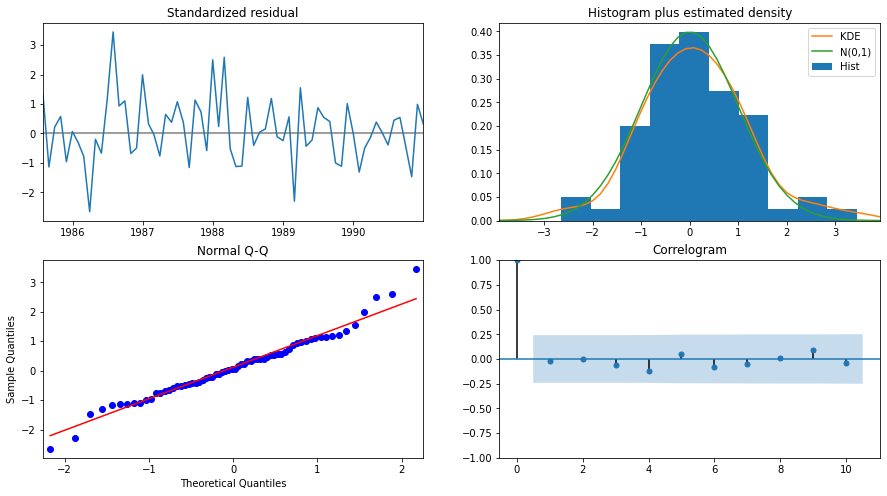

In [169]:
results_SARIMA_31.plot_diagnostics();

In [170]:
predicted_autoSARIMA_31 = results_SARIMA_31.forecast(steps=len(Test))
predicted_autoSARIMA_31

1991-01-31     48.348694
1991-02-28     62.374970
1991-03-31     72.254902
1991-04-30     71.468511
1991-05-31     62.537028
1991-06-30     74.830200
1991-07-31     66.275974
1991-08-31     52.413047
1991-09-30     75.660987
1991-10-31     62.881999
1991-11-30     99.087572
1991-12-31    118.065993
1992-01-31     35.185640
1992-02-29     54.634918
1992-03-31     61.987190
1992-04-30     64.763677
1992-05-31     52.091113
1992-06-30     63.886153
1992-07-31     52.091270
1992-08-31     36.173149
1992-09-30     63.346300
1992-10-31     45.135189
1992-11-30     88.829724
1992-12-31    102.682393
1993-01-31     22.343854
1993-02-28     40.879222
1993-03-31     49.228055
1993-04-30     52.785755
1993-05-31     37.088050
1993-06-30     50.048132
1993-07-31     32.807986
1993-08-31     13.502181
1993-09-30     46.033803
1993-10-31     25.213628
1993-11-30     72.123987
1993-12-31     81.304107
1994-01-31      2.353468
1994-02-28     22.242085
1994-03-31     30.125893
1994-04-30     35.414505


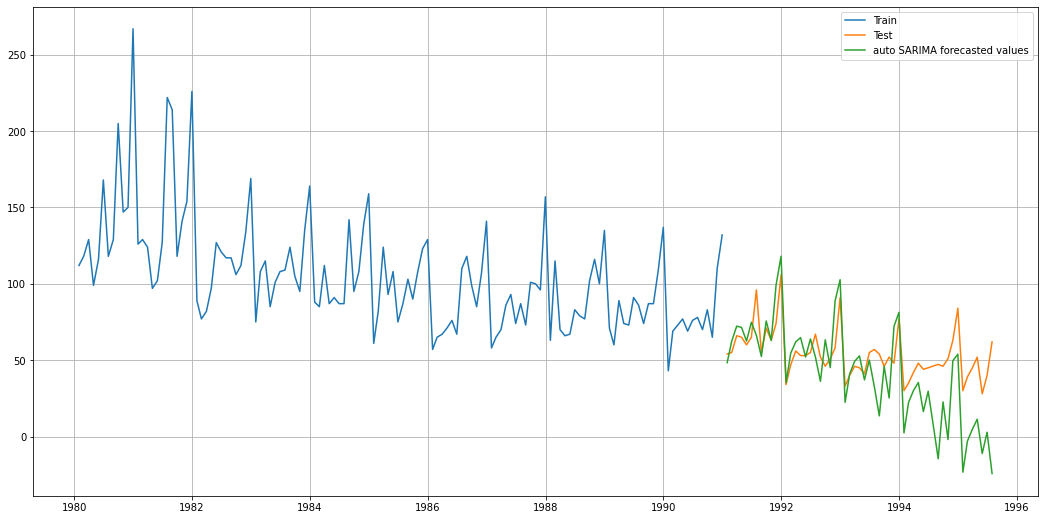

In [171]:
plt.figure(figsize=(18,9))
plt.plot(Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')

plt.plot(predicted_autoSARIMA_31, label='auto SARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [172]:
RMSE_autoSARIMA_31 = mean_squared_error(Test['Rose'],predicted_autoSARIMA_31,squared=False)
MAPE_autoSARIMA_31 = MAPE(Test['Rose'],predicted_autoSARIMA_31)

print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA_31,'\nMAPE for the autofit SARIMA model:',MAPE_autoSARIMA_31)

RMSE for the autofit SARIMA model: 26.33315942548629 
MAPE for the autofit SARIMA model: 35.87


In [173]:
resultsDf_31 = pd.DataFrame({'Test RMSE': [RMSE_autoSARIMA_31],'Test MAPE':[MAPE_autoSARIMA_31]}
                           ,index=['automated SARIMA(0,2,3)*(1,2,3,12)'])

ResultsDf = pd.concat([ResultsDf, resultsDf_31])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     51.391890      91.49
NaiveModel                                           79.672238     144.91
SimpleAverageModel                                   53.413057      94.77
2pointTrailingMovingAverage                          11.529994      13.57
4pointTrailingMovingAverage                          14.444342      19.46
6pointTrailingMovingAverage                          14.554944      20.82
9pointTrailingMovingAverage                          14.721499      20.99
Alpha=0.09,SimpleExponentialSmoothing                36.748161      63.75
Alpha=0.10,SimpleExponentialSmoothing                36.779971      63.81
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...   70.517103     120.07
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912     442.06
Alpha=0.07, Beta=3.22 ,Gamma=0.0,TripleExponent...   12.765786      20.37
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   10.354713      13.99
automated ARIMA(2,1,3)                               36.765536      63.76
automated SARIMA(0,2,3)*(1,2,3,12)                   26.333159      35.87

# 32.Manual ARIMA with cut-off values from ACF and PACF graphs

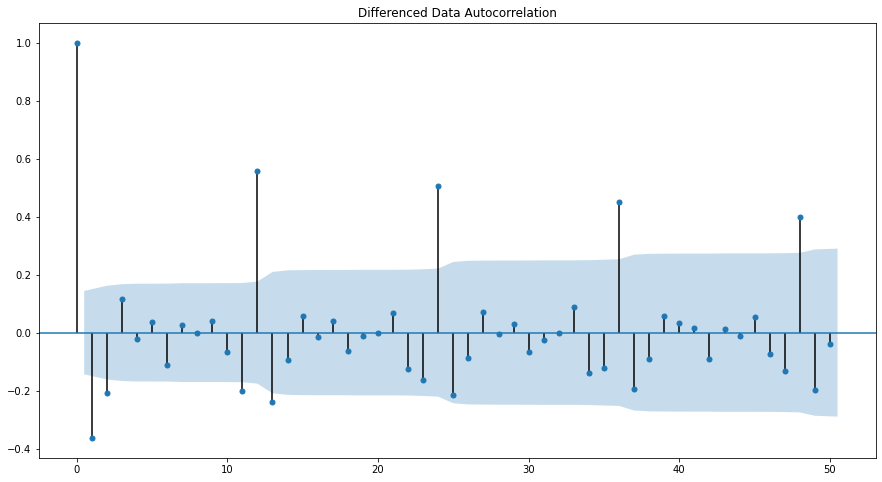

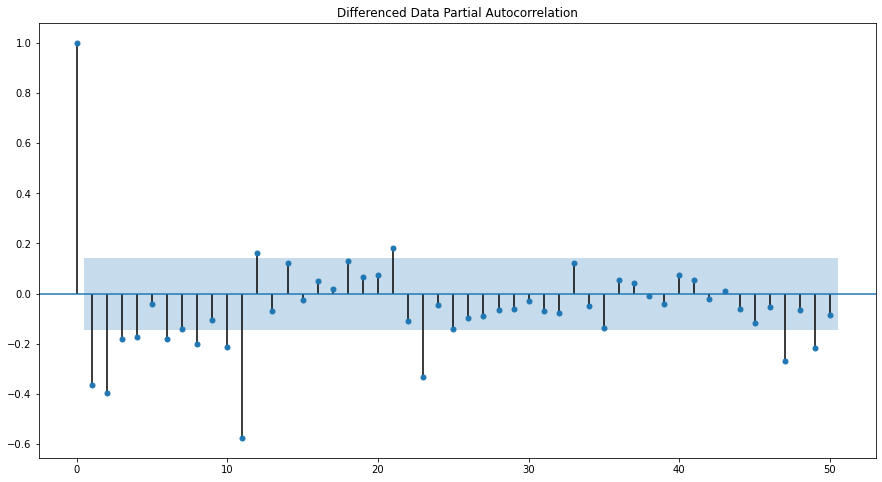

In [174]:
plot_acf(DF['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(DF['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [175]:
# the p value from PACF is 4 as there are 4 significant values above the cut-off 
# the q value from ACF is 2 as there are 2 significant values above the cut-off 
# the d values is 1 as we need single order differencing to make the series stationary

In [176]:
manual_ARIMA_32 = ARIMA(Train['Rose'], order=(4,1,2),freq='M')

results_manual_ARIMA_32 = manual_ARIMA_32.fit()

print(results_manual_ARIMA_32.summary())

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -635.859
Date:                Wed, 09 Sep 2020   AIC                           1285.718
Time:                        23:55:54   BIC                           1305.845
Sample:                    01-31-1980   HQIC                          1293.896
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3838      0.923     -0.416      0.677      -2.192       1.425
ar.L2          0.0046      0.258      0.018      0.986      -0.502       0.511
ar.L3          0.0414      0.113      0.366      0.7

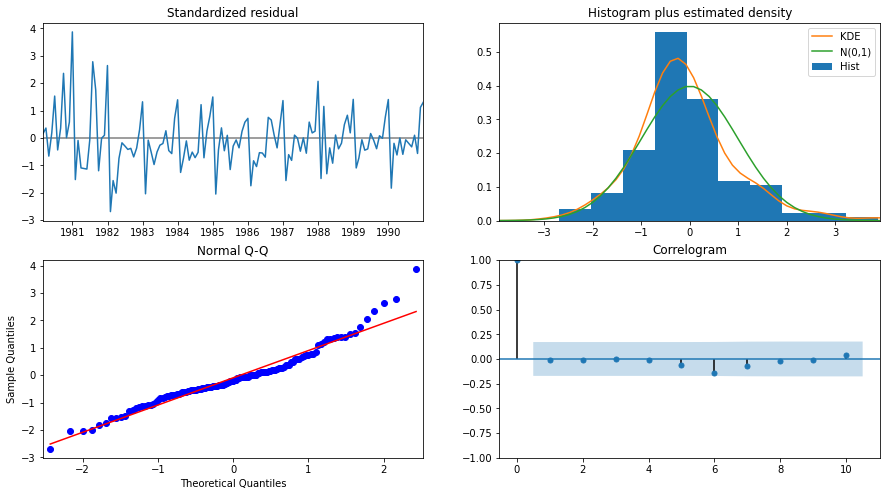

In [177]:
results_manual_ARIMA_32.plot_diagnostics();

In [178]:
predicted_manual_ARIMA_32 = results_manual_ARIMA_32.forecast(steps=len(Test))
predicted_manual_ARIMA_32

1991-01-31    91.224716
1991-02-28    87.036911
1991-03-31    89.124060
1991-04-30    86.496644
1991-05-31    87.562516
1991-06-30    87.250525
1991-07-31    87.255063
1991-08-31    87.310271
1991-09-30    87.270405
1991-10-31    87.287839
1991-11-30    87.283226
1991-12-31    87.283126
1992-01-31    87.284081
1992-02-29    87.283429
1992-03-31    87.283705
1992-04-30    87.283636
1992-05-31    87.283631
1992-06-30    87.283648
1992-07-31    87.283637
1992-08-31    87.283641
1992-09-30    87.283640
1992-10-31    87.283640
1992-11-30    87.283640
1992-12-31    87.283640
1993-01-31    87.283640
1993-02-28    87.283640
1993-03-31    87.283640
1993-04-30    87.283640
1993-05-31    87.283640
1993-06-30    87.283640
1993-07-31    87.283640
1993-08-31    87.283640
1993-09-30    87.283640
1993-10-31    87.283640
1993-11-30    87.283640
1993-12-31    87.283640
1994-01-31    87.283640
1994-02-28    87.283640
1994-03-31    87.283640
1994-04-30    87.283640
1994-05-31    87.283640
1994-06-30    87

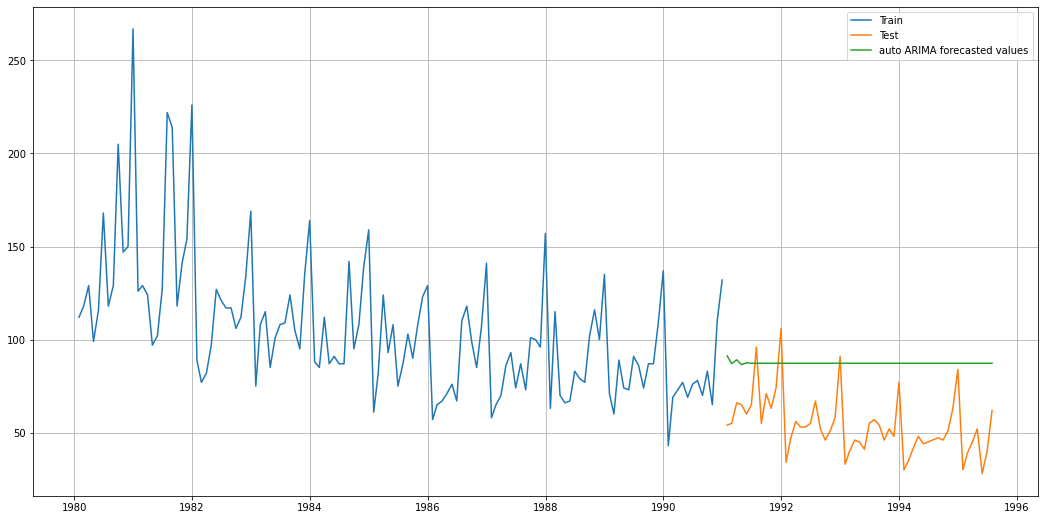

In [179]:
plt.figure(figsize=(18,9))
plt.plot(Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')

plt.plot(predicted_manual_ARIMA_32, label='auto ARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [180]:
RMSE_manual_ARIMA_32 = mean_squared_error(Test['Rose'],predicted_manual_ARIMA_32,squared=False)
MAPE_manual_ARIMA_32 = MAPE(Test['Rose'],predicted_manual_ARIMA_32)

print('RMSE for the manual ARIMA model:',RMSE_manual_ARIMA_32,'\nMAPE for the manual ARIMA model:',MAPE_manual_ARIMA_32)

RMSE for the manual ARIMA model: 36.9896635684374 
MAPE for the manual ARIMA model: 64.21


In [181]:
resultsDf_32 = pd.DataFrame({'Test RMSE': [RMSE_manual_ARIMA_32],'Test MAPE':[MAPE_manual_ARIMA_32]}
                           ,index=['manual ARIMA(4,1,2)'])

ResultsDf = pd.concat([ResultsDf, resultsDf_32])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     51.391890      91.49
NaiveModel                                           79.672238     144.91
SimpleAverageModel                                   53.413057      94.77
2pointTrailingMovingAverage                          11.529994      13.57
4pointTrailingMovingAverage                          14.444342      19.46
6pointTrailingMovingAverage                          14.554944      20.82
9pointTrailingMovingAverage                          14.721499      20.99
Alpha=0.09,SimpleExponentialSmoothing                36.748161      63.75
Alpha=0.10,SimpleExponentialSmoothing                36.779971      63.81
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...   70.517103     120.07
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912     442.06
Alpha=0.07, Beta=3.22 ,Gamma=0.0,TripleExponent...   12.765786      20.37
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   10.354713      13.99
automated ARIMA(2,1,3)                               36.765536      63.76
automated SARIMA(0,2,3)*(1,2,3,12)                   26.333159      35.87
manual ARIMA(4,1,2)                                  36.989664      64.21

# 33.manual SARIMA

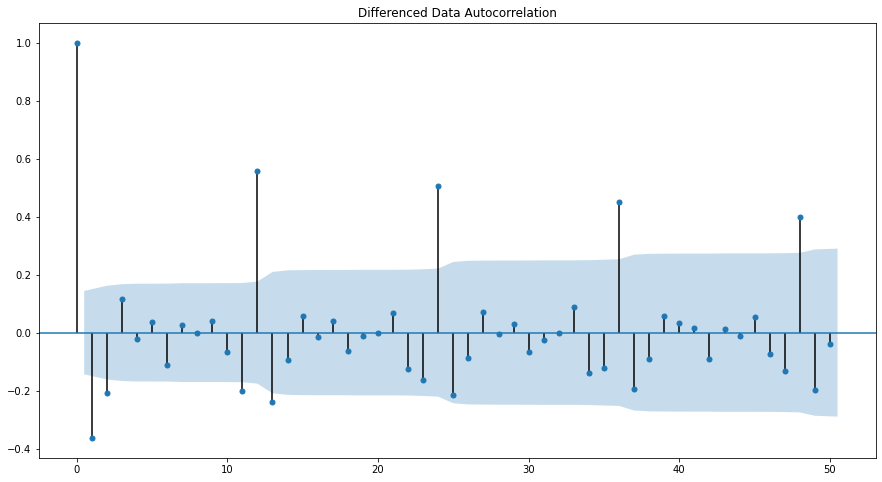

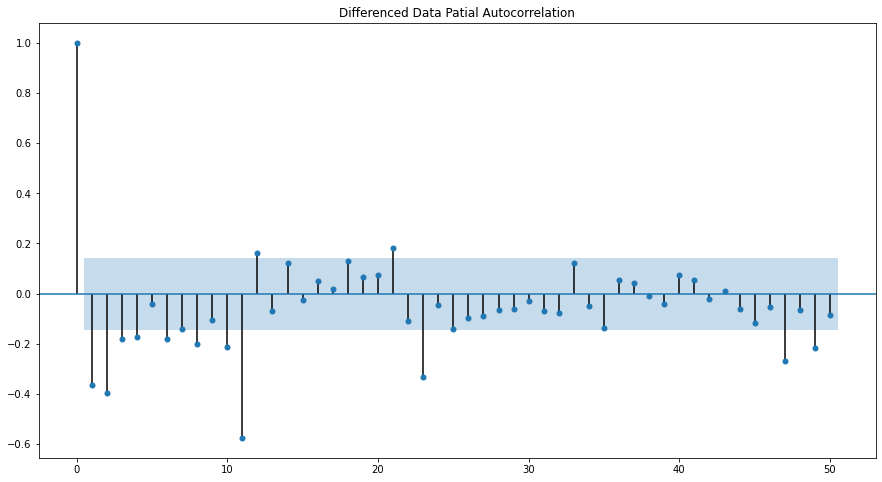

In [182]:
plot_acf(DF['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(DF['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [45]:
import statsmodels.api as sm

manual_SARIMA_32 = sm.tsa.statespace.SARIMAX(Train['Rose'].values,
                                order=(4,1,2),
                                seasonal_order=(4,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_32 = manual_SARIMA_32.fit(maxiter=1000)
print(results_manual_SARIMA_32.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -277.661
Date:                            Fri, 11 Sep 2020   AIC                            581.322
Time:                                    20:02:13   BIC                            609.983
Sample:                                         0   HQIC                           592.663
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9744      0.199     -4.900      0.000      -1.364      -0.585
ar.L2         -0.1123      0.285   

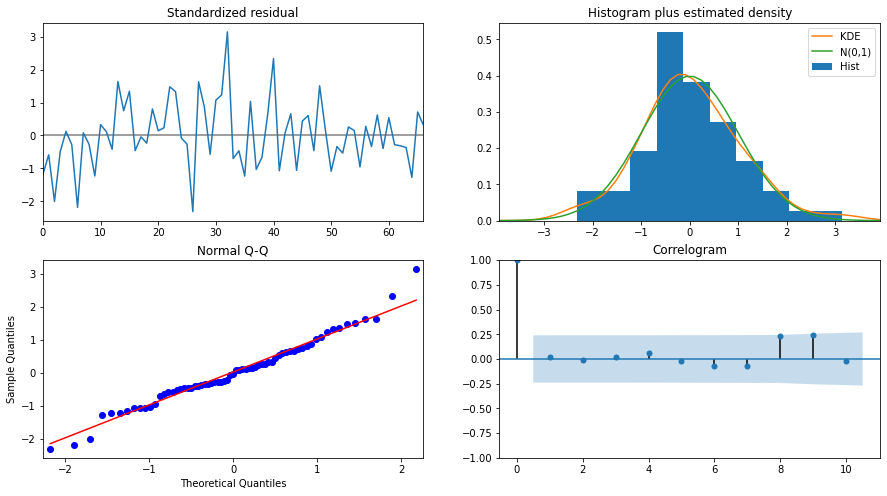

In [26]:
results_manual_SARIMA_32.plot_diagnostics();

In [46]:
predicted_manual_SARIMA_32 = results_manual_SARIMA_32.forecast(steps=len(Test))
predicted_manual_SARIMA_32

array([ 46.38470635,  62.9331967 ,  63.52730012,  66.47139231,
        63.54021499,  67.82200262,  74.20463044,  70.55438002,
        80.75263282,  76.51430666,  95.08918811, 127.14001673,
        43.20552219,  60.39412832,  59.56102068,  61.81576494,
        60.53006911,  65.10181108,  70.56974969,  63.01784898,
        78.60426989,  75.01801276,  89.90460175, 125.17011991,
        40.65212996,  60.20793158,  57.11157273,  57.64370745,
        55.58840989,  63.6926448 ,  65.89440789,  58.0209266 ,
        74.99296944,  72.12879168,  87.39792934, 120.82929589,
        37.48899478,  54.14134991,  55.56941821,  54.57835487,
        51.77389324,  61.17093545,  62.38992129,  54.55261033,
        69.99020233,  65.97474607,  85.4563996 , 116.5486398 ,
        31.88526752,  49.09663222,  51.4000299 ,  51.52251175,
        48.14353234,  56.34542363,  58.55443807])

In [47]:
predicted_manual_SARIMA_date = pd.DataFrame(predicted_manual_SARIMA_32, index=test.index, columns=test.columns)
predicted_manual_SARIMA_date

Sparkling
Time_Stamp            
1991-01-31   46.384706
1991-02-28   62.933197
1991-03-31   63.527300
1991-04-30   66.471392
1991-05-31   63.540215
1991-06-30   67.822003
1991-07-31   74.204630
1991-08-31   70.554380
1991-09-30   80.752633
1991-10-31   76.514307
1991-11-30   95.089188
1991-12-31  127.140017
1992-01-31   43.205522
1992-02-29   60.394128
1992-03-31   59.561021
1992-04-30   61.815765
1992-05-31   60.530069
1992-06-30   65.101811
1992-07-31   70.569750
1992-08-31   63.017849
1992-09-30   78.604270
1992-10-31   75.018013
1992-11-30   89.904602
1992-12-31  125.170120
1993-01-31   40.652130
1993-02-28   60.207932
1993-03-31   57.111573
1993-04-30   57.643707
1993-05-31   55.588410
1993-06-30   63.692645
1993-07-31   65.894408
1993-08-31   58.020927
1993-09-30   74.992969
1993-10-31   72.128792
1993-11-30   87.397929
1993-12-31  120.829296
1994-01-31   37.488995
1994-02-28   54.141350
1994-03-31   55.569418
1994-04-30   54.578355
1994-05-31   51.773893
1994-06-30   61.170935
1994-07-31   62.389921
1994-08-31   54.552610
1994-09-30   69.990202
1994-10-31   65.974746
1994-11-30   85.456400
1994-12-31  116.548640
1995-01-31   31.885268
1995-02-28   49.096632
1995-03-31   51.400030
1995-04-30   51.522512
1995-05-31   48.143532
1995-06-30   56.345424
1995-07-31   58.554438

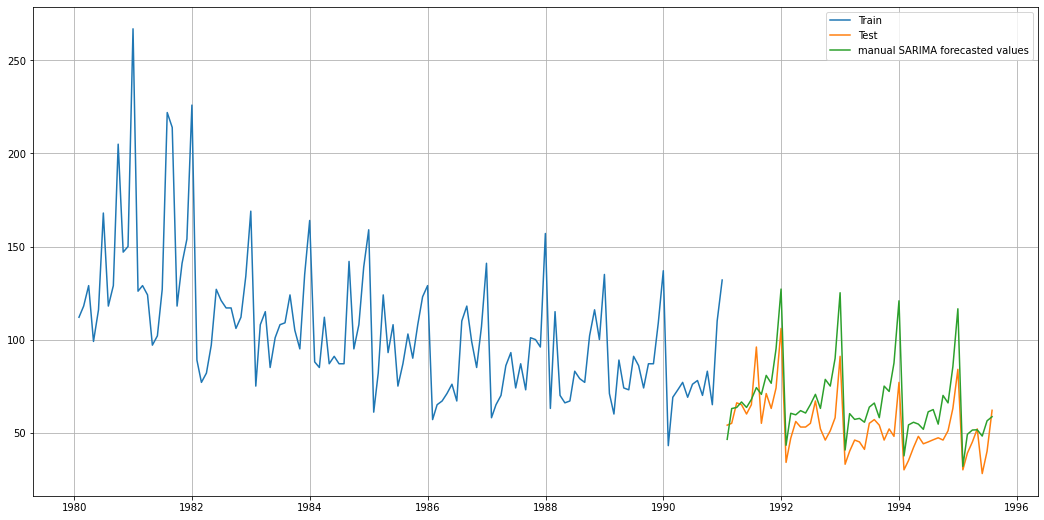

In [48]:
plt.figure(figsize=(18,9))
plt.plot(Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')

plt.plot(predicted_manual_SARIMA_date, label='manual SARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [186]:
RMSE_manual_SARIMA_32 = mean_squared_error(Test['Rose'],predicted_manual_SARIMA_32,squared=False)
MAPE_manual_SARIMA_32 = MAPE(Test['Rose'],predicted_manual_SARIMA_32)

print('RMSE for the manual SARIMA model:',RMSE_manual_SARIMA_32,'\nMAPE for the autofit SARIMA model:',MAPE_manual_SARIMA_32)

RMSE for the manual SARIMA model: 17.501099458403957 
MAPE for the autofit SARIMA model: 26.51


In [187]:
resultsDf_32 = pd.DataFrame({'Test RMSE': [RMSE_manual_SARIMA_32],'Test MAPE':[MAPE_manual_SARIMA_32]}
                           ,index=['manual SARIMA(4,1,2)(4,1,2,12)'])

ResultsDf = pd.concat([ResultsDf, resultsDf_32])
ResultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     51.391890      91.49
NaiveModel                                           79.672238     144.91
SimpleAverageModel                                   53.413057      94.77
2pointTrailingMovingAverage                          11.529994      13.57
4pointTrailingMovingAverage                          14.444342      19.46
6pointTrailingMovingAverage                          14.554944      20.82
9pointTrailingMovingAverage                          14.721499      20.99
Alpha=0.09,SimpleExponentialSmoothing                36.748161      63.75
Alpha=0.10,SimpleExponentialSmoothing                36.779971      63.81
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...   70.517103     120.07
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912     442.06
Alpha=0.07, Beta=3.22 ,Gamma=0.0,TripleExponent...   12.765786      20.37
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   10.354713      13.99
automated ARIMA(2,1,3)                               36.765536      63.76
automated SARIMA(0,2,3)*(1,2,3,12)                   26.333159      35.87
manual ARIMA(4,1,2)                                  36.989664      64.21
manual SARIMA(4,1,2)(4,1,2,12)                       17.501099      26.51

# 33.Results

In [188]:
ResultsDf.sort_values(by=['Test RMSE'], ascending=True)

Test RMSE  Test MAPE
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   10.354713      13.99
2pointTrailingMovingAverage                          11.529994      13.57
Alpha=0.07, Beta=3.22 ,Gamma=0.0,TripleExponent...   12.765786      20.37
4pointTrailingMovingAverage                          14.444342      19.46
6pointTrailingMovingAverage                          14.554944      20.82
9pointTrailingMovingAverage                          14.721499      20.99
manual SARIMA(4,1,2)(4,1,2,12)                       17.501099      26.51
automated SARIMA(0,2,3)*(1,2,3,12)                   26.333159      35.87
Alpha=0.09,SimpleExponentialSmoothing                36.748161      63.75
automated ARIMA(2,1,3)                               36.765536      63.76
Alpha=0.10,SimpleExponentialSmoothing                36.779971      63.81
manual ARIMA(4,1,2)                                  36.989664      64.21
RegressionOnTime                                     51.391890      91.49
SimpleAverageModel                                   53.413057      94.77
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...   70.517103     120.07
NaiveModel                                           79.672238     144.91
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912     442.06

In [189]:
AIC =['NAN', 'NAN', 'NAN', 'NAN', 'NAN', 'NAN', 'NAN',  914.804,  914.805,  931.674, 953.520,  798.398,  928.694, 1274.695, 
               609.566, 1285.718, 581.322]

In [190]:
ResultsDf['AIC on Train Data']=AIC 
ResultsDf

Test RMSE  Test MAPE  \
RegressionOnTime                                     51.391890      91.49   
NaiveModel                                           79.672238     144.91   
SimpleAverageModel                                   53.413057      94.77   
2pointTrailingMovingAverage                          11.529994      13.57   
4pointTrailingMovingAverage                          14.444342      19.46   
6pointTrailingMovingAverage                          14.554944      20.82   
9pointTrailingMovingAverage                          14.721499      20.99   
Alpha=0.09,SimpleExponentialSmoothing                36.748161      63.75   
Alpha=0.10,SimpleExponentialSmoothing                36.779971      63.81   
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...   70.517103     120.07   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912     442.06   
Alpha=0.07, Beta=3.22 ,Gamma=0.0,TripleExponent...   12.765786      20.37   
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   10.354713      13.99   
automated ARIMA(2,1,3)                               36.765536      63.76   
automated SARIMA(0,2,3)*(1,2,3,12)                   26.333159      35.87   
manual ARIMA(4,1,2)                                  36.989664      64.21   
manual SARIMA(4,1,2)(4,1,2,12)                       17.501099      26.51   

                                                   AIC on Train Data  
RegressionOnTime                                                 NAN  
NaiveModel                                                       NAN  
SimpleAverageModel                                               NAN  
2pointTrailingMovingAverage                                      NAN  
4pointTrailingMovingAverage                                      NAN  
6pointTrailingMovingAverage                                      NAN  
9pointTrailingMovingAverage                                      NAN  
Alpha=0.09,SimpleExponentialSmoothing                        914.804  
Alpha=0.10,SimpleExponentialSmoothing                        914.805  
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...           931.674  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing                 953.52  
Alpha=0.07, Beta=3.22 ,Gamma=0.0,TripleExponent...           798.398  
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...           928.694  
automated ARIMA(2,1,3)                                       1274.69  
automated SARIMA(0,2,3)*(1,2,3,12)                           609.566  
manual ARIMA(4,1,2)                                          1285.72  
manual SARIMA(4,1,2)(4,1,2,12)                               581.322

In [195]:
ResultsDf.sort_values(by='Test RMSE', ascending=True)

Test RMSE  Test MAPE  \
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   10.354713      13.99   
2pointTrailingMovingAverage                          11.529994      13.57   
Alpha=0.07, Beta=3.22 ,Gamma=0.0,TripleExponent...   12.765786      20.37   
4pointTrailingMovingAverage                          14.444342      19.46   
6pointTrailingMovingAverage                          14.554944      20.82   
9pointTrailingMovingAverage                          14.721499      20.99   
manual SARIMA(4,1,2)(4,1,2,12)                       17.501099      26.51   
automated SARIMA(0,2,3)*(1,2,3,12)                   26.333159      35.87   
Alpha=0.09,SimpleExponentialSmoothing                36.748161      63.75   
automated ARIMA(2,1,3)                               36.765536      63.76   
Alpha=0.10,SimpleExponentialSmoothing                36.779971      63.81   
manual ARIMA(4,1,2)                                  36.989664      64.21   
RegressionOnTime                                     51.391890      91.49   
SimpleAverageModel                                   53.413057      94.77   
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...   70.517103     120.07   
NaiveModel                                           79.672238     144.91   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912     442.06   

                                                   AIC on Train Data  
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...           928.694  
2pointTrailingMovingAverage                                      NAN  
Alpha=0.07, Beta=3.22 ,Gamma=0.0,TripleExponent...           798.398  
4pointTrailingMovingAverage                                      NAN  
6pointTrailingMovingAverage                                      NAN  
9pointTrailingMovingAverage                                      NAN  
manual SARIMA(4,1,2)(4,1,2,12)                               581.322  
automated SARIMA(0,2,3)*(1,2,3,12)                           609.566  
Alpha=0.09,SimpleExponentialSmoothing                        914.804  
automated ARIMA(2,1,3)                                       1274.69  
Alpha=0.10,SimpleExponentialSmoothing                        914.805  
manual ARIMA(4,1,2)                                          1285.72  
RegressionOnTime                                                 NAN  
SimpleAverageModel                                               NAN  
Alpha=0.157 and Beta=0.157,DoubleExponentialSmo...           931.674  
NaiveModel                                                       NAN  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing                 953.52

# 34. Final Model on the Complete Dataset

In [196]:
full_data_model_34 = sm.tsa.statespace.SARIMAX(DF['Rose'],
                                order=(4,1,2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_34 = full_data_model_34.fit(maxiter=1000)
print(results_full_data_model_34.summary())

C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Anmol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -484.421
Date:                            Wed, 09 Sep 2020   AIC                            994.841
Time:                                    22:46:08   BIC                           1031.294
Sample:                                01-31-1980   HQIC                          1009.647
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9686      0.129     -7.515      0.000      -1.221      -0.716
ar.L2         -0.0291      0.185   

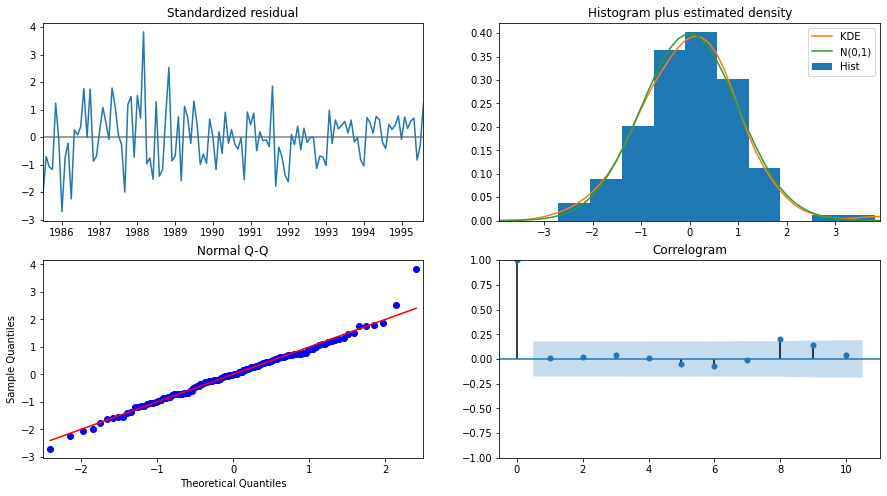

In [197]:
results_full_data_model_34.plot_diagnostics();

# 35. Forecasting Using the complete model

In [198]:
predicted_manual_SARIMA_full_data_2 = results_full_data_model_34.get_forecast(steps=12)

In [199]:
predicted_manual_SARIMA_full_data_2.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  44.873098  12.574245      20.228031      69.518165
1995-09-30  46.009082  12.736198      21.046593      70.971571
1995-10-31  47.545021  12.786925      22.483109      72.606934
1995-11-30  59.673375  13.038852      34.117696      85.229054
1995-12-31  86.373059  13.060815      60.774331     111.971786

In [200]:
predicted_manual_SARIMA_full_data_2.summary_frame(alpha=0.05).tail()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1996-03-31  39.944731  13.583209      13.322129      66.567332
1996-04-30  44.159588  13.626598      17.451946      70.867229
1996-05-31  30.343017  13.821389       3.253591      57.432442
1996-06-30  39.424149  13.875977      12.227734      66.620565
1996-07-31  55.408423  14.047042      27.876727      82.940118

In [201]:
rmse_full_model = mean_squared_error(DF['Rose'],results_full_data_model_34.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_full_model)

RMSE of the Full Model 34.86615560223201


In [202]:
pred_full_manual_SARIMA_date_2 = predicted_manual_SARIMA_full_data_2.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

In [203]:
pred_full_manual_SARIMA_date_2

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  44.873098  12.574245      20.228031      69.518165
1995-09-30  46.009082  12.736198      21.046593      70.971571
1995-10-31  47.545021  12.786925      22.483109      72.606934
1995-11-30  59.673375  13.038852      34.117696      85.229054
1995-12-31  86.373059  13.060815      60.774331     111.971786
1996-01-31  25.135719  13.325170      -0.981133      51.252572
1996-02-29  32.049775  13.356546       5.871426      58.228124
1996-03-31  39.944731  13.583209      13.322129      66.567332
1996-04-30  44.159588  13.626598      17.451946      70.867229
1996-05-31  30.343017  13.821389       3.253591      57.432442
1996-06-30  39.424149  13.875977      12.227734      66.620565
1996-07-31  55.408423  14.047042      27.876727      82.940118

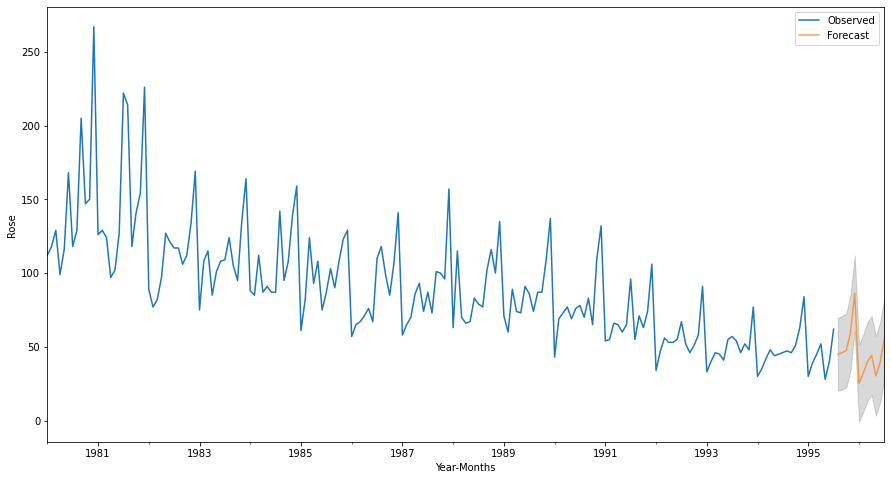

In [204]:
# plot the forecast along with the confidence band

axis = DF['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date_2['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date_2.index, pred_full_manual_SARIMA_date_2['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date_2['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()